In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_row', 40)
pd.set_option('display.max_column', 40)

In [4]:
data=pd.read_csv('dataset/insurance_claims.csv')

In [5]:
data.head()

months_as_customer   age  policy_number policy_bind_date policy_state  \
0               328.0  48.0       521585.0       10/17/2014           OH   
1               228.0  42.0       342868.0        6/27/2006           IN   
2               134.0  29.0       687698.0         9/6/2000           OH   
3               256.0  41.0       227811.0        5/25/1990           IL   
4               228.0  44.0       367455.0         6/6/2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500             1000.0                1406.91             0.0   
1    250/500             2000.0                1197.22       5000000.0   
2    100/300             2000.0                1413.14       5000000.0   
3    250/500             2000.0                1415.74       6000000.0   
4   500/1000             1000.0                1583.91       6000000.0   

   insured_zip insured_sex insured_education_level insured_occupation  \
0     466132.0        MALE                      MD       craft-repair   
1     468176.0        MALE                      MD  machine-op-inspct   
2     430632.0      FEMALE                     PhD              sales   
3     608117.0      FEMALE                     PhD       armed-forces   
4     610706.0        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband        53300.0           0.0   
1         reading       other-relative            0.0           0.0   
2     board-games            own-child        35100.0           0.0   
3     board-games            unmarried        48900.0      -62400.0   
4     board-games            unmarried        66000.0      -46000.0   

  incident_date             incident_type   collision_type incident_severity  \
0     1/25/2015  Single Vehicle Collision   Side Collision      Major Damage   
1     1/21/2015             Vehicle Theft                ?      Minor Damage   
2     2/22/2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3     1/10/2015  Single Vehicle Collision  Front Collision      Major Damage   
4     2/17/2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                   NaN             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                       5.0                          1.0             YES   
1                       8.0                          1.0               ?   
2                       7.0                          3.0              NO   
3                       5.0                          1.0               ?   
4                      20.0                          1.0              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0              1.0        2.0                     YES             71610.0   
1              0.0        0.0                       ?              5070.0   
2              2.0        3.0                      NO             34650.0   
3              1.0        2.0                      NO             63400.0   
4              0.0        1.0                      NO              6500.0   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0        6510.0         13020.0        52080.0       Saab        92x   
1         780.0           780.0         3510.0   Mercedes       E400   
2        7700.0          3850.0        23100.0      Dodge        RAM   
3        6340.0          6340.0        50720.0  Chevrolet      Tahoe   
4        1300.0        

### Analyse de la forme des données

- months_as_customer : Nombre de mois en tant que client.
- age : Âge de la personne assurée.
- policy_number : Numéro unique attribué à chaque police d’assurance.
- policy_bind_date : Date de début ou de souscription de la police.
- policy_state : État où la police a été émise.
- policy_csl : Limite unique combinée (CSL) pour la couverture des dommages corporels et matériels.
- policy_deductable : Montant que l'assuré doit payer avant que l’assurance ne couvre les coûts.
- policy_annual_premium : Prime annuelle payée par le client pour la police.
- umbrella_limit : Montant de la couverture de responsabilité supplémentaire.
- insured_zip : Code postal de résidence de l'assuré.
- insured_sex : Genre de l’assuré.
- insured_education_level : Niveau d’éducation de l’assuré.
- insured_occupation : Profession ou type d’emploi de l’assuré.
- insured_hobbies : Loisirs ou intérêts de l’assuré.
- insured_relationship : Statut relationnel de l’assuré (ex : mari, autre parent).
- capital-gains : Gains en capital déclarés par l’assuré.
- capital-loss : Pertes en capital déclarées par l’assuré.
- incident_date : Date de l’incident (accident ou vol, par exemple).
- incident_type : Type d’incident (ex : collision d’un seul véhicule, vol de véhicule).
- collision_type : Type de collision en cas d’accident (ex : collision latérale, collision frontale).
- incident_severity : Gravité de l’incident (ex : dommages mineurs ou majeurs).
- authorities_contacted : Indique si les autorités ont été contactées (ex : Police).
- incident_state : État où l’incident a eu lieu.
- incident_city : Ville où l’incident a eu lieu.
- incident_location : Adresse ou lieu précis de l’incident.
- incident_hour_of_the_day : Heure à laquelle l’incident a eu lieu.
- number_of_vehicles_involved : Nombre de véhicules impliqués dans l’incident.
- property_damage : Indique s’il y a eu des dommages matériels (OUI/NON/?).
- bodily_injuries : Nombre de blessures corporelles signalées.
- witnesses : Nombre de témoins de l’incident.
- police_report_available : Indique si un rapport de police est disponible (OUI/NON/?).
- total_claim_amount : Montant total réclamé pour l’incident.
- injury_claim : Montant réclamé pour les blessures.
- property_claim : Montant réclamé pour les dommages matériels.
- vehicle_claim : Montant réclamé pour les dommages au véhicule.
- auto_make : Marque du véhicule de l’assuré (ex : Dodge, Saab).
- auto_model : Modèle du véhicule de l’assuré (ex : RSX, 92x).
- auto_year : Année de fabrication du véhicule de l’assuré.
- fraud_reported : Indique si l’incident a été signalé comme une fraude (1 pour fraude, 0 pour non-fraude).

Une police d’assurance est un contrat entre un assureur (la compagnie d’assurance) et un assuré (la personne ou l'entreprise assurée) qui définit les termes et les conditions de la couverture

In [6]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

#### Renomer les columns


In [7]:
import janitor
data=data.clean_names()

In [8]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [9]:
df=data.copy()

#### Analyse de dataset

In [10]:
df.shape

(1000, 39)

In [11]:
df.head()

months_as_customer   age  policy_number policy_bind_date policy_state  \
0               328.0  48.0       521585.0       10/17/2014           OH   
1               228.0  42.0       342868.0        6/27/2006           IN   
2               134.0  29.0       687698.0         9/6/2000           OH   
3               256.0  41.0       227811.0        5/25/1990           IL   
4               228.0  44.0       367455.0         6/6/2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500             1000.0                1406.91             0.0   
1    250/500             2000.0                1197.22       5000000.0   
2    100/300             2000.0                1413.14       5000000.0   
3    250/500             2000.0                1415.74       6000000.0   
4   500/1000             1000.0                1583.91       6000000.0   

   insured_zip insured_sex insured_education_level insured_occupation  \
0     466132.0        MALE                      MD       craft-repair   
1     468176.0        MALE                      MD  machine-op-inspct   
2     430632.0      FEMALE                     PhD              sales   
3     608117.0      FEMALE                     PhD       armed-forces   
4     610706.0        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital_gains  capital_loss  \
0        sleeping              husband        53300.0           0.0   
1         reading       other-relative            0.0           0.0   
2     board-games            own-child        35100.0           0.0   
3     board-games            unmarried        48900.0      -62400.0   
4     board-games            unmarried        66000.0      -46000.0   

  incident_date             incident_type   collision_type incident_severity  \
0     1/25/2015  Single Vehicle Collision   Side Collision      Major Damage   
1     1/21/2015             Vehicle Theft                ?      Minor Damage   
2     2/22/2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3     1/10/2015  Single Vehicle Collision  Front Collision      Major Damage   
4     2/17/2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                   NaN             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                       5.0                          1.0             YES   
1                       8.0                          1.0               ?   
2                       7.0                          3.0              NO   
3                       5.0                          1.0               ?   
4                      20.0                          1.0              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0              1.0        2.0                     YES             71610.0   
1              0.0        0.0                       ?              5070.0   
2              2.0        3.0                      NO             34650.0   
3              1.0        2.0                      NO             63400.0   
4              0.0        1.0                      NO              6500.0   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0        6510.0         13020.0        52080.0       Saab        92x   
1         780.0           780.0         3510.0   Mercedes       E400   
2        7700.0          3850.0        23100.0      Dodge        RAM   
3        6340.0          6340.0        50720.0  Chevrolet      Tahoe   
4        1300.0        

In [12]:
df.dtypes

months_as_customer             float64
age                            float64
policy_number                  float64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable              float64
policy_annual_premium          float64
umbrella_limit                 float64
insured_zip                    float64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital_gains                  float64
capital_loss                   float64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [13]:
df.dtypes.value_counts()

object     20
float64    19
Name: count, dtype: int64

In [14]:
df.isna().sum()/df.shape[0]

months_as_customer             0.452
age                            0.452
policy_number                  0.452
policy_bind_date               0.452
policy_state                   0.452
policy_csl                     0.452
policy_deductable              0.452
policy_annual_premium          0.452
umbrella_limit                 0.452
insured_zip                    0.452
insured_sex                    0.452
insured_education_level        0.452
insured_occupation             0.452
insured_hobbies                0.452
insured_relationship           0.452
capital_gains                  0.452
capital_loss                   0.452
incident_date                  0.452
incident_type                  0.452
collision_type                 0.452
incident_severity              0.452
authorities_contacted          0.506
incident_state                 0.452
incident_city                  0.452
incident_location              0.452
incident_hour_of_the_day       0.452
number_of_vehicles_involved    0.452
p

<Axes: >

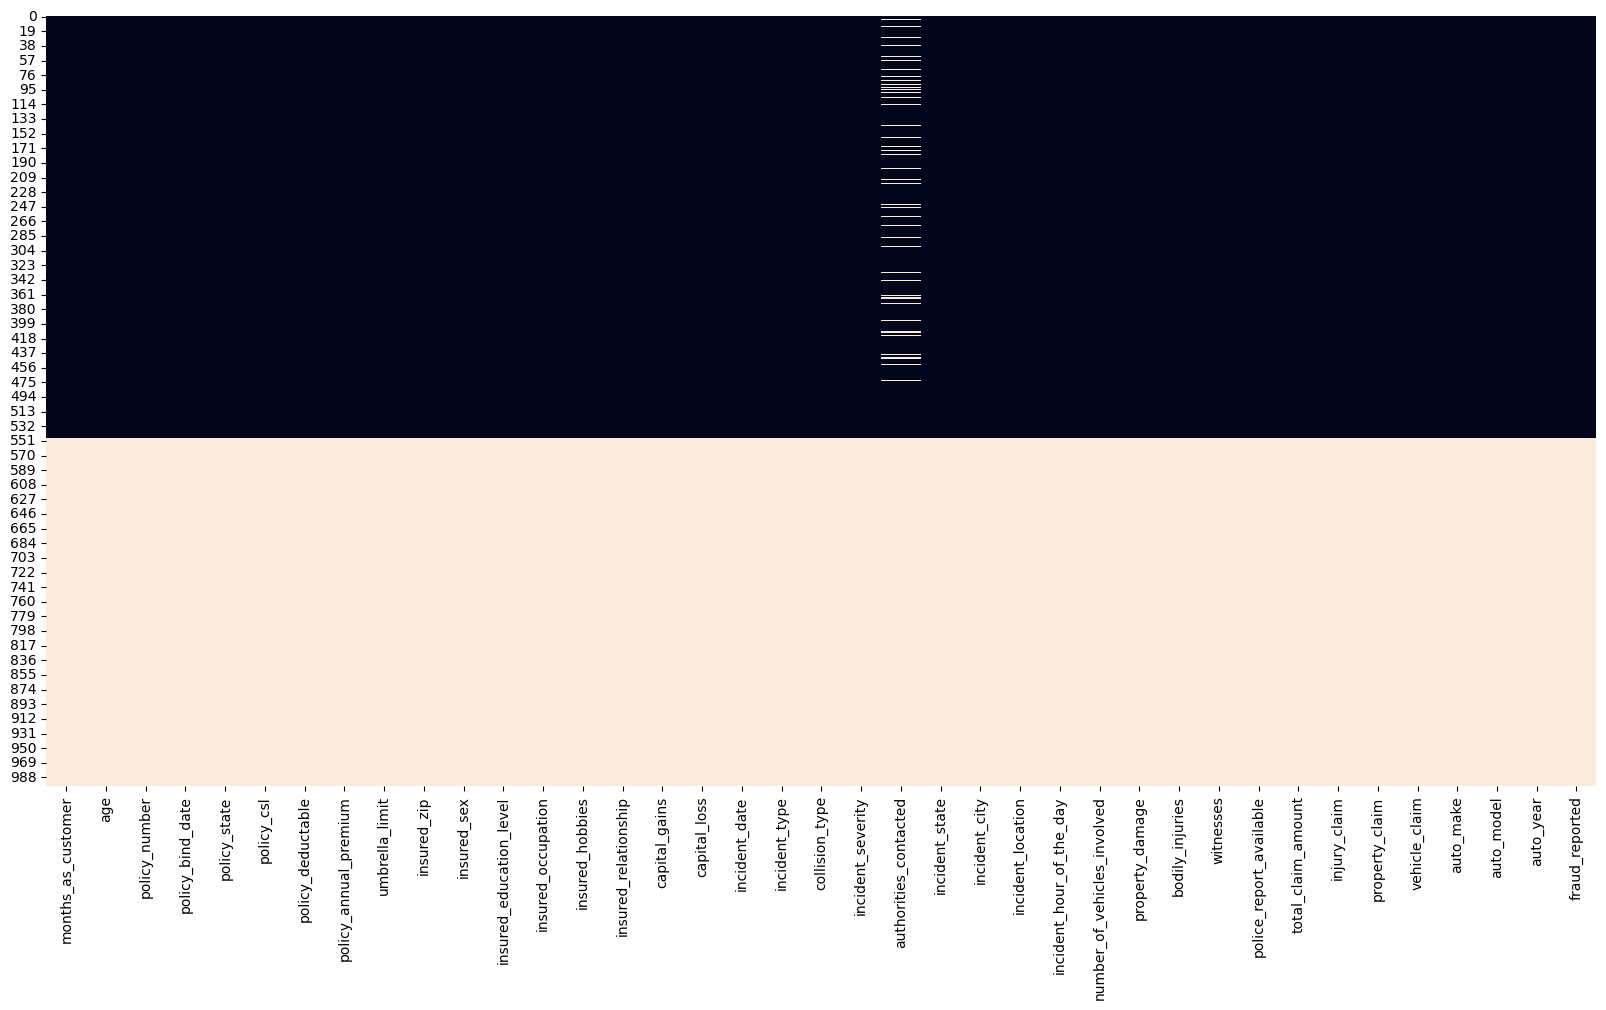

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### Analyse de Fond :

#### Statistical Analysis

In [54]:
df.describe()

months_as_customer         age  policy_number  policy_deductable  \
count          548.000000  548.000000     548.000000         548.000000   
mean           203.883212   38.879562  532436.461679        1197.080292   
std            116.350904    9.188266  257962.500112         621.396858   
min              0.000000   19.000000  104594.000000         500.000000   
25%            112.000000   31.000000  330569.750000         500.000000   
50%            206.500000   39.000000  512956.000000        1000.000000   
75%            279.000000   45.000000  746803.000000        2000.000000   
max            479.000000   64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital_gains  \
count             548.000000    5.480000e+02     548.000000     548.000000   
mean             1251.040055    1.180657e+06  499843.768248   24827.372263   
std               240.778225    2.394049e+06   71048.084681   28016.929767   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1086.412500    0.000000e+00  448757.500000       0.000000   
50%              1255.650000    0.000000e+00  466196.000000       0.000000   
75%              1402.757500    0.000000e+00  602409.750000   51025.000000   
max              2047.590000    1.000000e+07  620869.000000   98800.000000   

       capital_loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    548.000000                548.000000                   548.000000   
mean  -26224.087591                 11.720803                     1.844891   
std    27823.443814                  6.761311                     1.018849   
min   -91400.000000                  0.000000                     1.000000   
25%   -51125.000000                  6.000000                     1.000000   
50%   -21500.000000                 12.000000                     1.000000   
75%        0.000000                 17.000000                     3.000000   
max        0.000000                 23.000000                     4.000000   

       bodily_injuries   witnesses  total_claim_amount  injury_claim  \
count       548.000000  548.000000          548.000000    548.000000   
mean          0.987226    1.434307        53759.872263   7623.083942   
std           0.810027    1.098973        26877.413347   4953.829772   
min           0.000000    0.000000         2160.000000      0.000000   
25%           0.000000    0.000000        42922.500000   4570.000000   
50%           1.000000    1.000000        59685.000000   6935.000000   
75%           2.000000    2.000000        72105.000000  11585.000000   
max           2.000000    3.000000       114920.000000  21450.000000   

       property_claim  vehicle_claim    auto_year  fraud_reported  
count      548.000000     548.000000   548.000000      548.000000  
mean      7570.912409   38565.875912  2005.527372        0.257299  
std       4980.572888   19094.040873     5.994603        0.437545  
min          0.000000    1440.000000  1995.000000        0.000000  
25%       4640.000000   31497.500000  2001.000000        0.000000  
50%       6715.000000   43370.000000  2006.000000        0.000000  
75%      11350.000000   51427.500000  2011.000000        1.000000  
max      23670.000000   79560.000000  2015.000000        1.000000

In [55]:
df.describe(include=['object']).T

count unique                      top freq
policy_bind_date          548    532                 1/1/2006    3
policy_state              548      3                       IL  198
policy_csl                548      3                  100/300  203
insured_sex               548      2                   FEMALE  299
insured_education_level   548      7              High School   85
insured_occupation        548     14        machine-op-inspct   52
insured_hobbies           548     20                  reading   38
insured_relationship      548      6           other-relative  106
incident_date             548     60                 1/7/2015   18
incident_type             548      4  Multi-vehicle Collision  231
collision_type            548      4           Rear Collision  159
incident_severity         548      4             Minor Damage  186
authorities_contacted     494      4                   Police  159
incident_state            548      7                       NY  146
incident_city             548      7              Springfield   88
incident_location         548    548           9935 4th Drive    1
property_damage           548      3                        ?  204
police_report_available   548      3                       NO  196
auto_make                 548     14                   Suburu   48
auto_model                548     39                       A3   22

#### Visualisation de la target

In [56]:
df['fraud_reported'].value_counts(normalize=True)

fraud_reported
0.0    0.742701
1.0    0.257299
Name: proportion, dtype: float64

#### Variables Continues

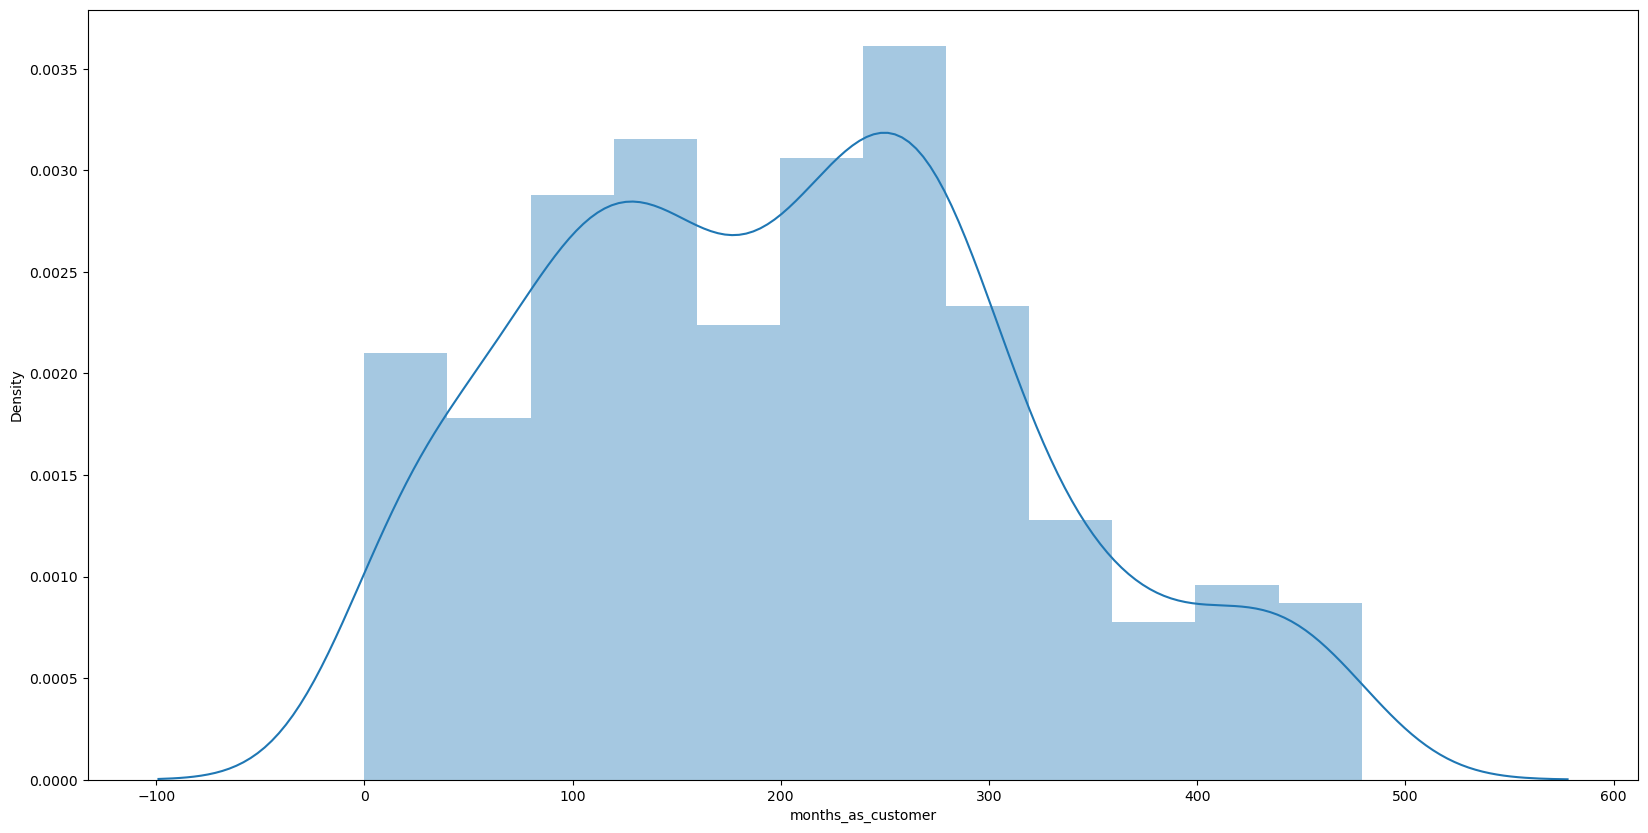

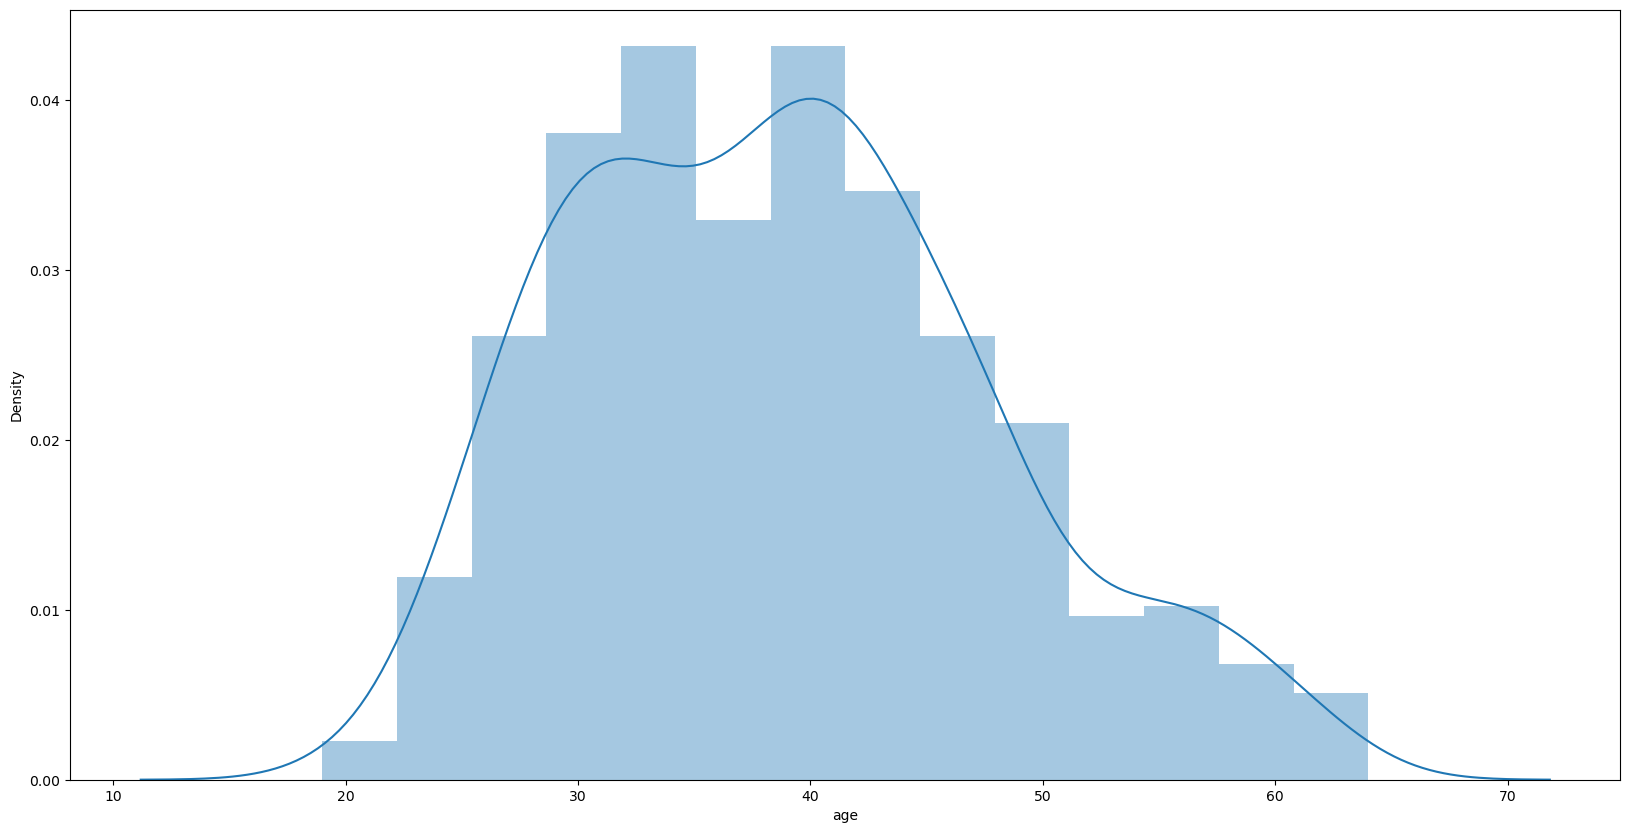

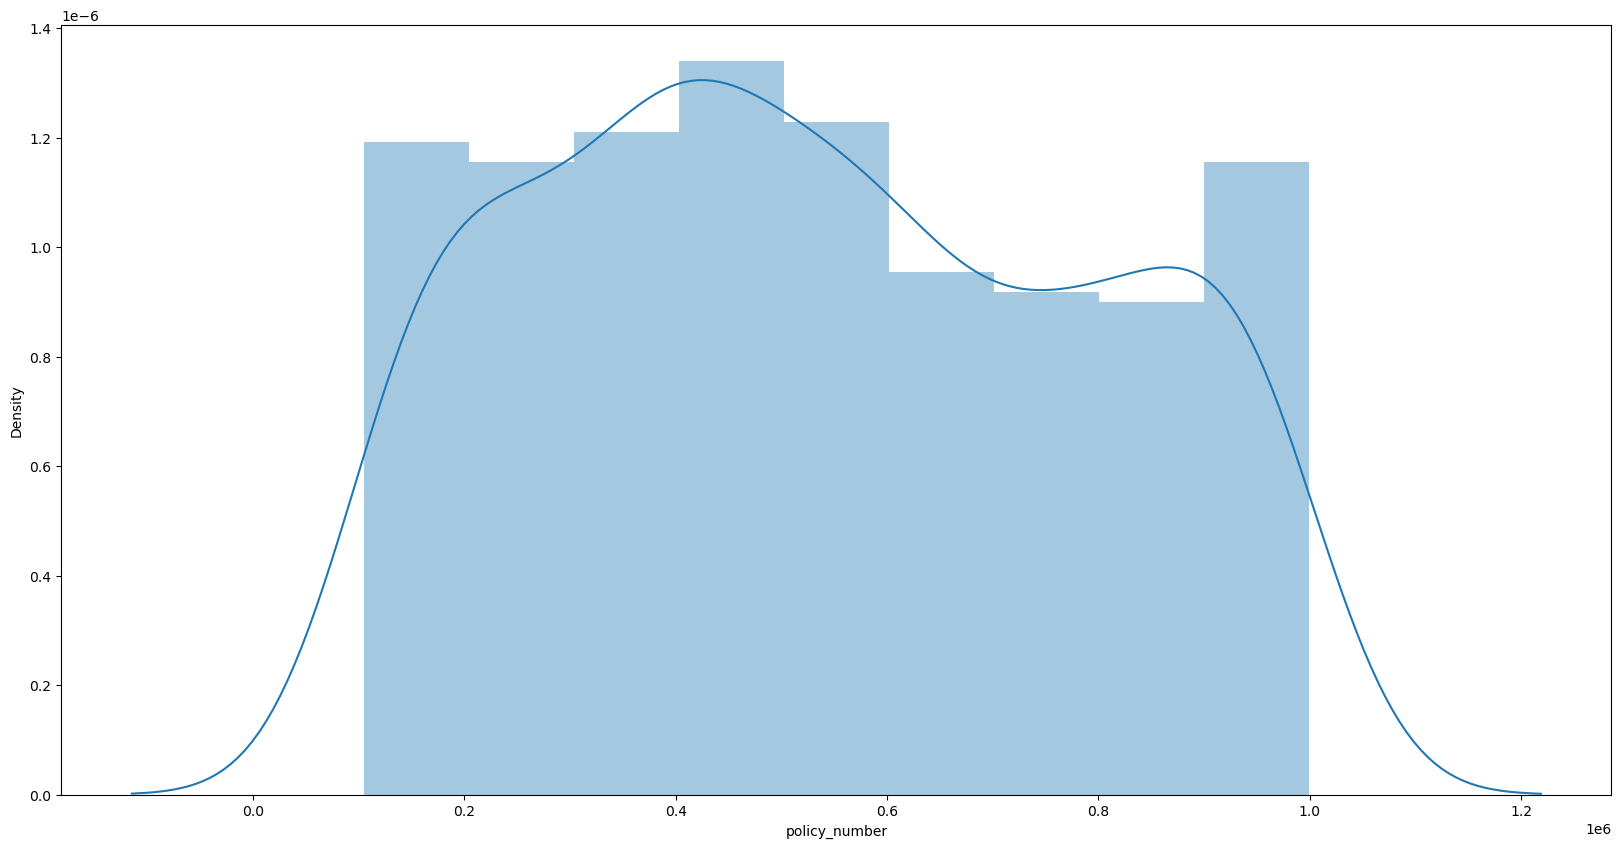

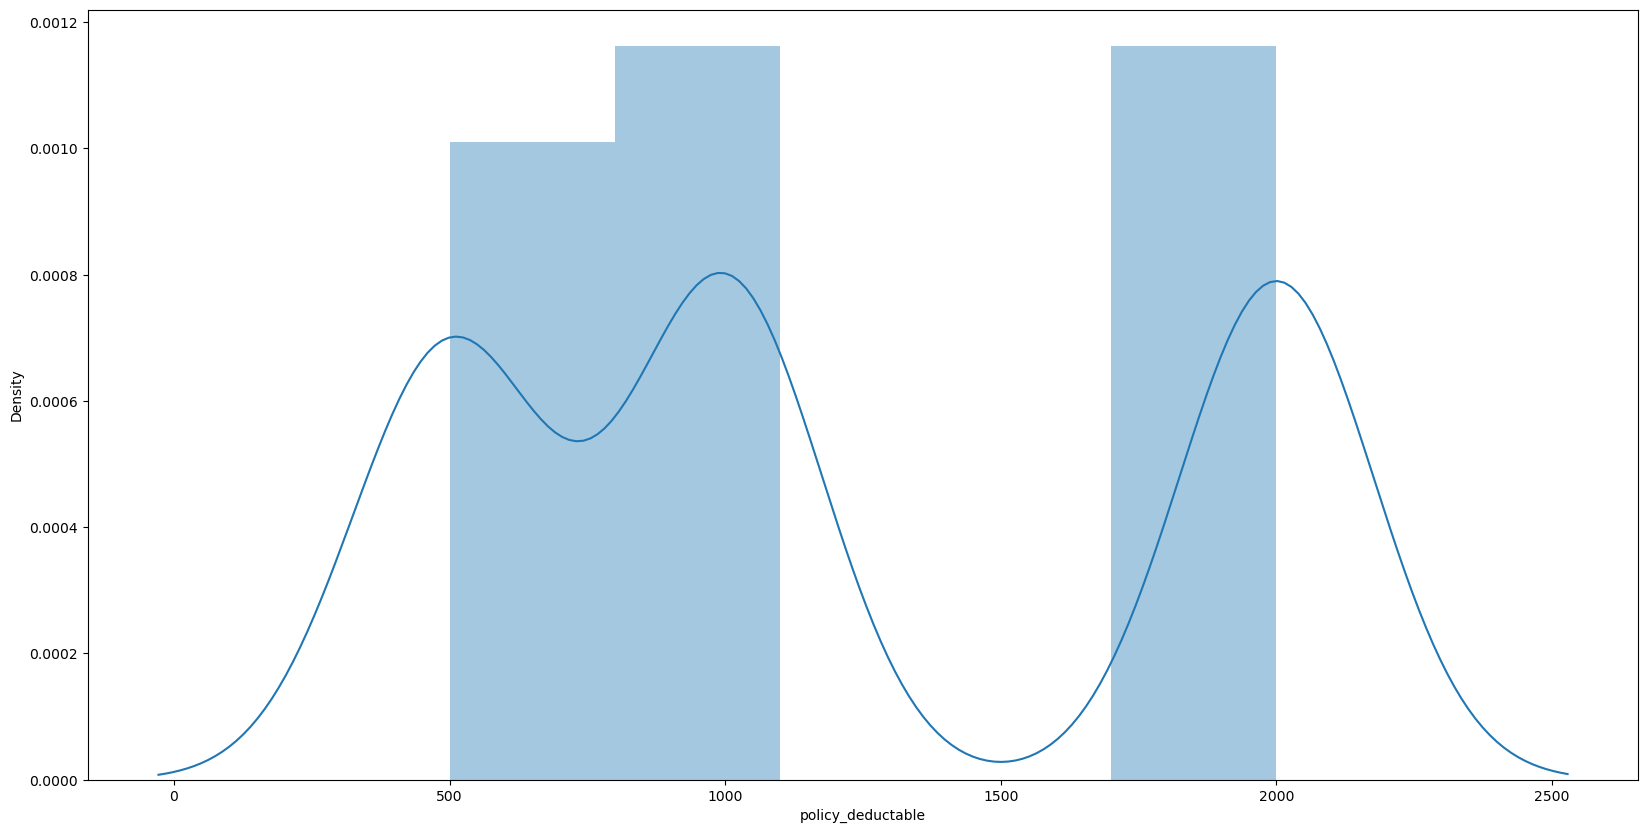

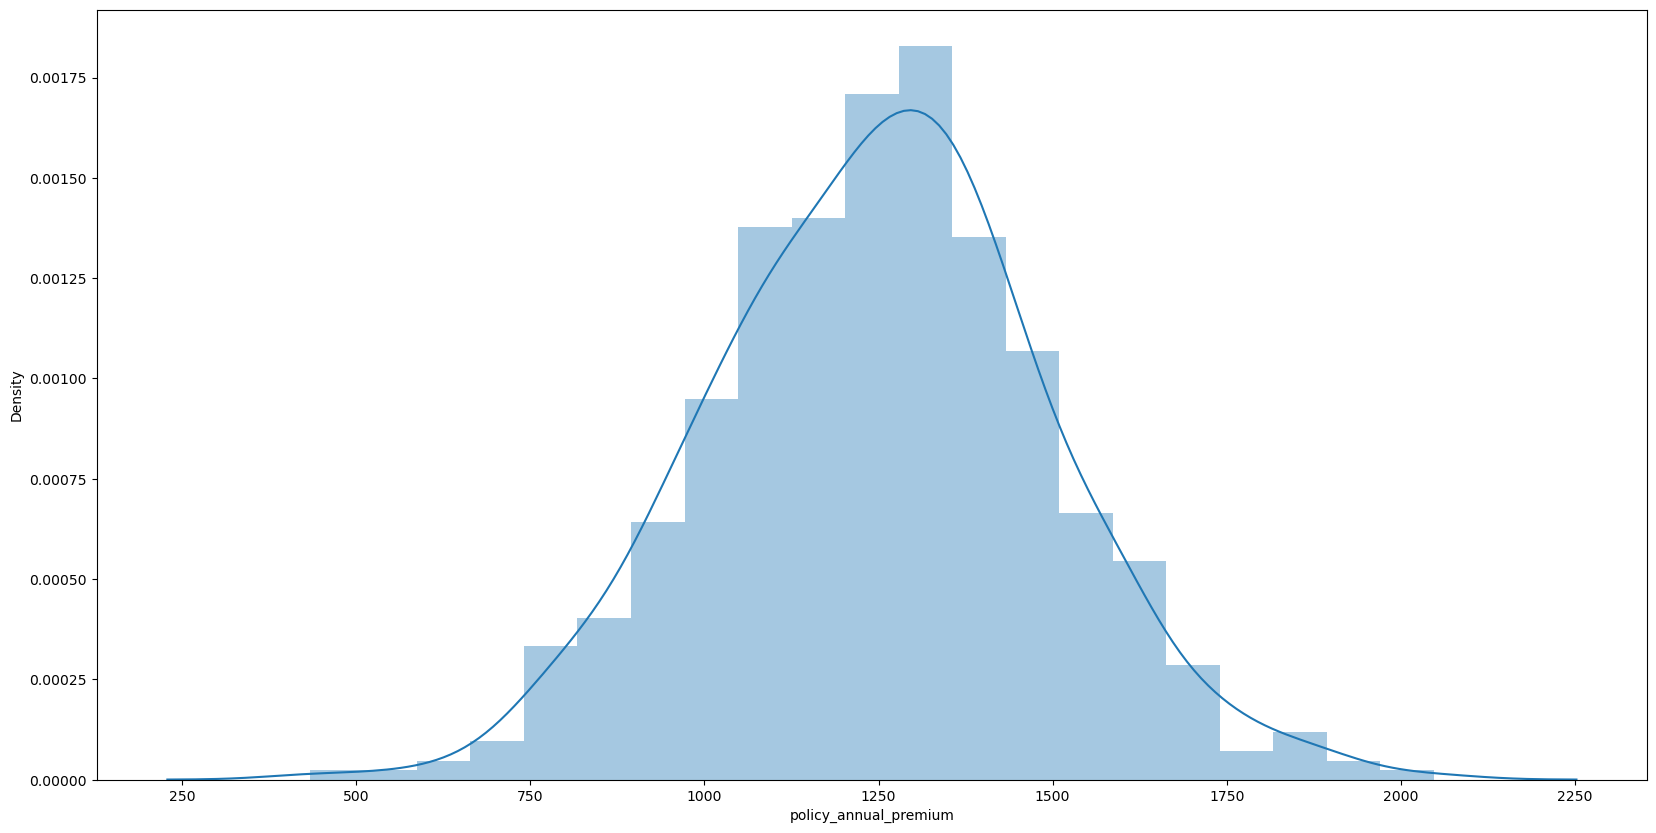

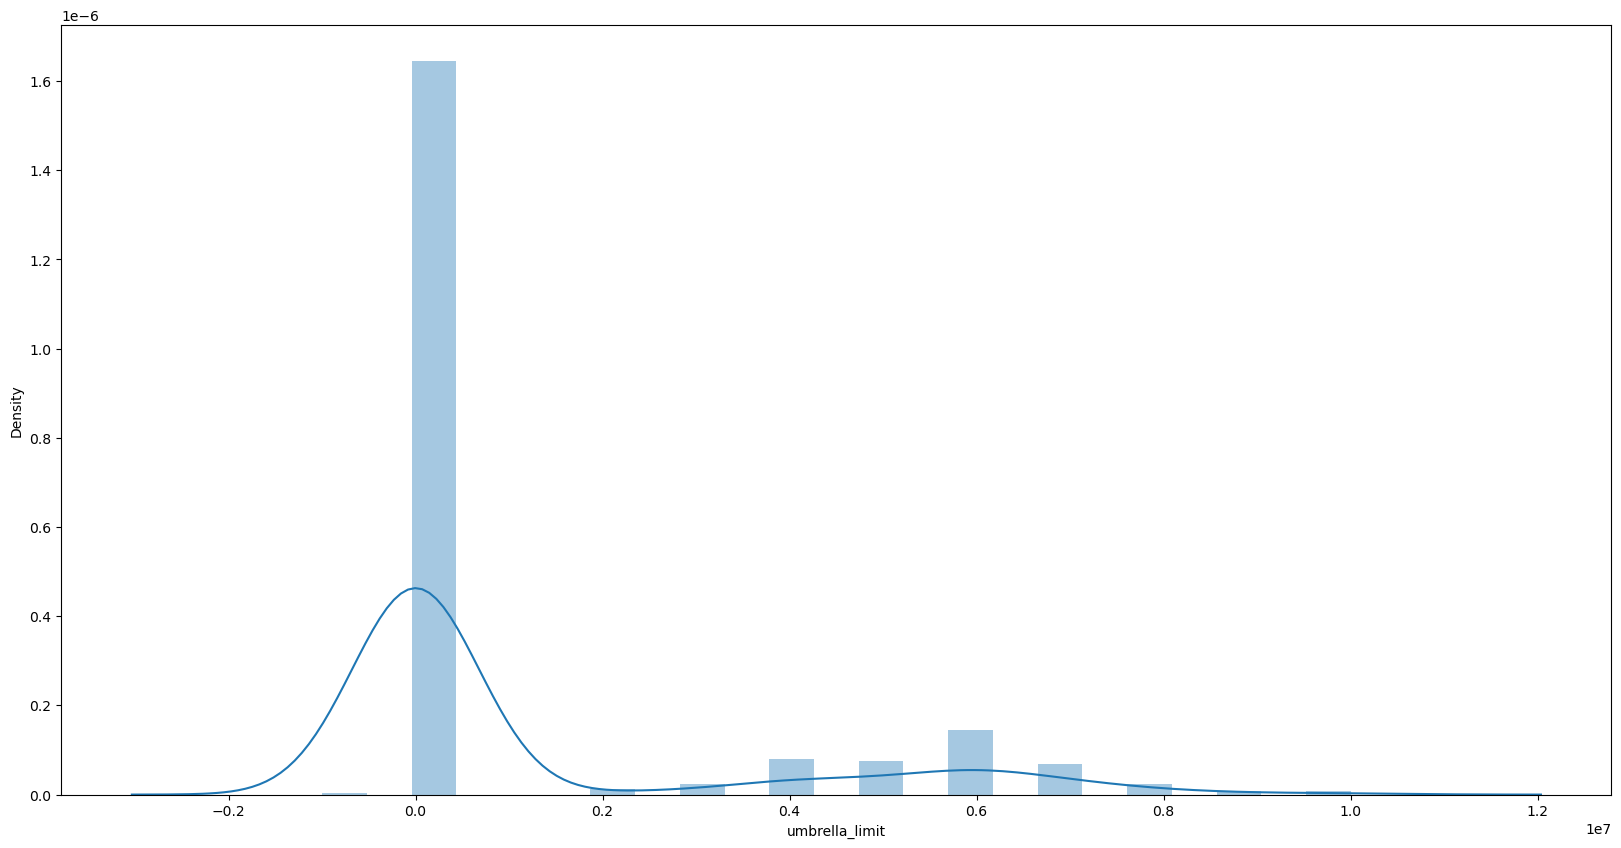

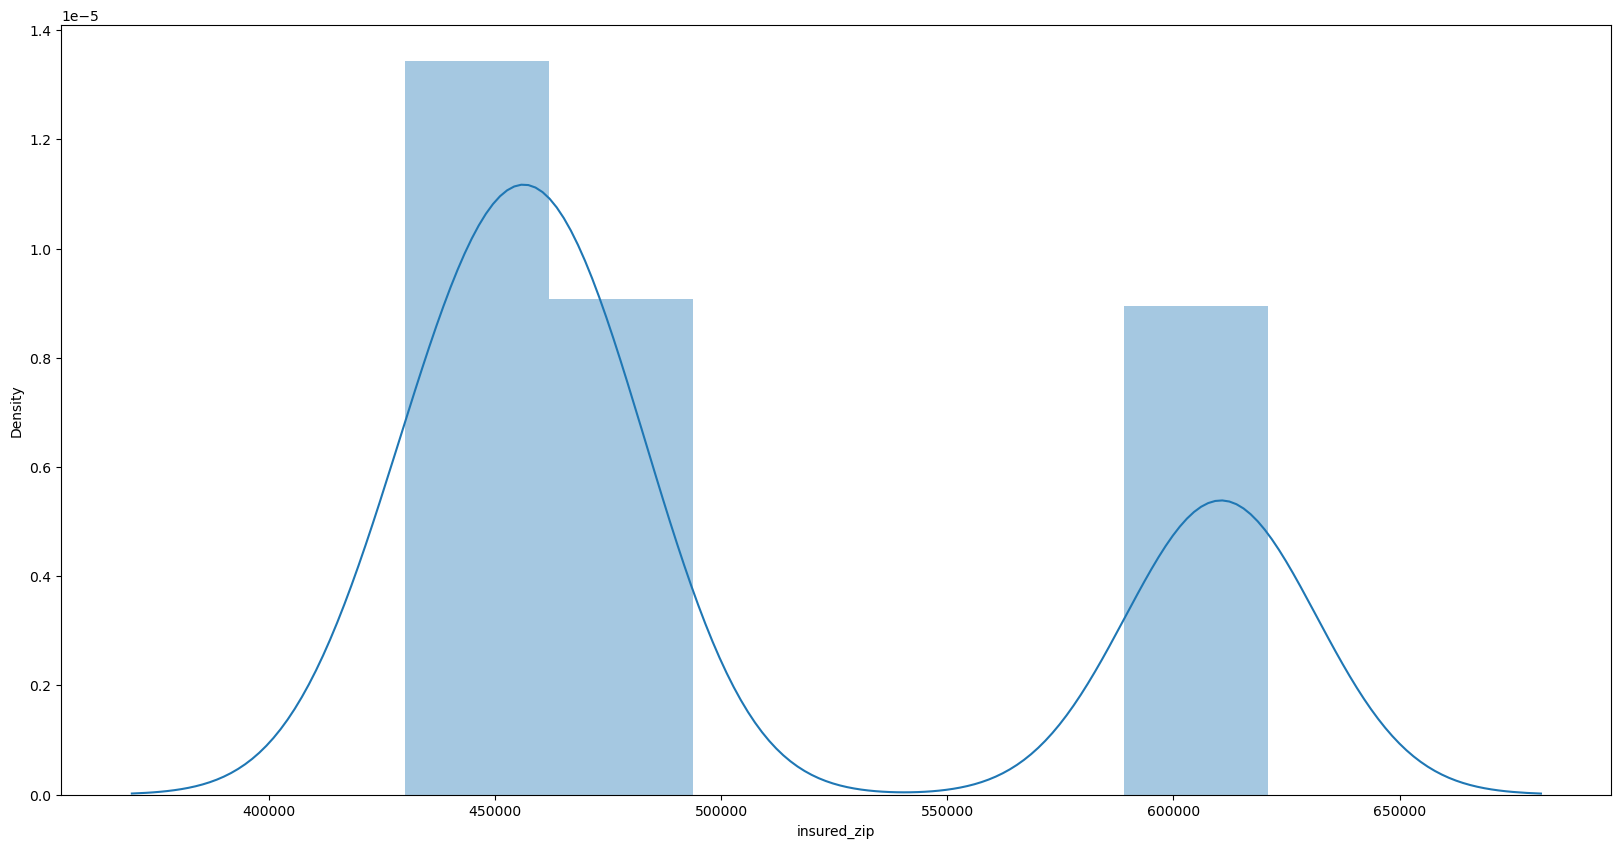

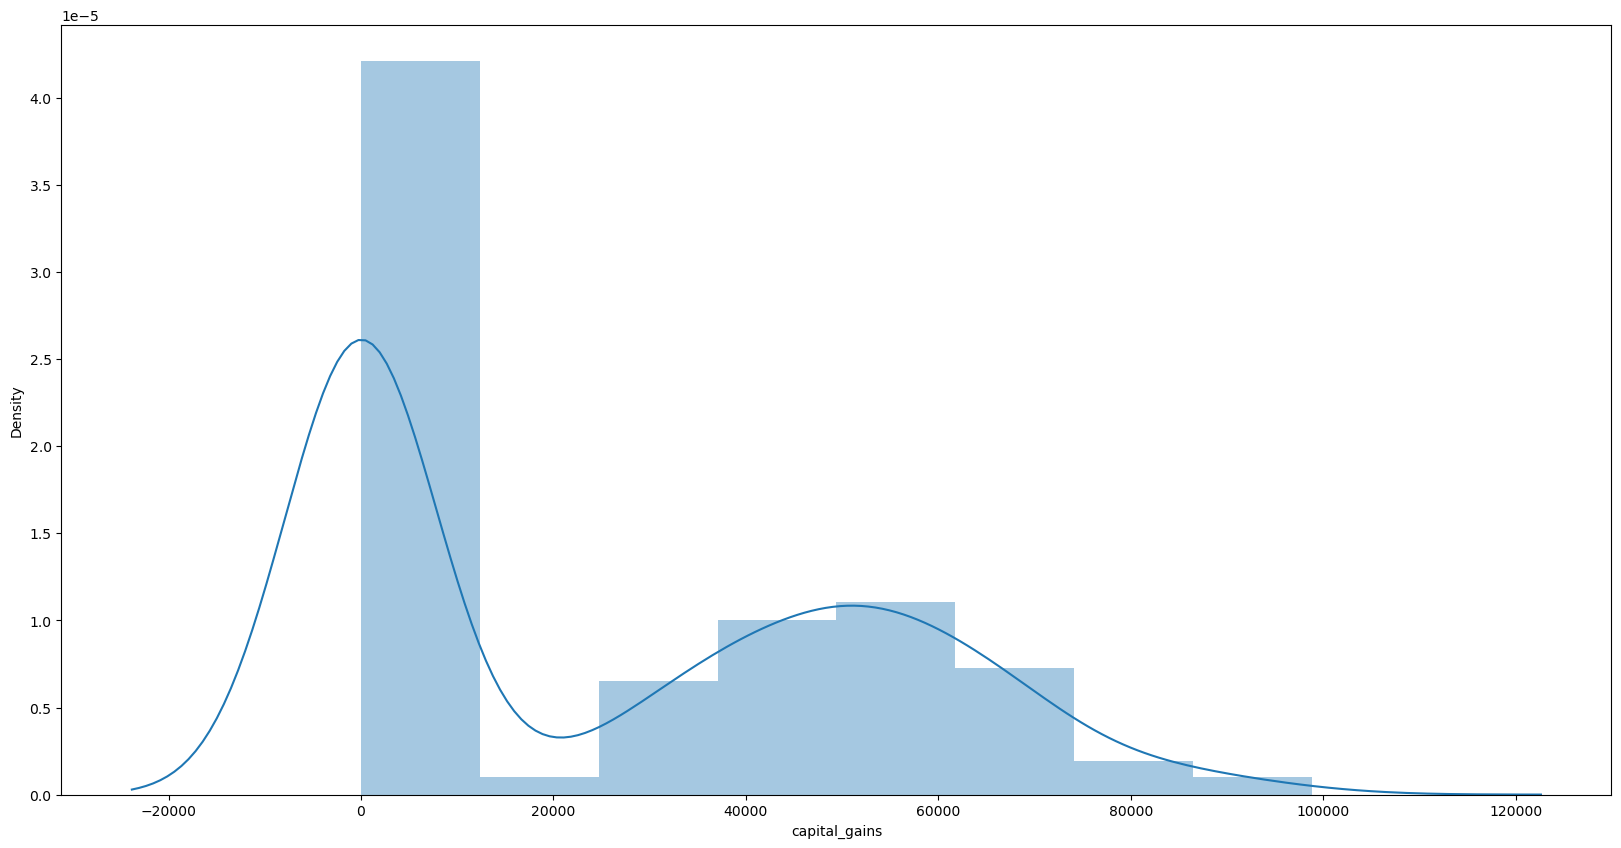

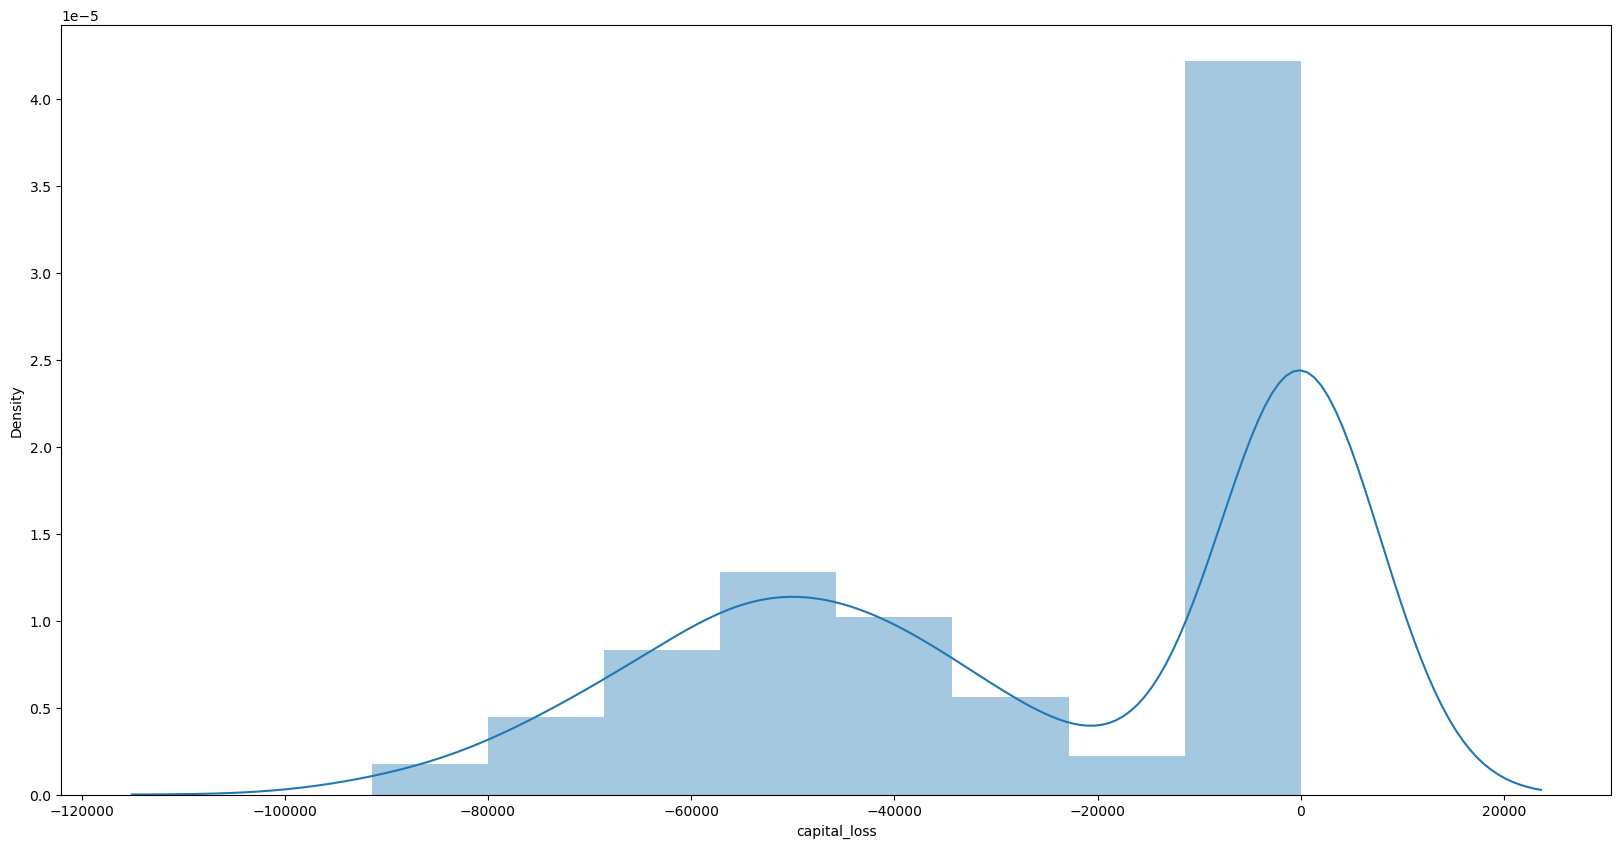

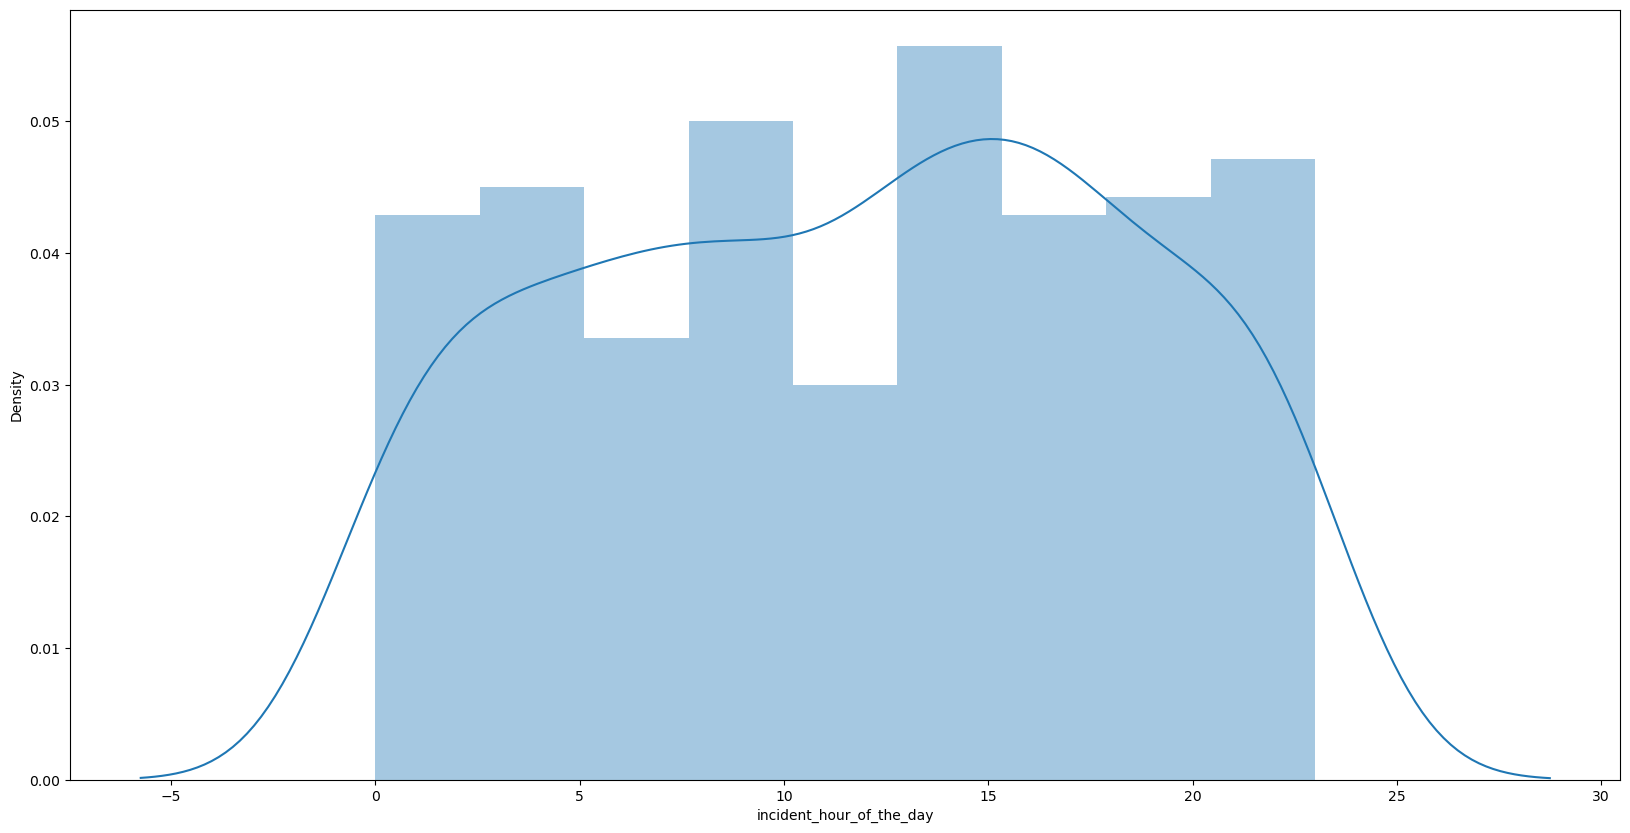

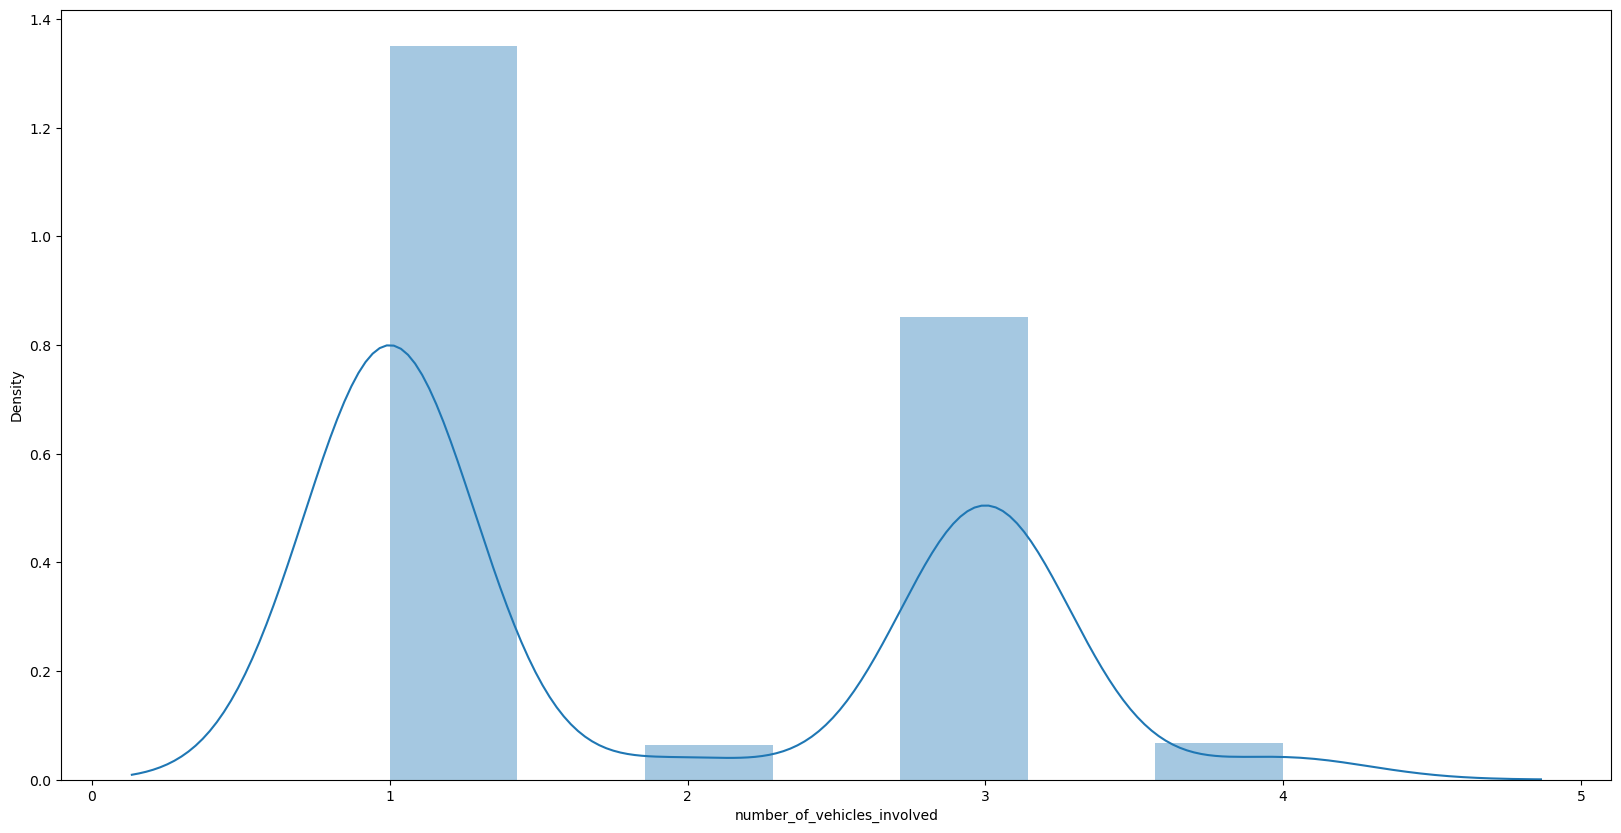

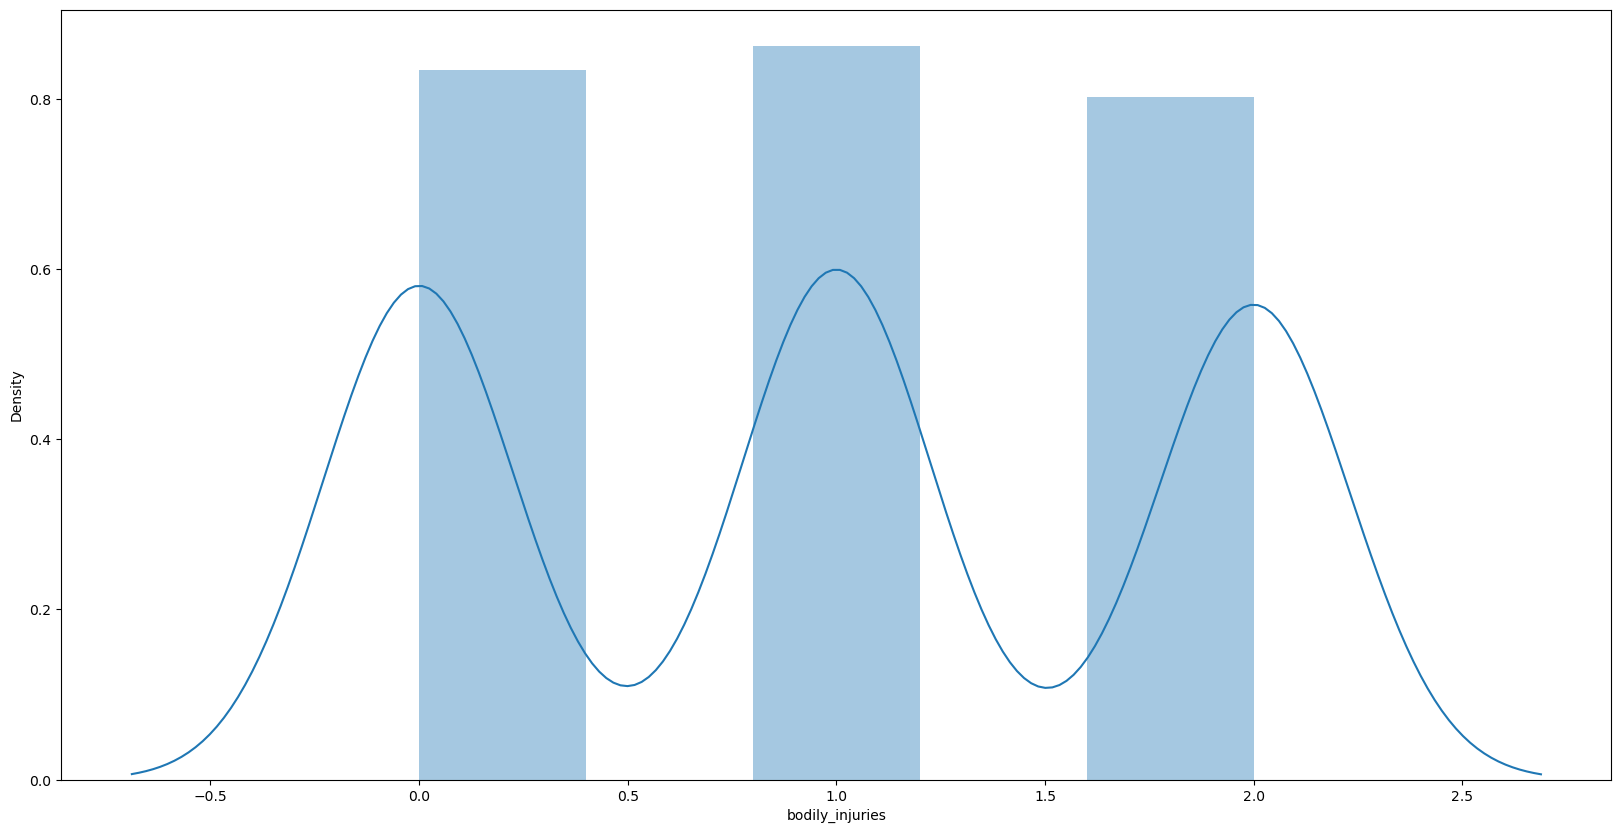

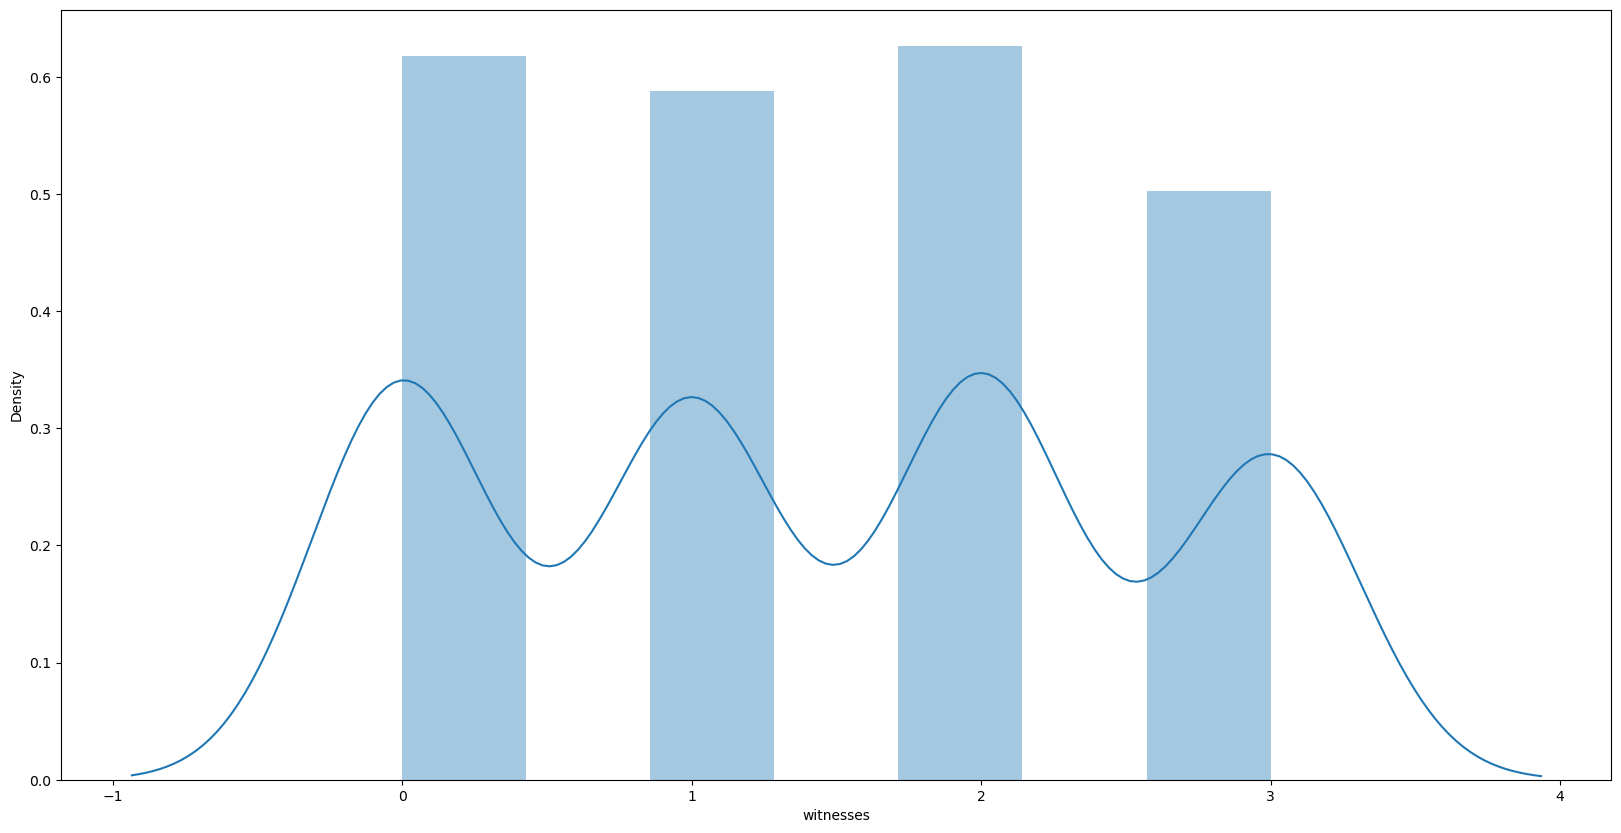

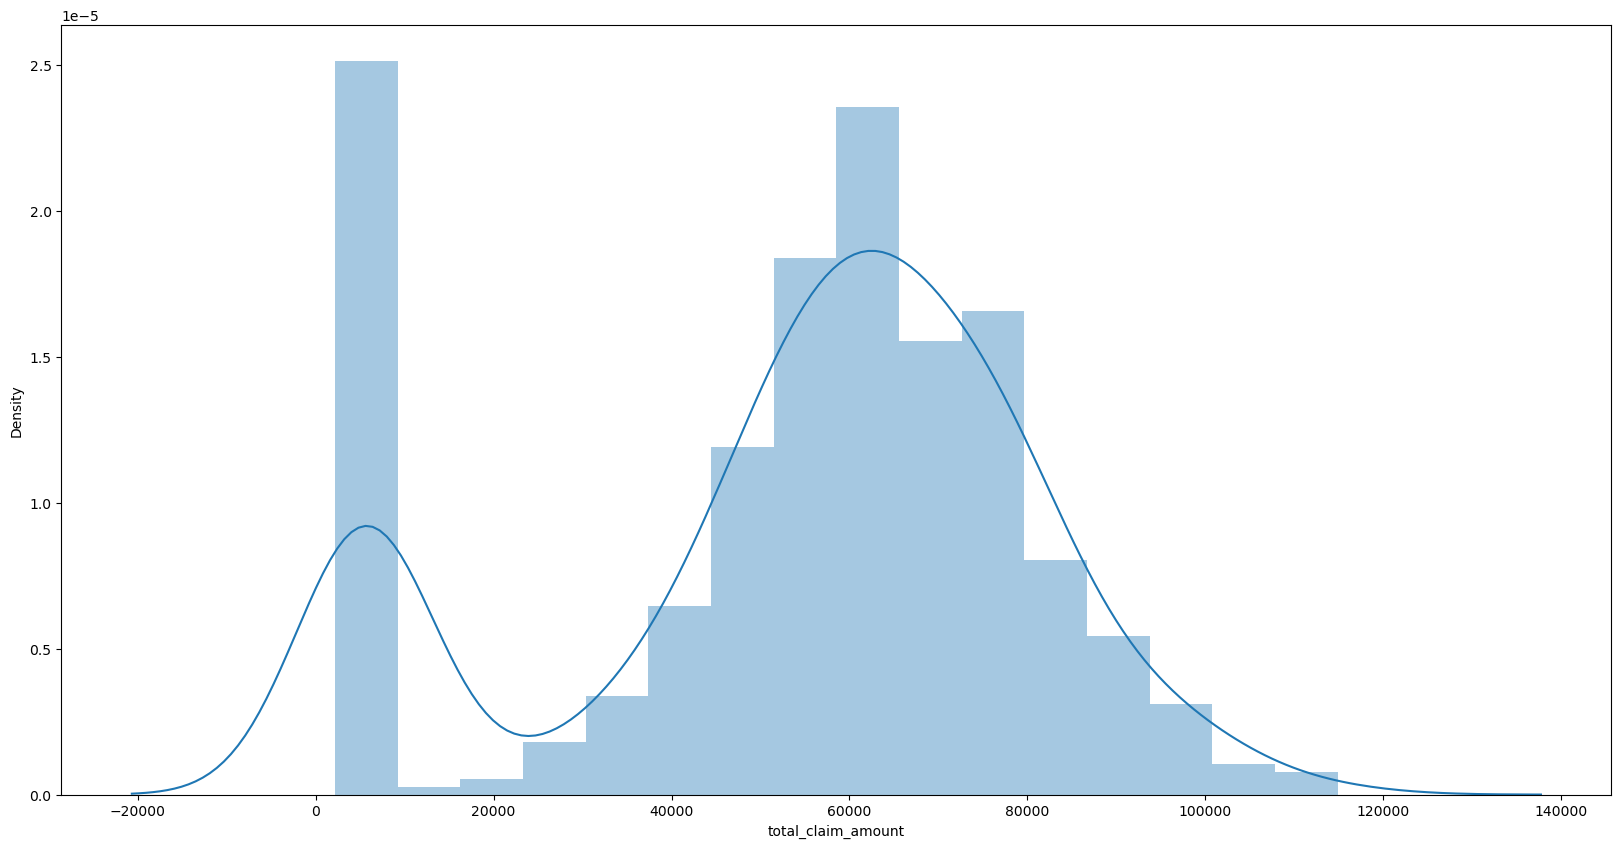

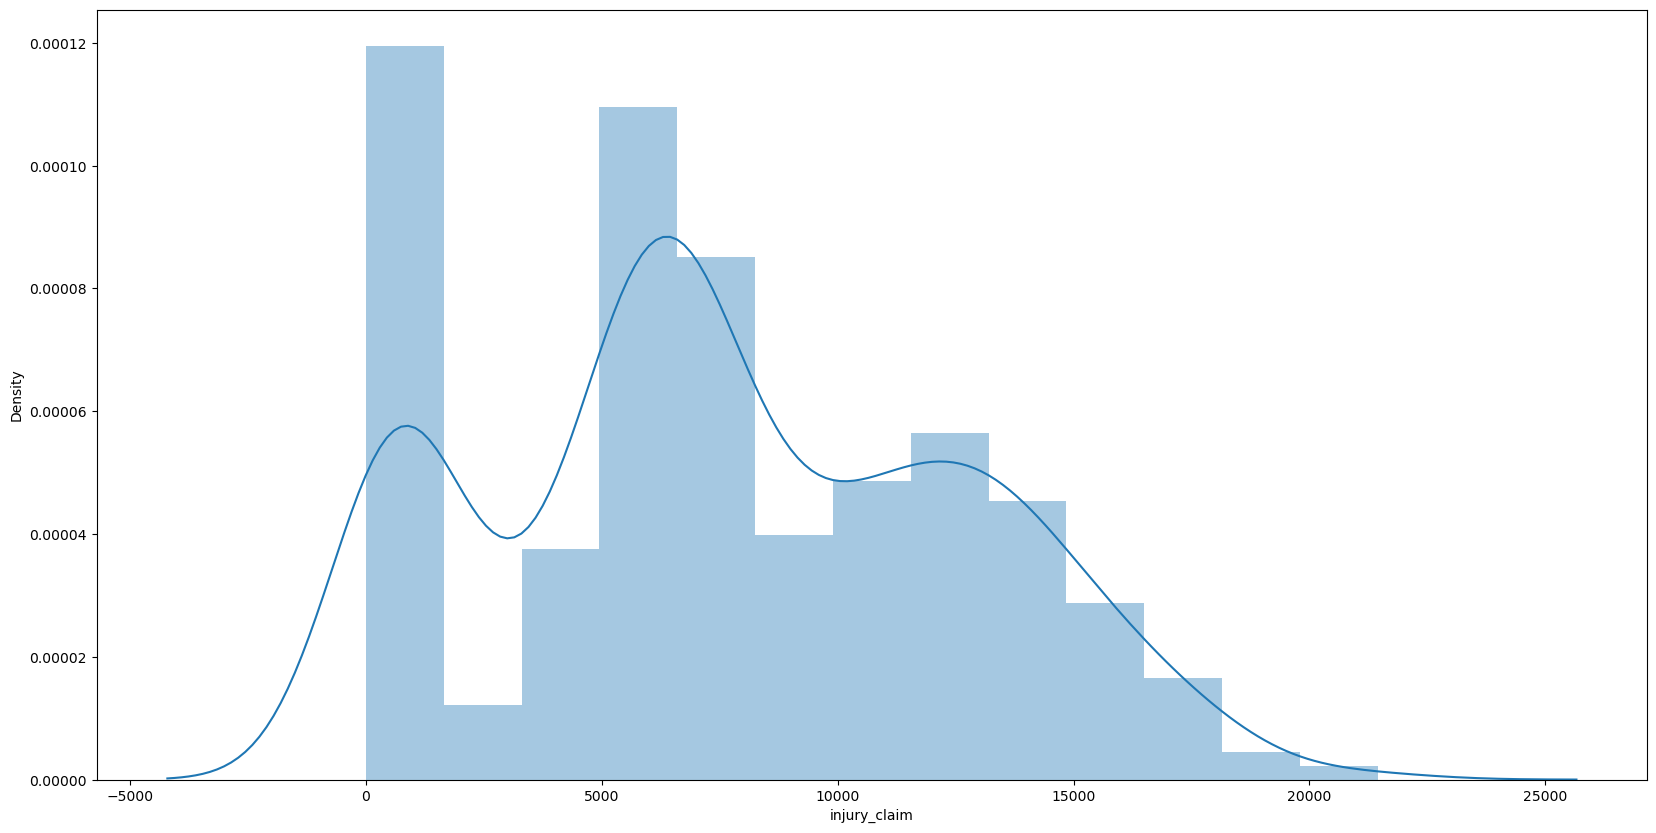

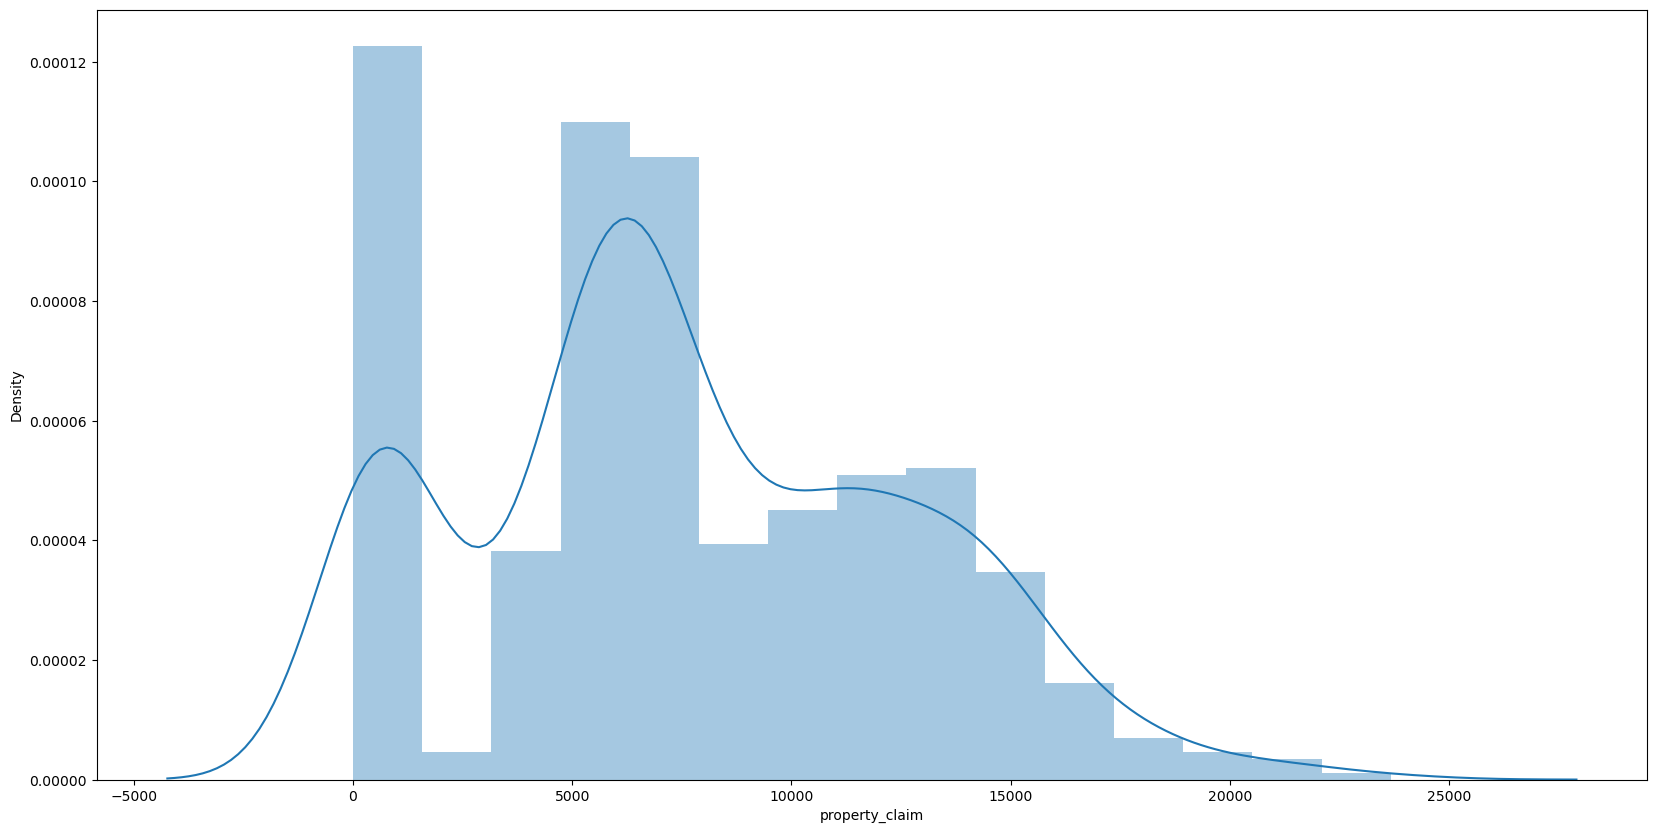

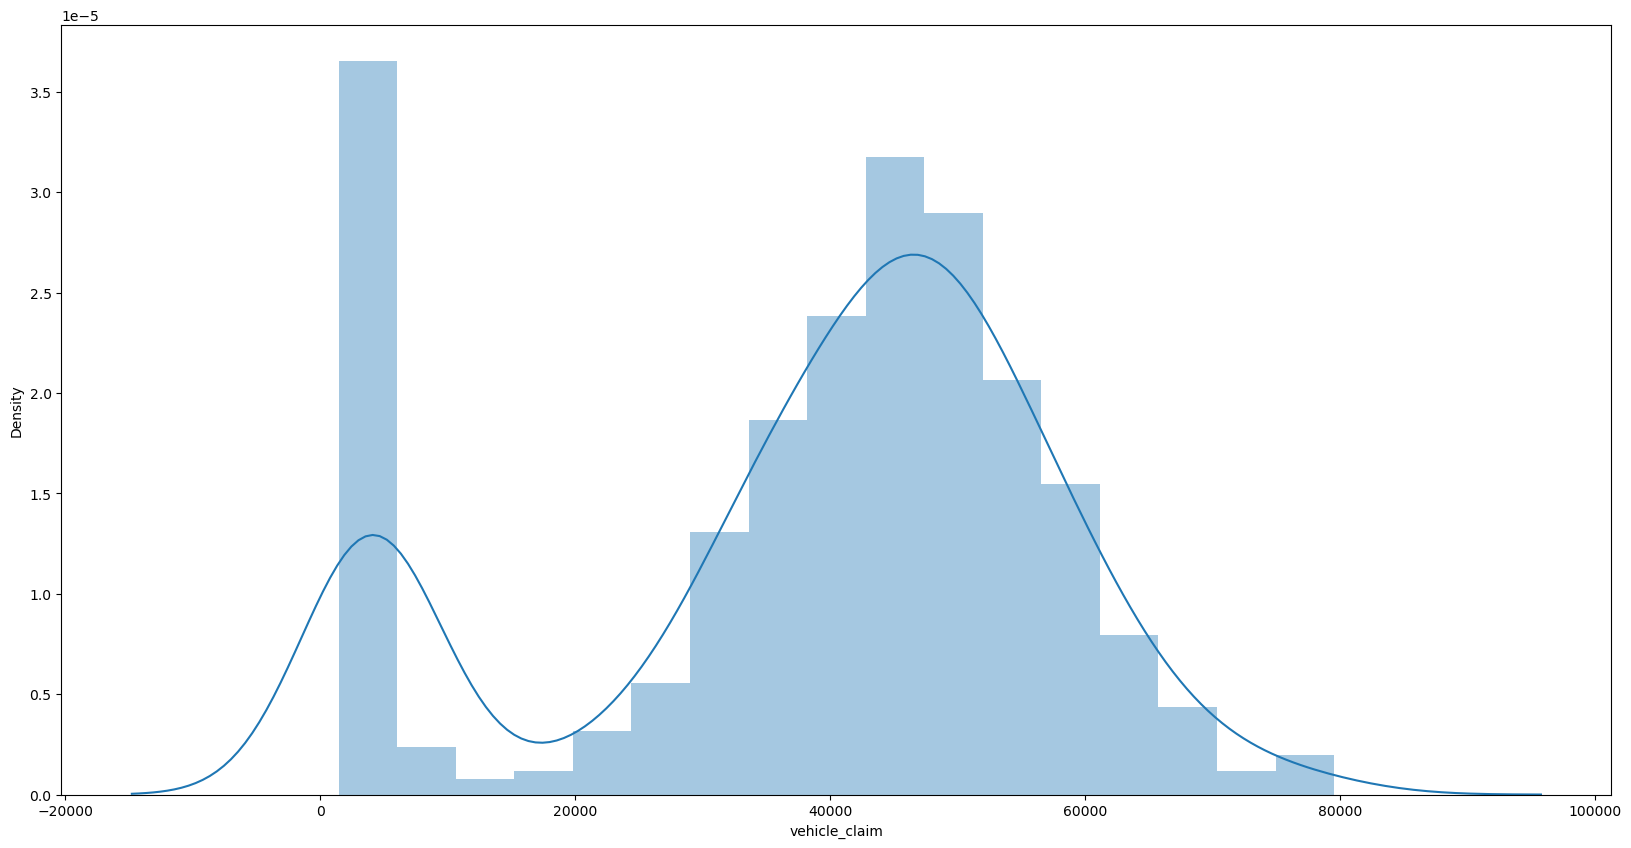

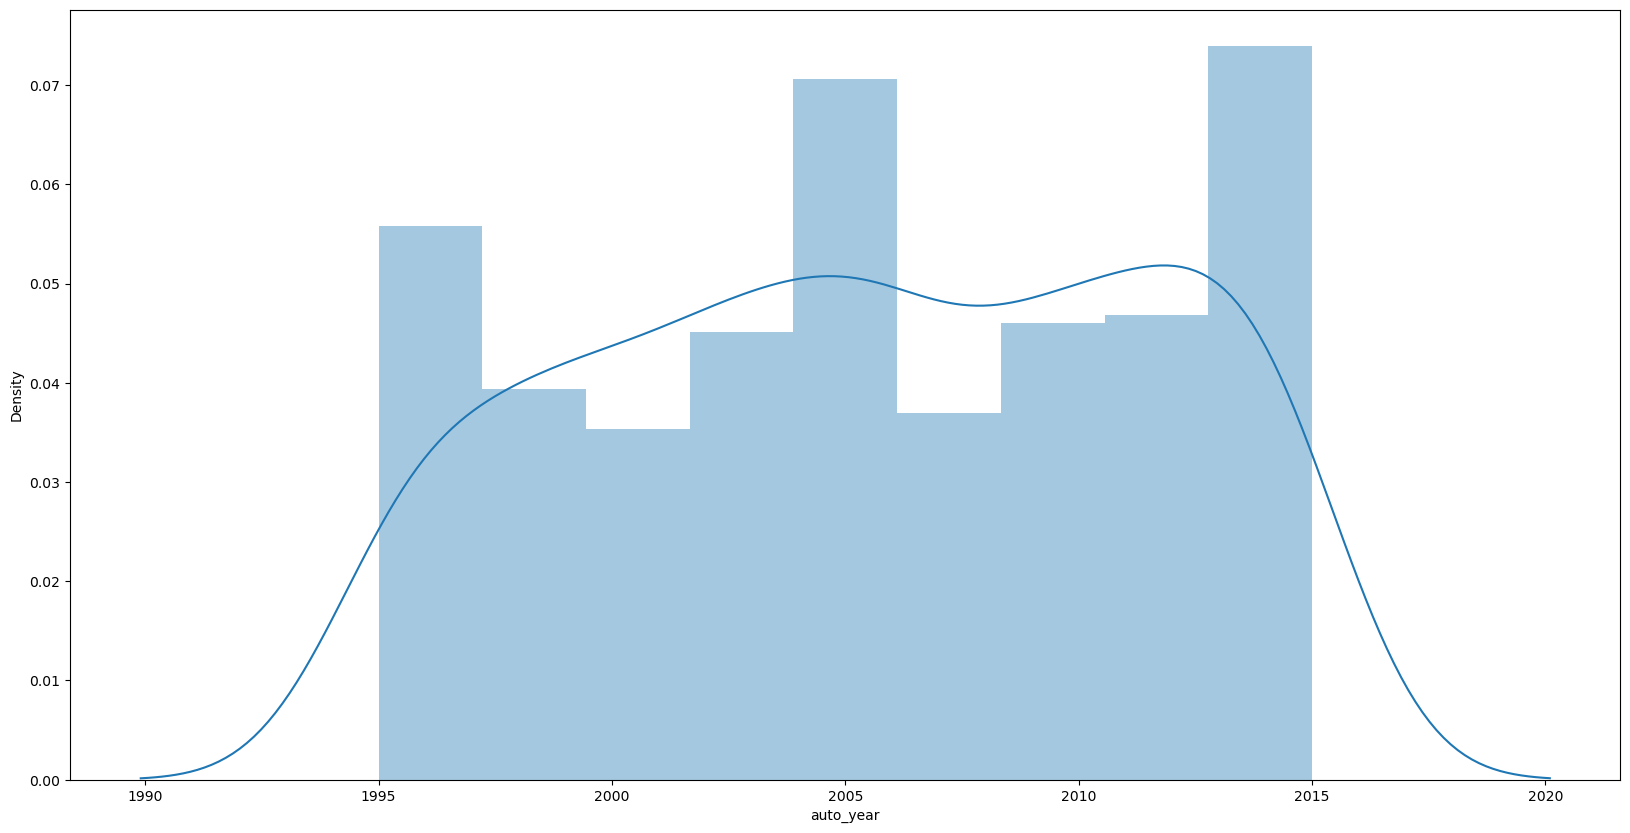

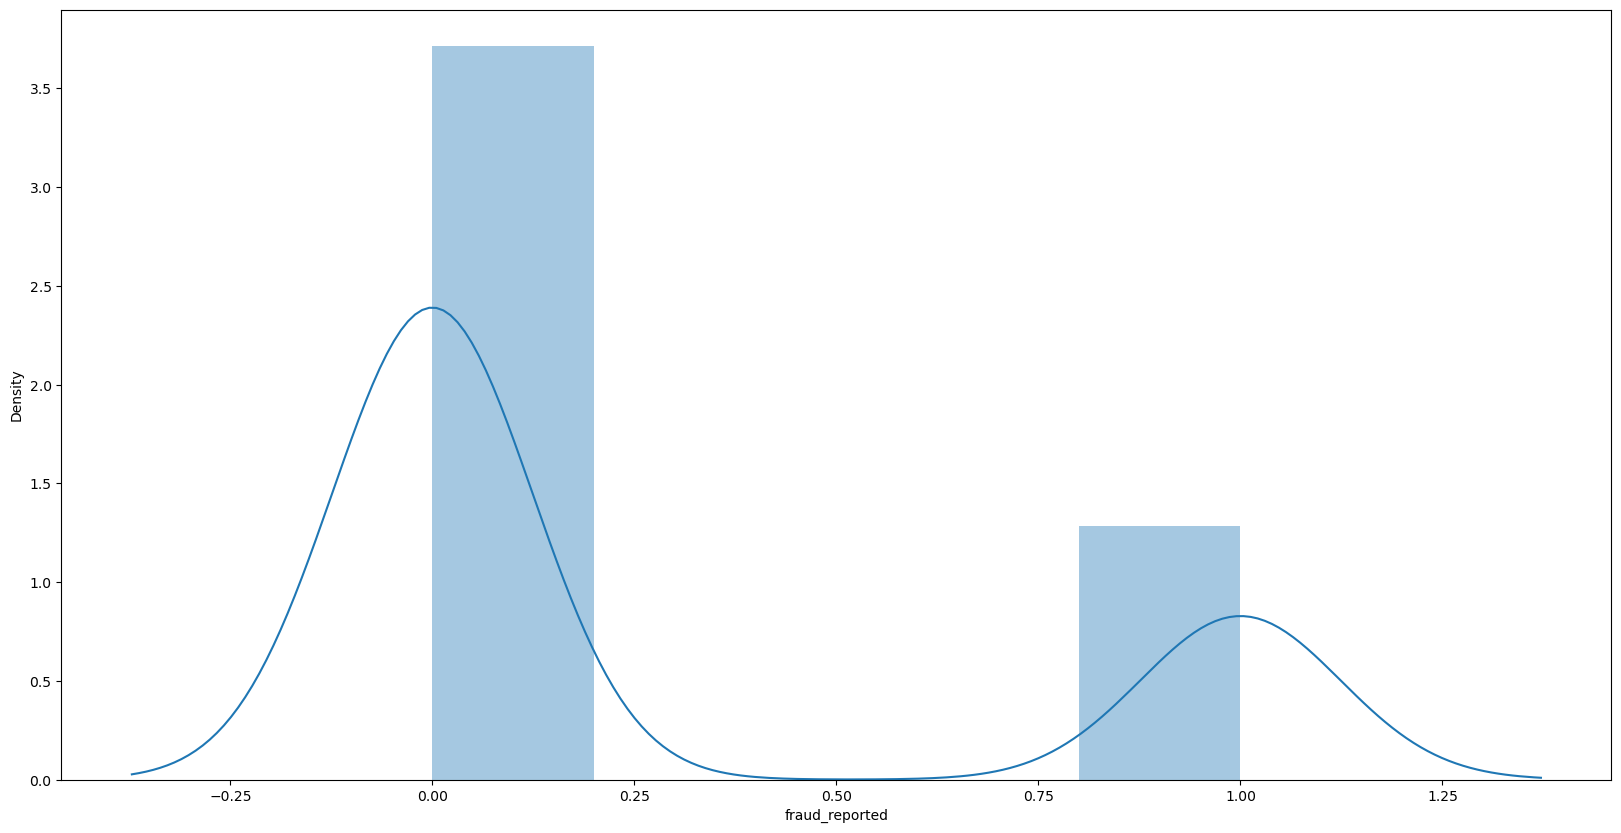

In [57]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

#### Variables Qualitatives

In [58]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

policy_bind_date---------------------------------- ['10/17/2014' '6/27/2006' '9/6/2000' '5/25/1990' '6/6/2014' '10/12/2006'
 '6/4/2000' '2/3/1990' '2/5/1997' '7/25/2011' '5/26/2002' '5/29/1999'
 '11/20/1997' '10/26/2012' '12/28/1998' '10/19/1992' '6/8/2005'
 '11/15/2004' '12/28/2014' '8/2/1992' '6/25/2002' '11/27/2005' '5/27/1994'
 '2/8/1991' '2/2/1996' '12/5/2013' '9/20/1990' '7/18/2002' '2/8/1990'
 '3/4/2014' '2/18/2000' '6/19/2008' '8/1/2003' '4/4/1992' '1/13/1991'
 '8/8/2010' '3/9/2003' '2/3/1993' '11/25/2002' '7/27/1997' '5/8/1995'
 '8/30/2012' '4/30/2006' '4/13/2003' '12/5/2007' '8/21/2006' '1/8/1990'
 '3/18/1990' '1/7/2008' '3/10/1997' '1/10/2004' '8/20/1994' '6/2/2002'
 '4/28/1994' '8/17/2014' '8/11/2007' '11/20/2008' '10/18/1995' '5/19/1993'
 '2/26/2005' '2/14/1990' '9/30/1993' '6/10/2014' '10/28/2008' '4/24/2007'
 '12/13/1993' '8/17/2011' '8/20/1990' '2/11/1994' '2/22/1994' '8/15/2011'
 '11/11/1998' '12/4/1995' '12/28/2002' '4/15/2004' '2/2/2001' '1/12/2010'
 '4/14/1992' '5/2

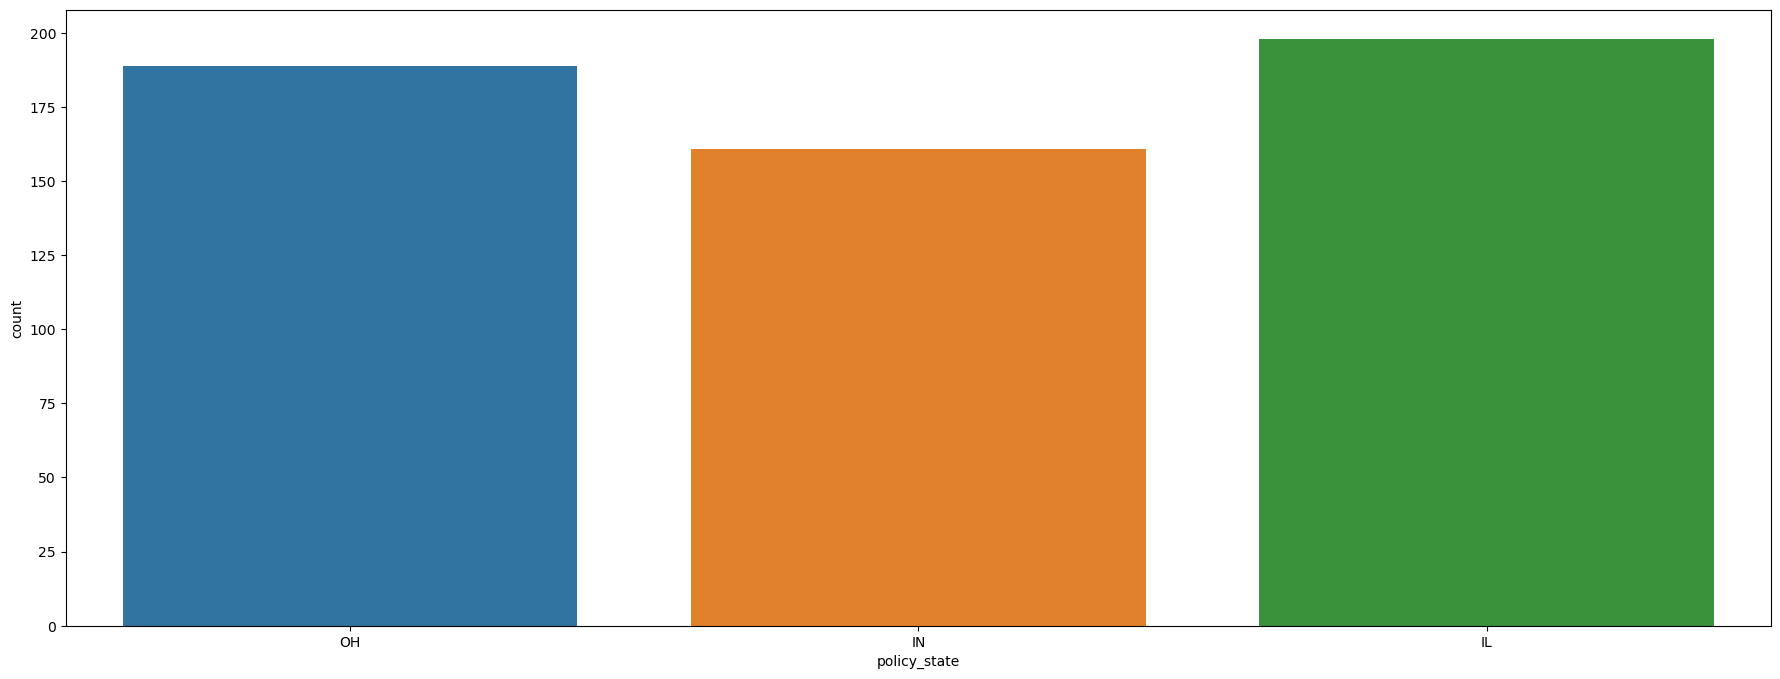

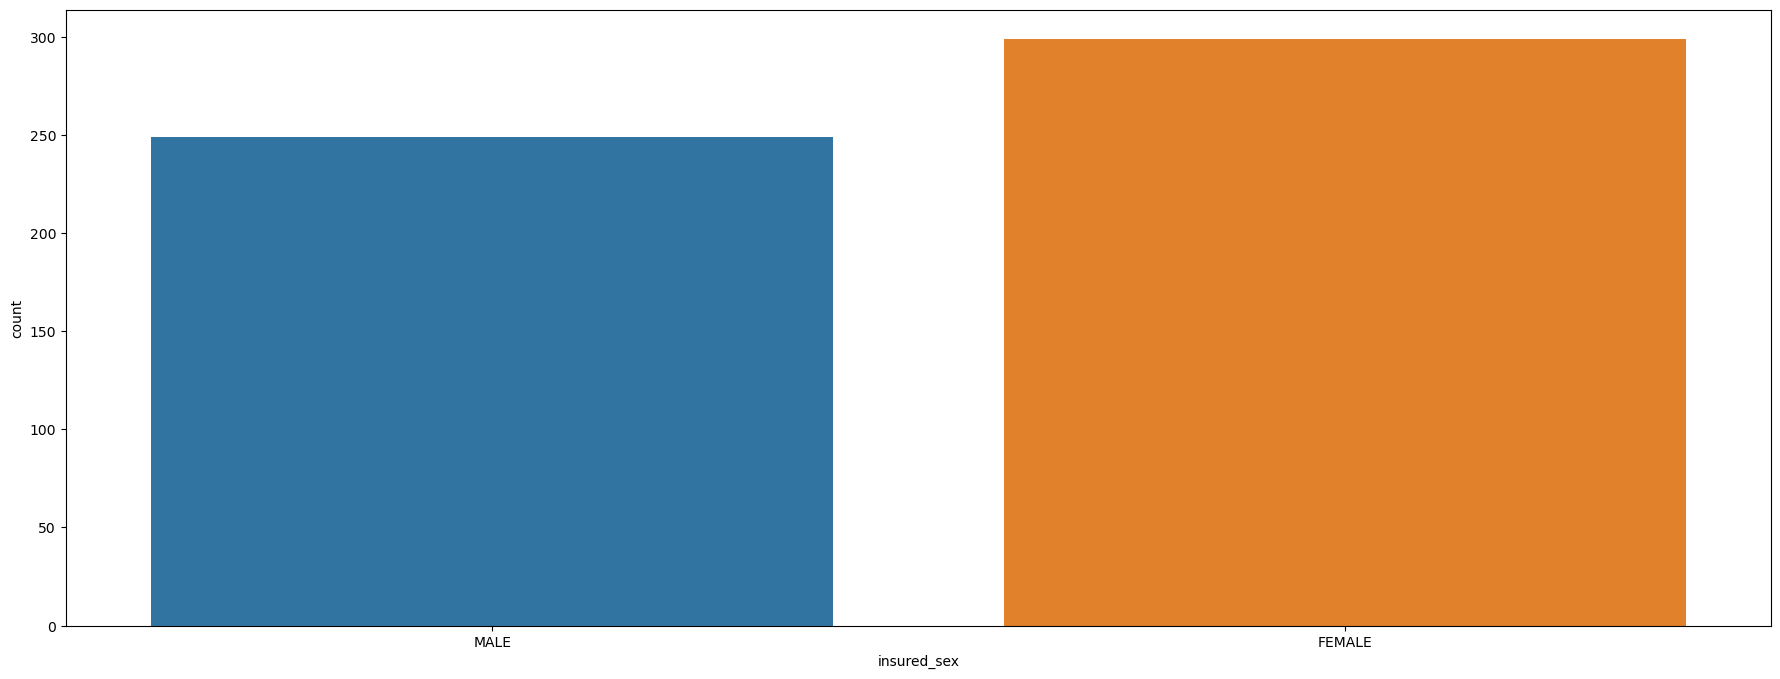

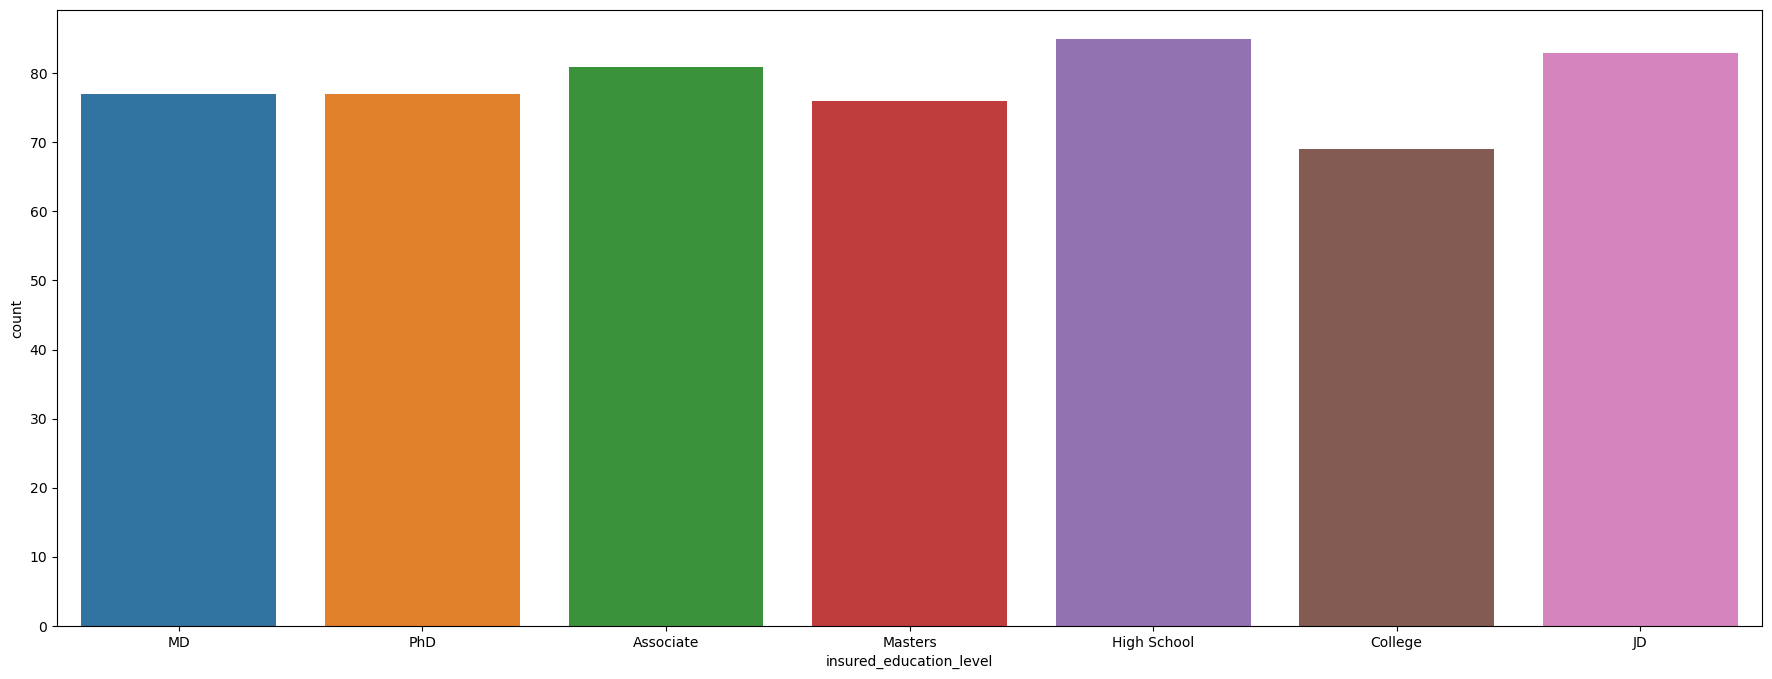

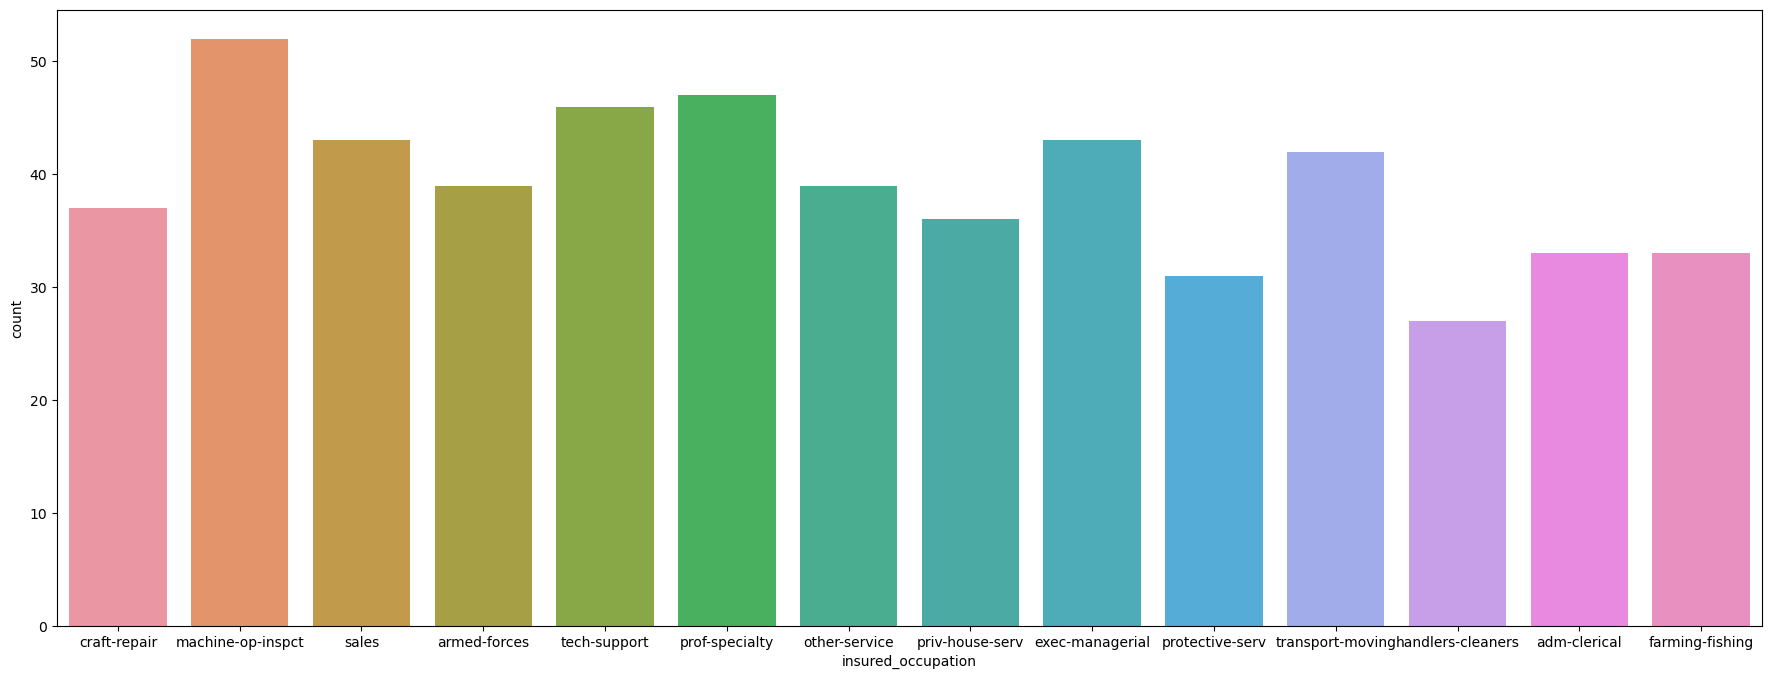

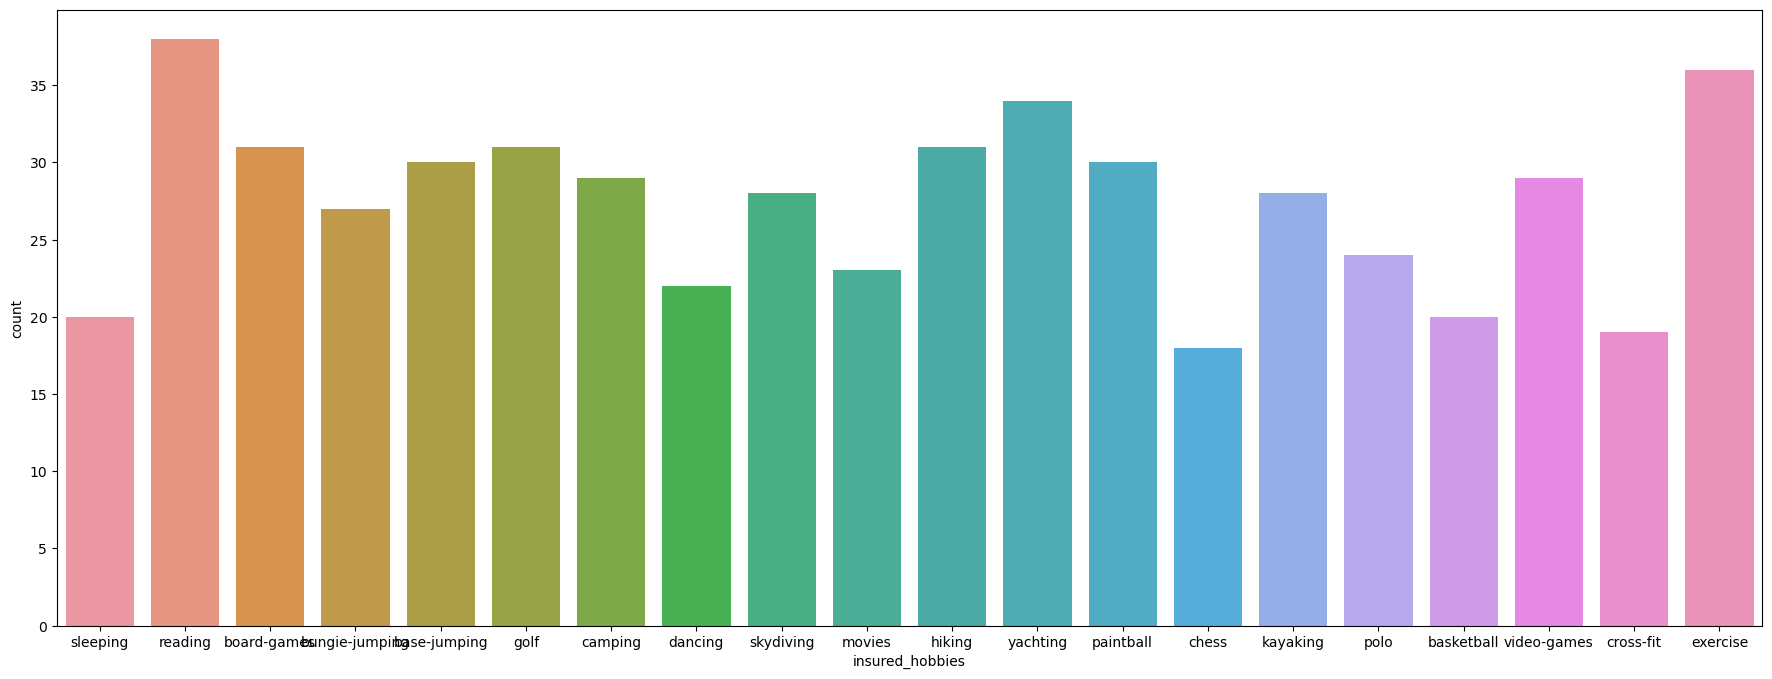

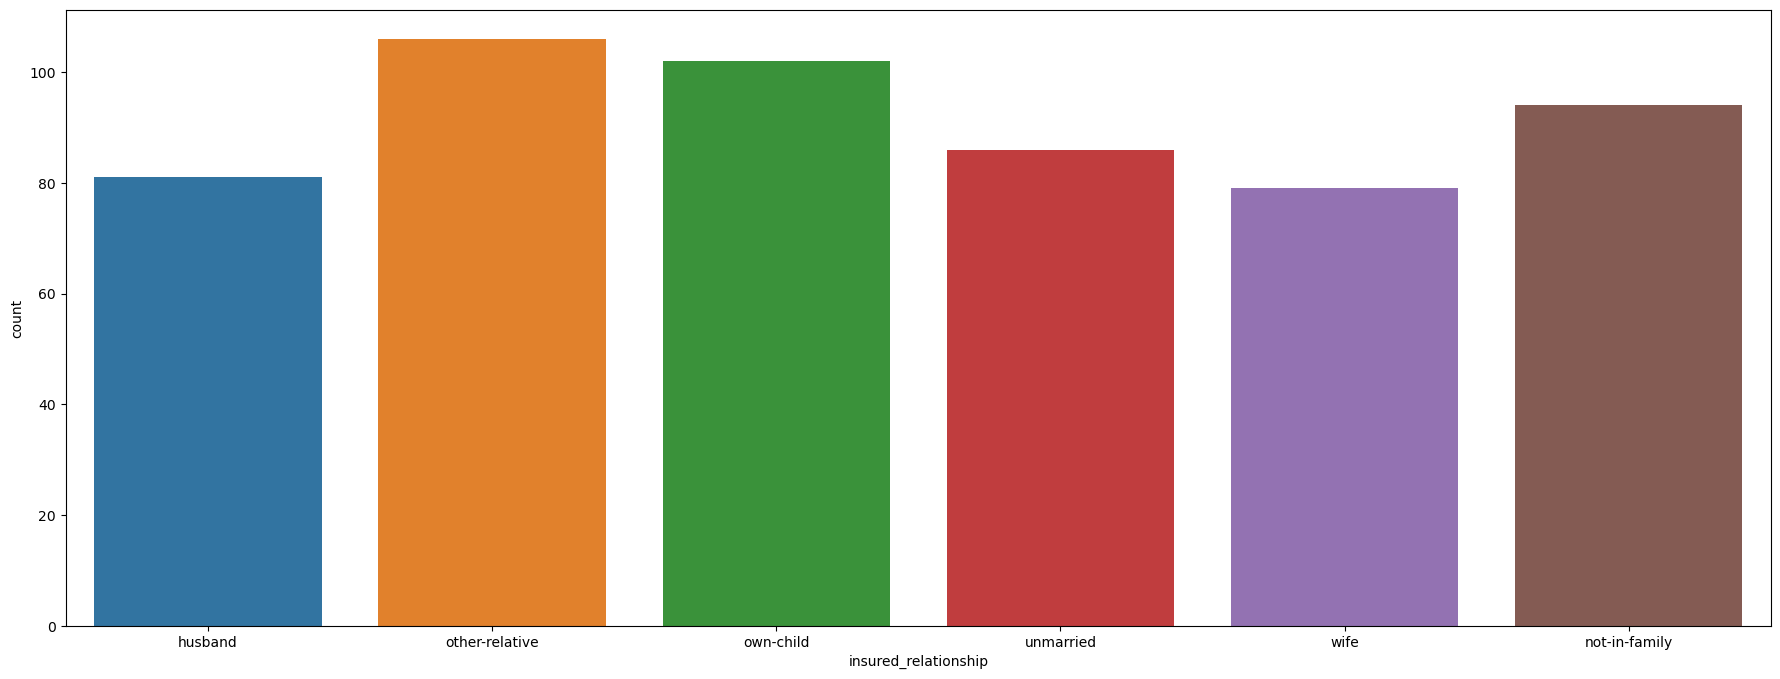

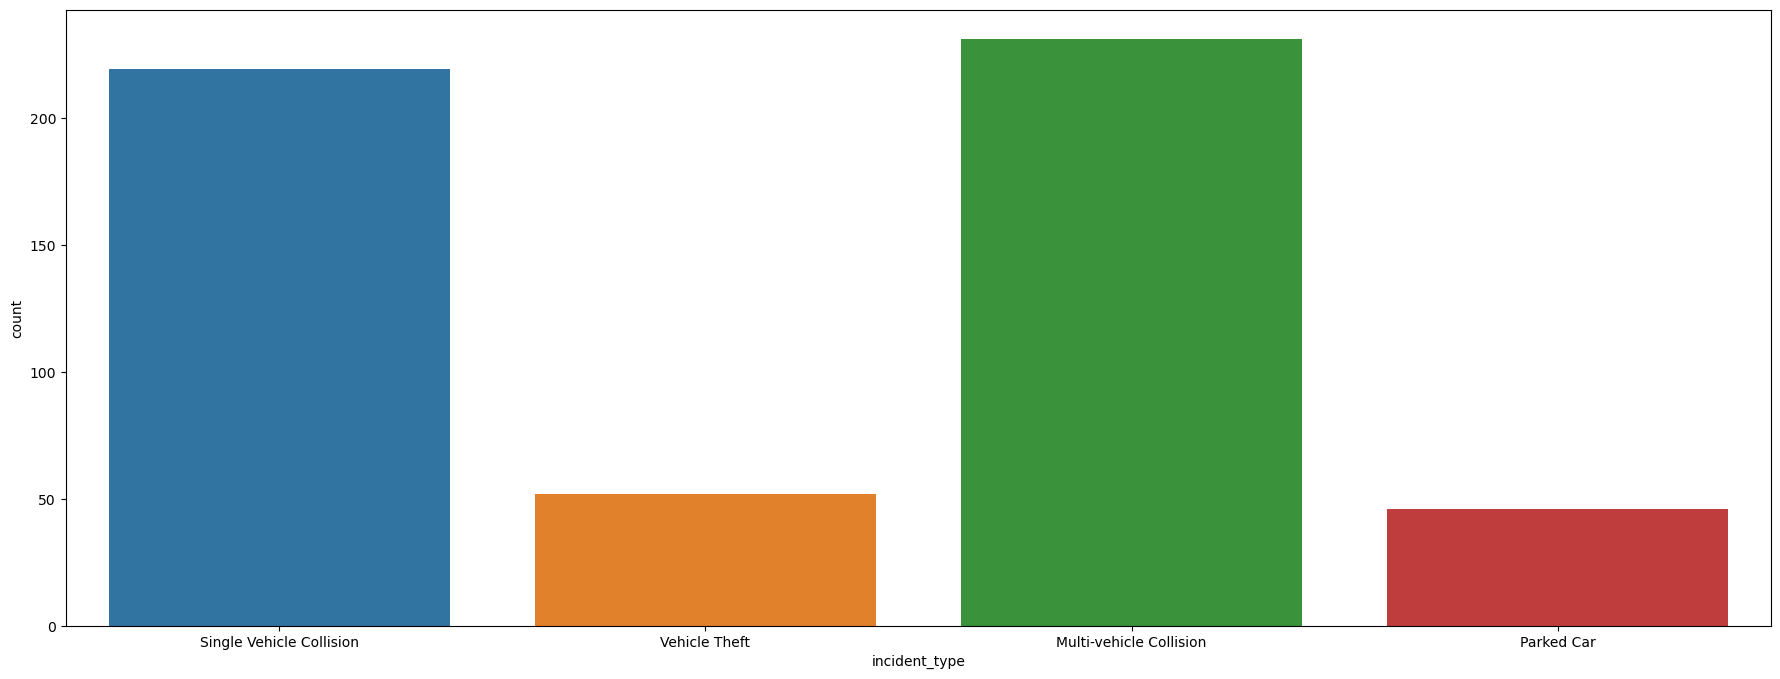

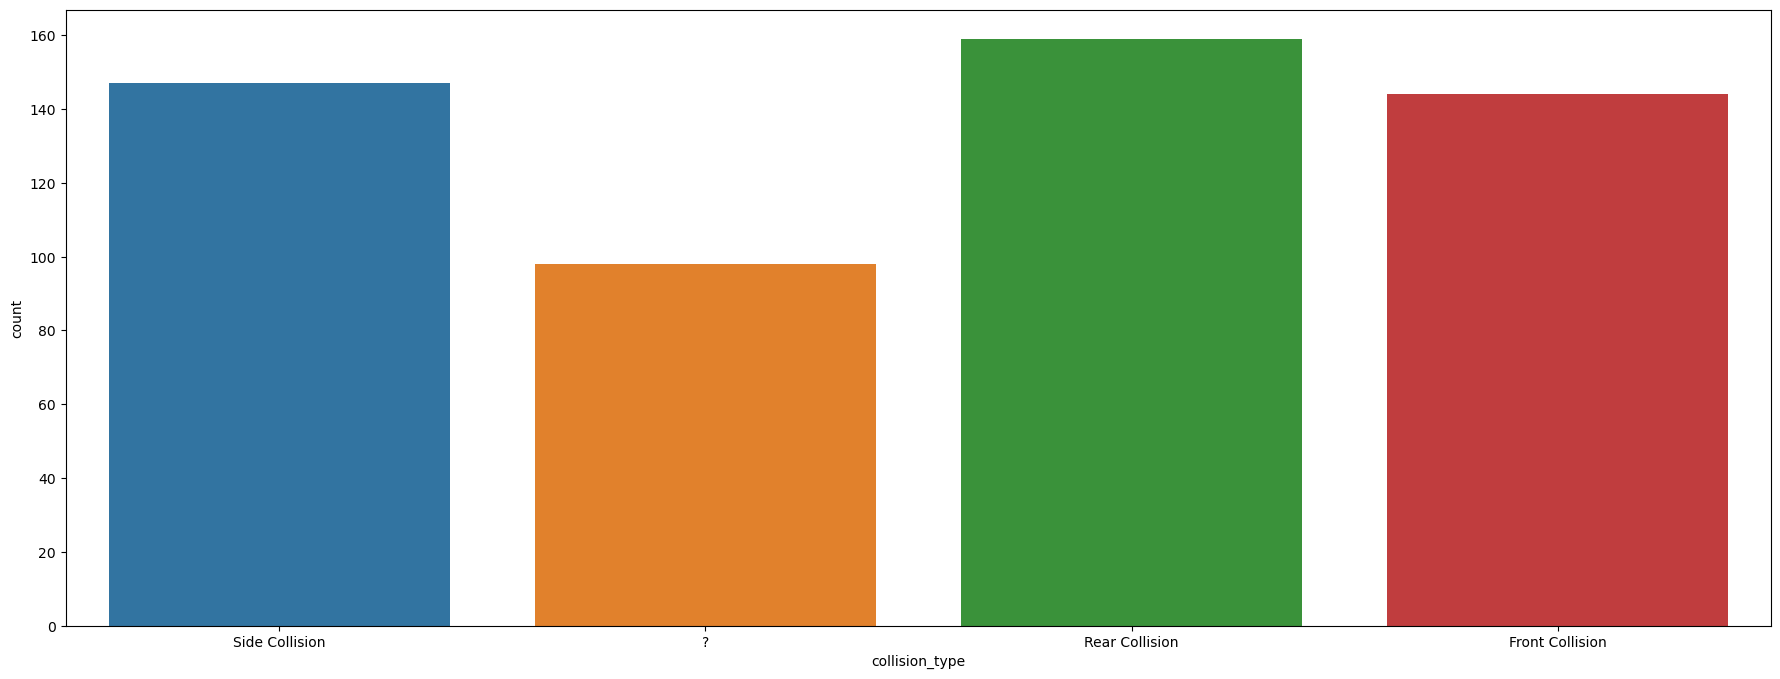

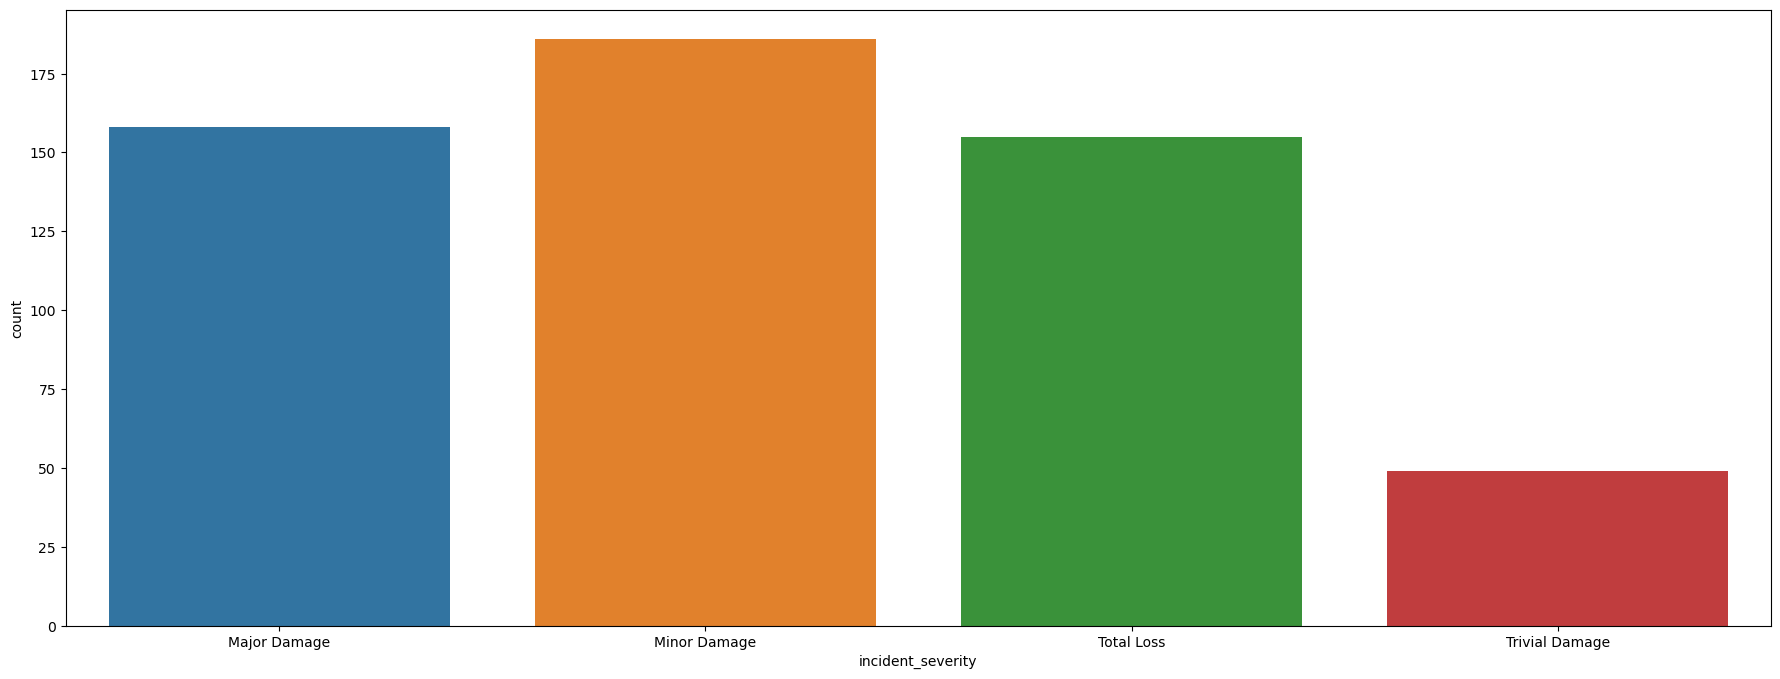

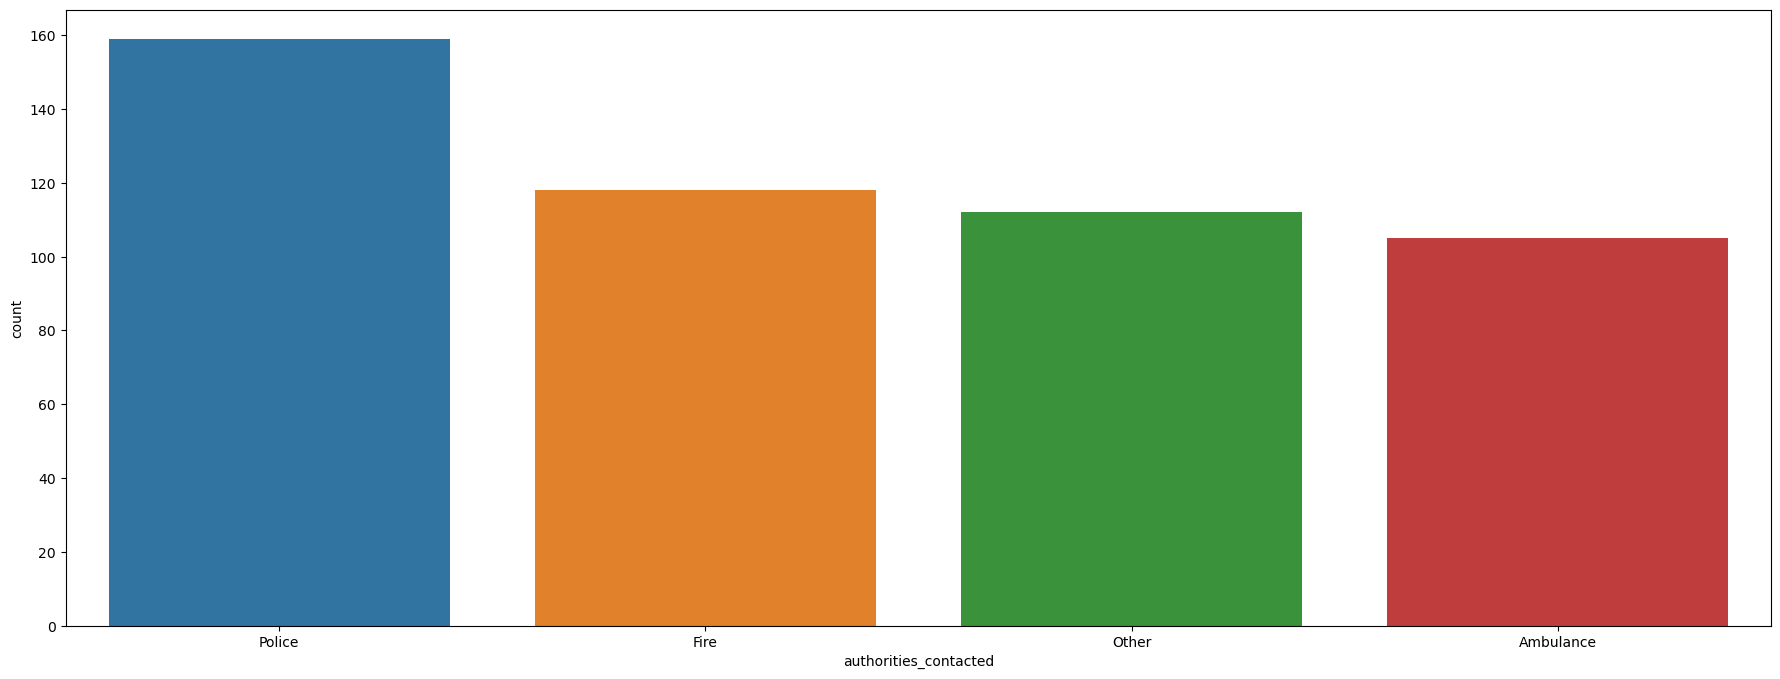

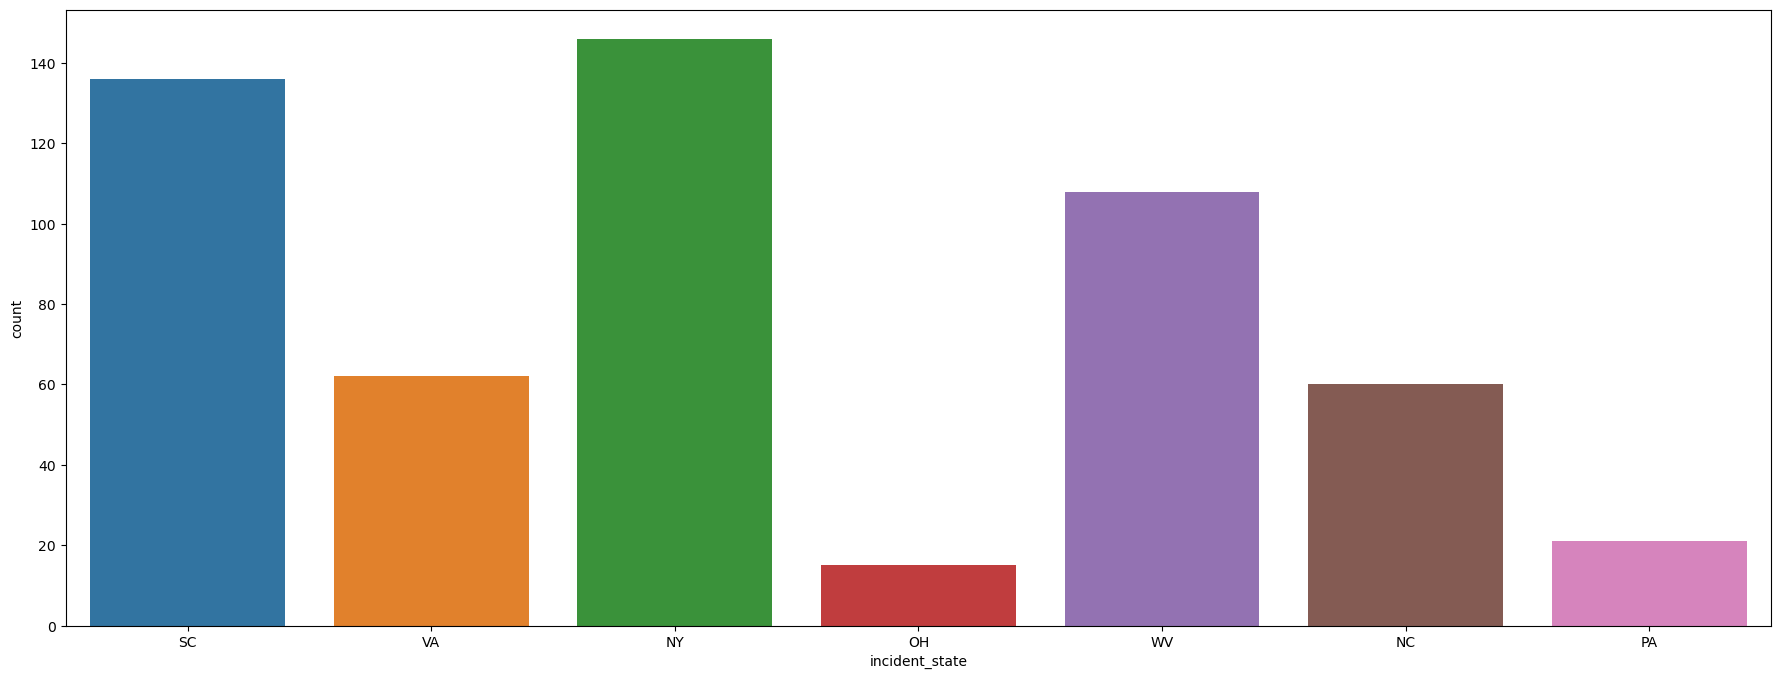

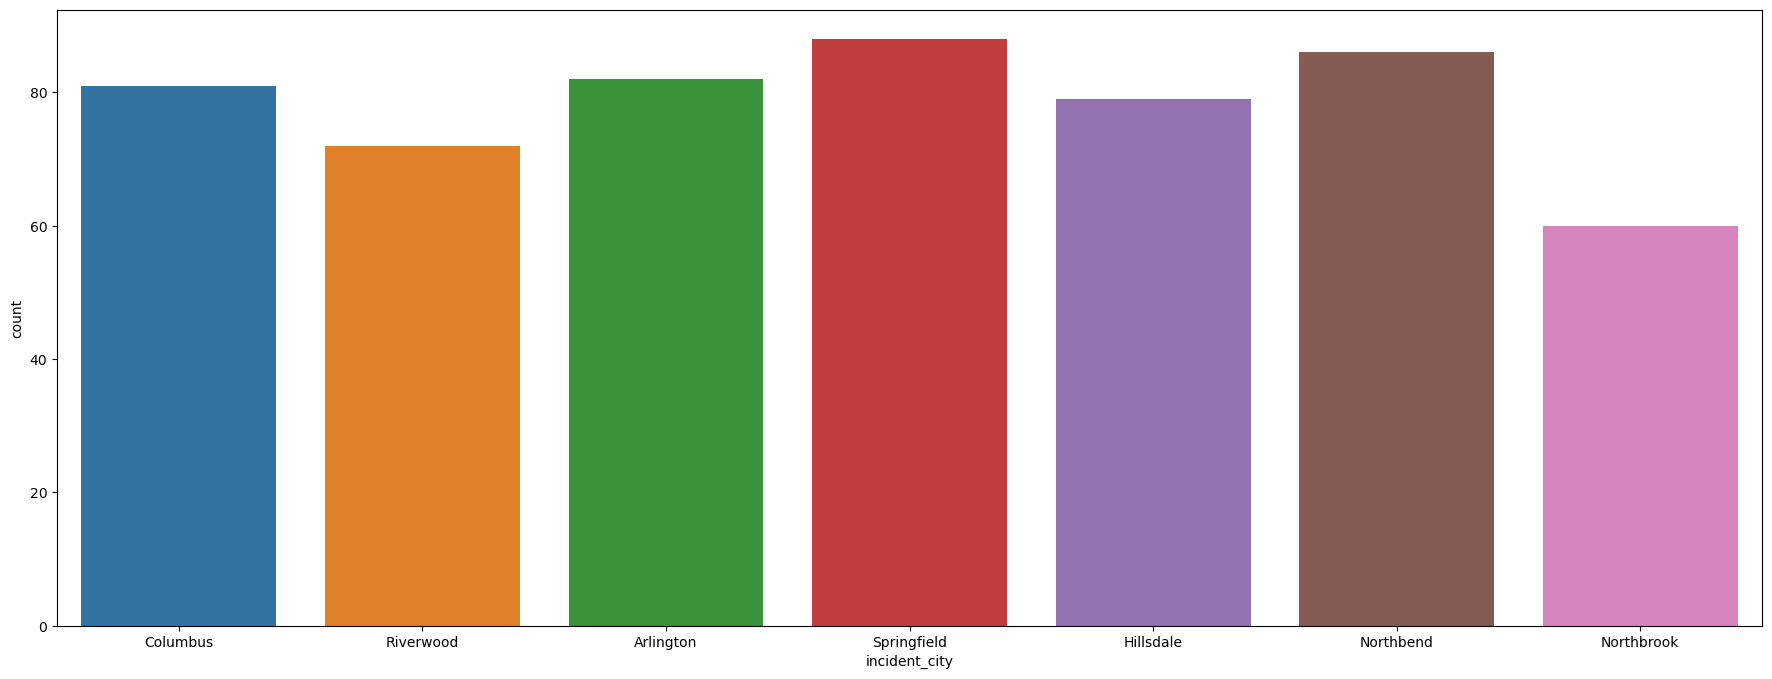

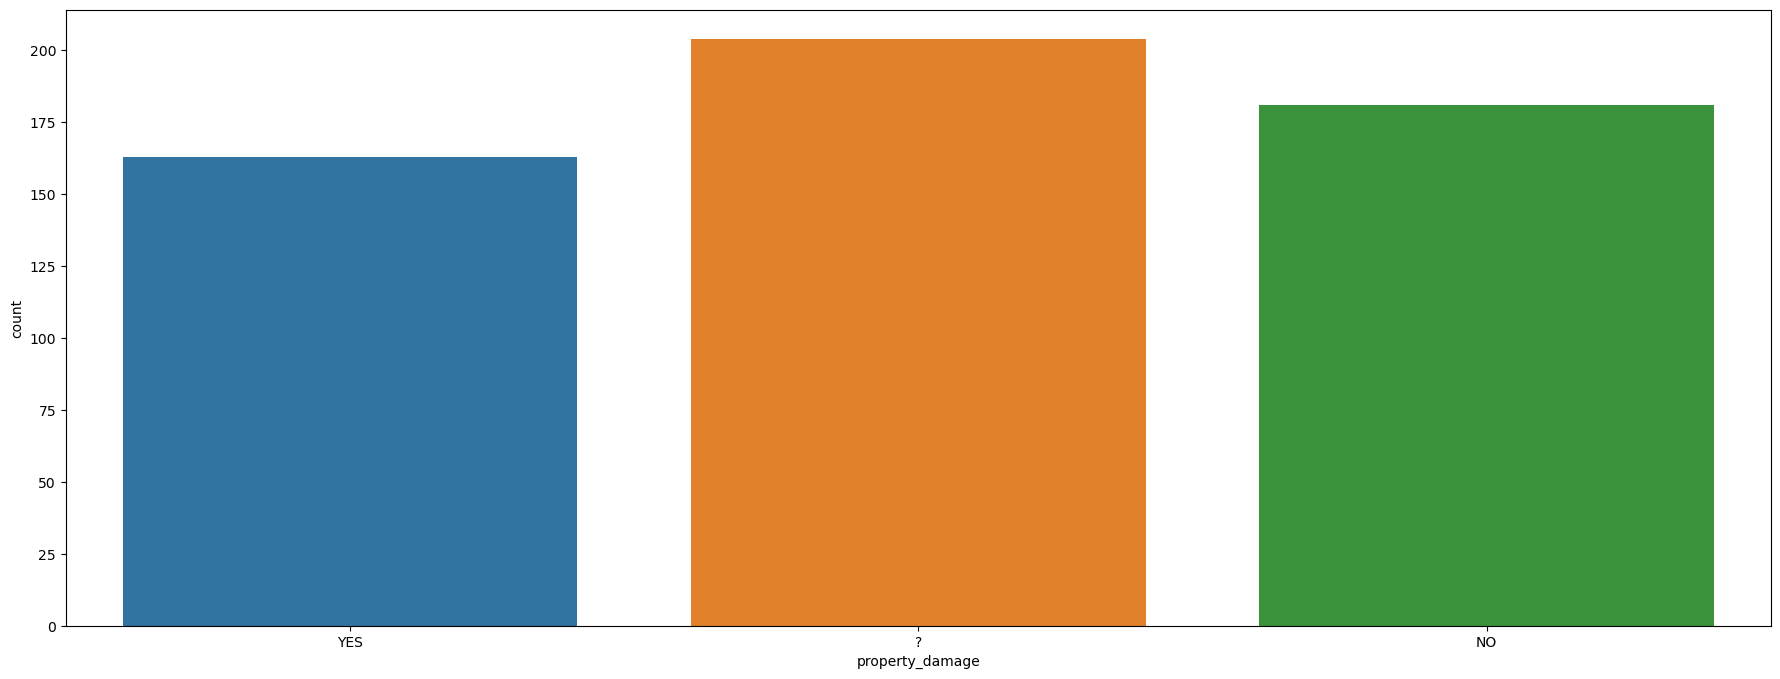

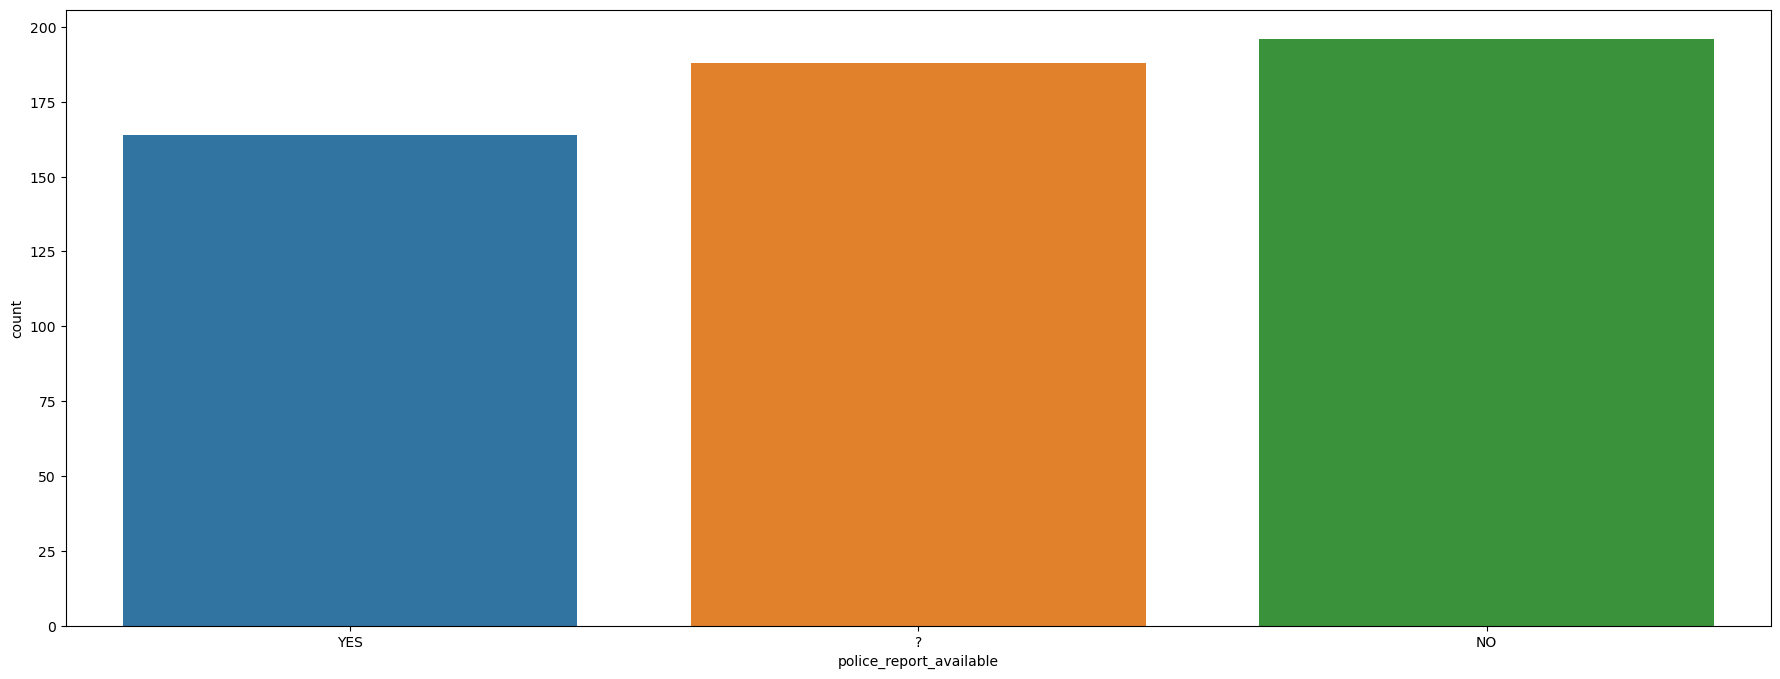

In [59]:
column=['policy_state','insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship','incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city',
       'property_damage', 'police_report_available']
for col in column:
       plt.figure(figsize=(22,8))
       sns.countplot(x=col, data=df)
       

#### Target / Variables

In [60]:
positive_df = df[df['fraud_reported'] == 1]
negative_df = df[df['fraud_reported'] == 0]

In [61]:
positive_df.shape

(141, 39)

In [62]:
negative_df.shape

(407, 39)

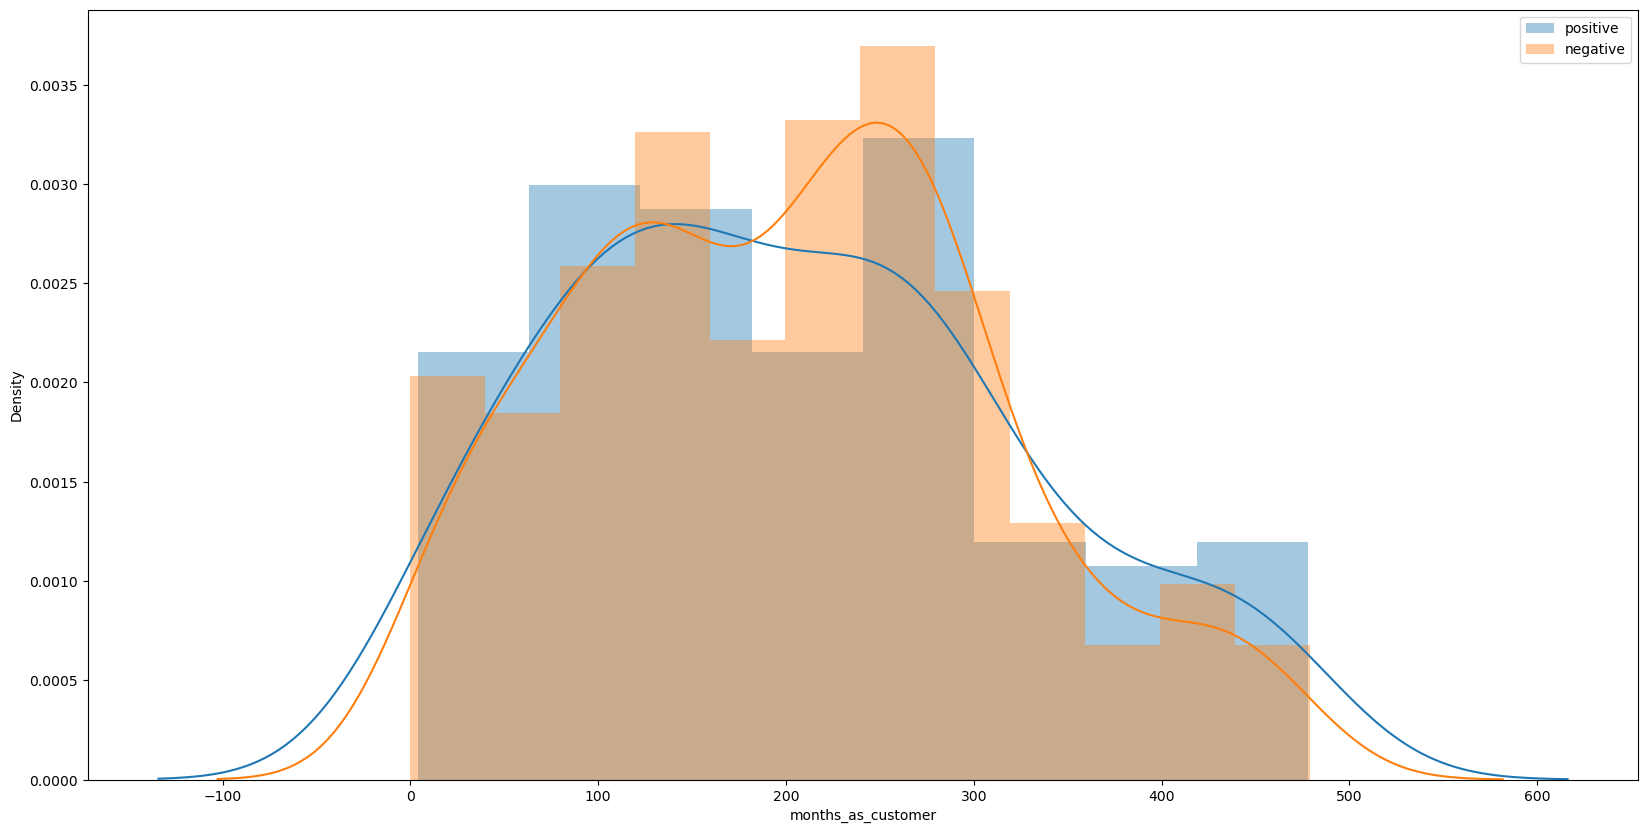

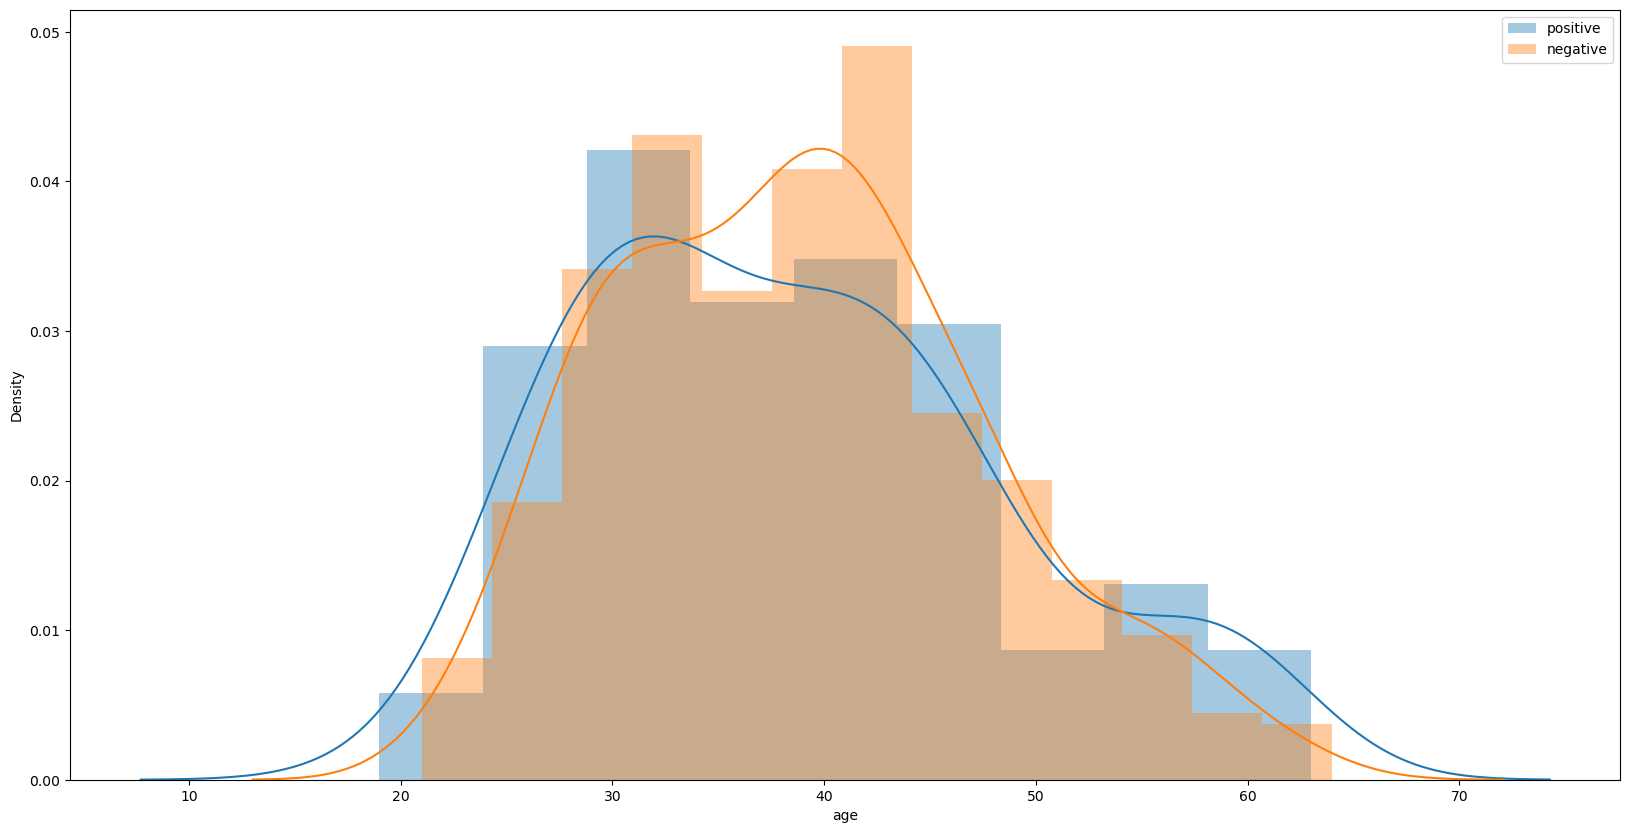

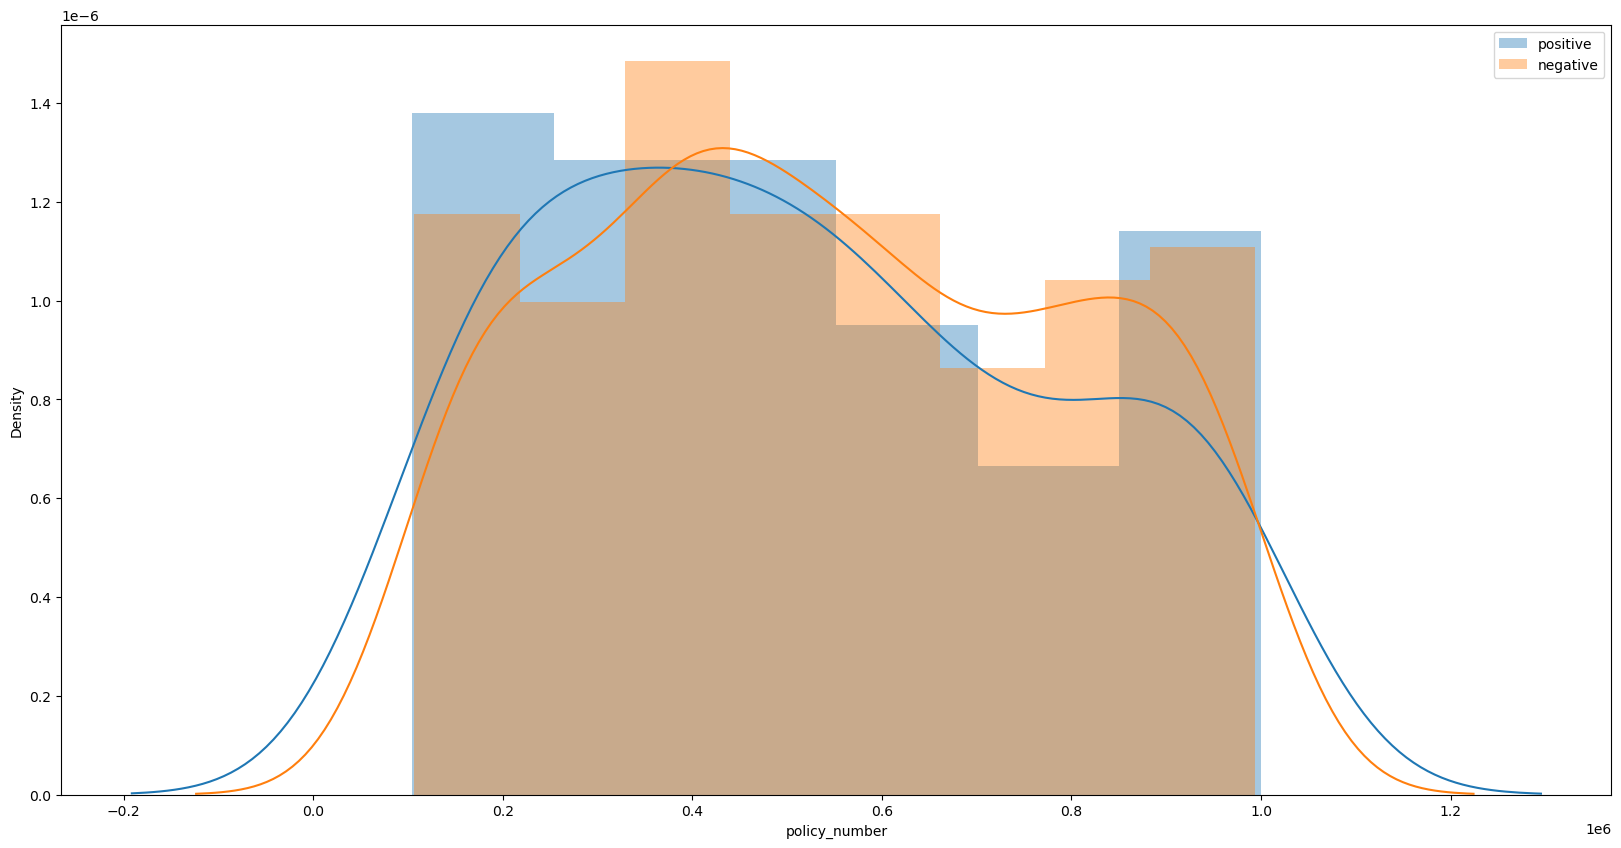

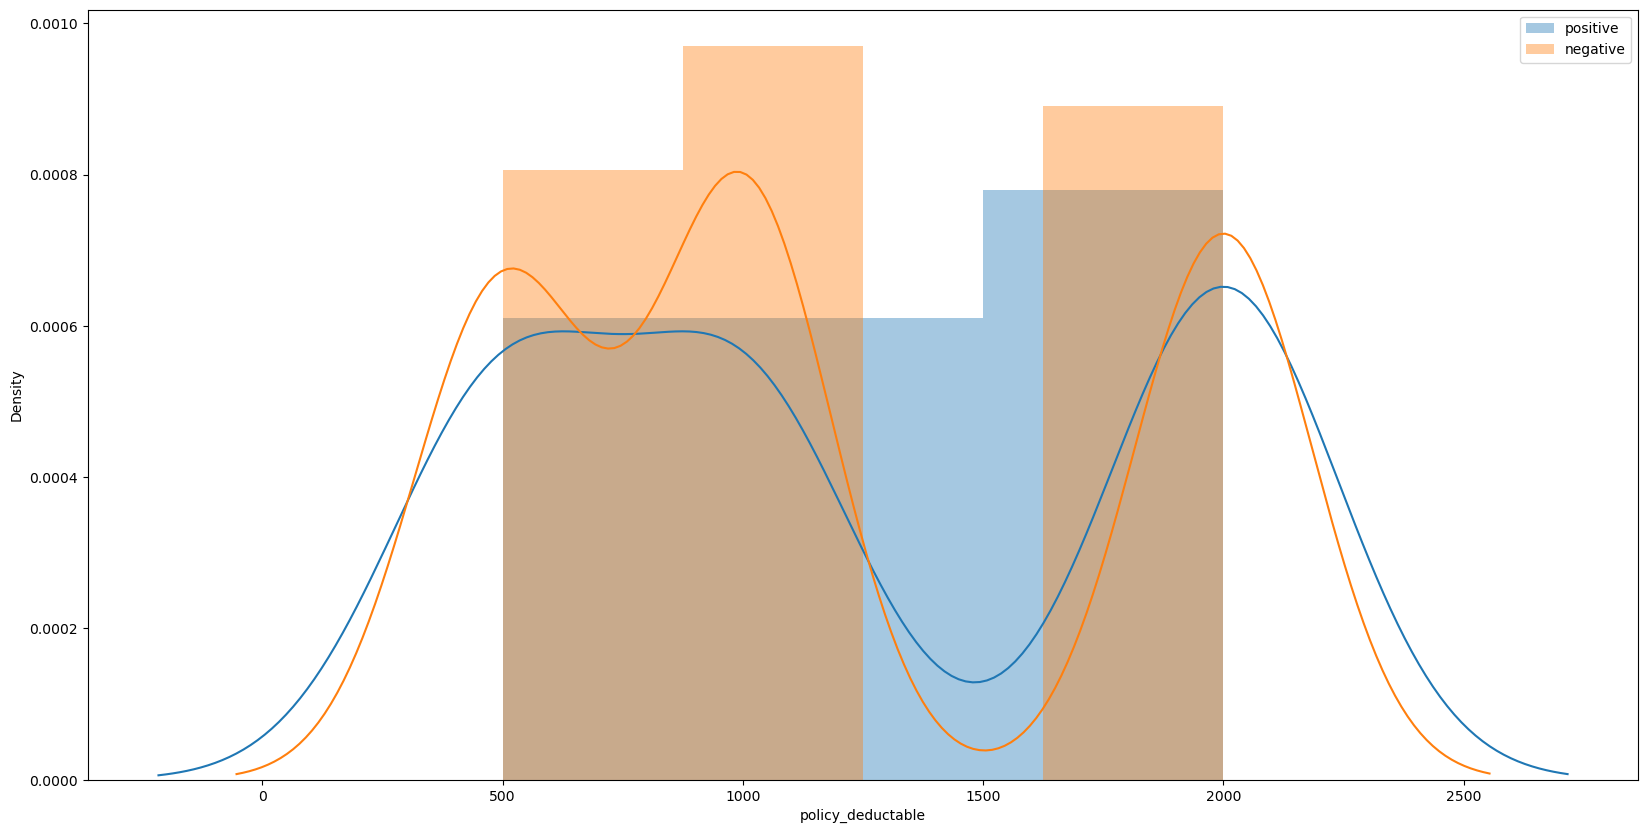

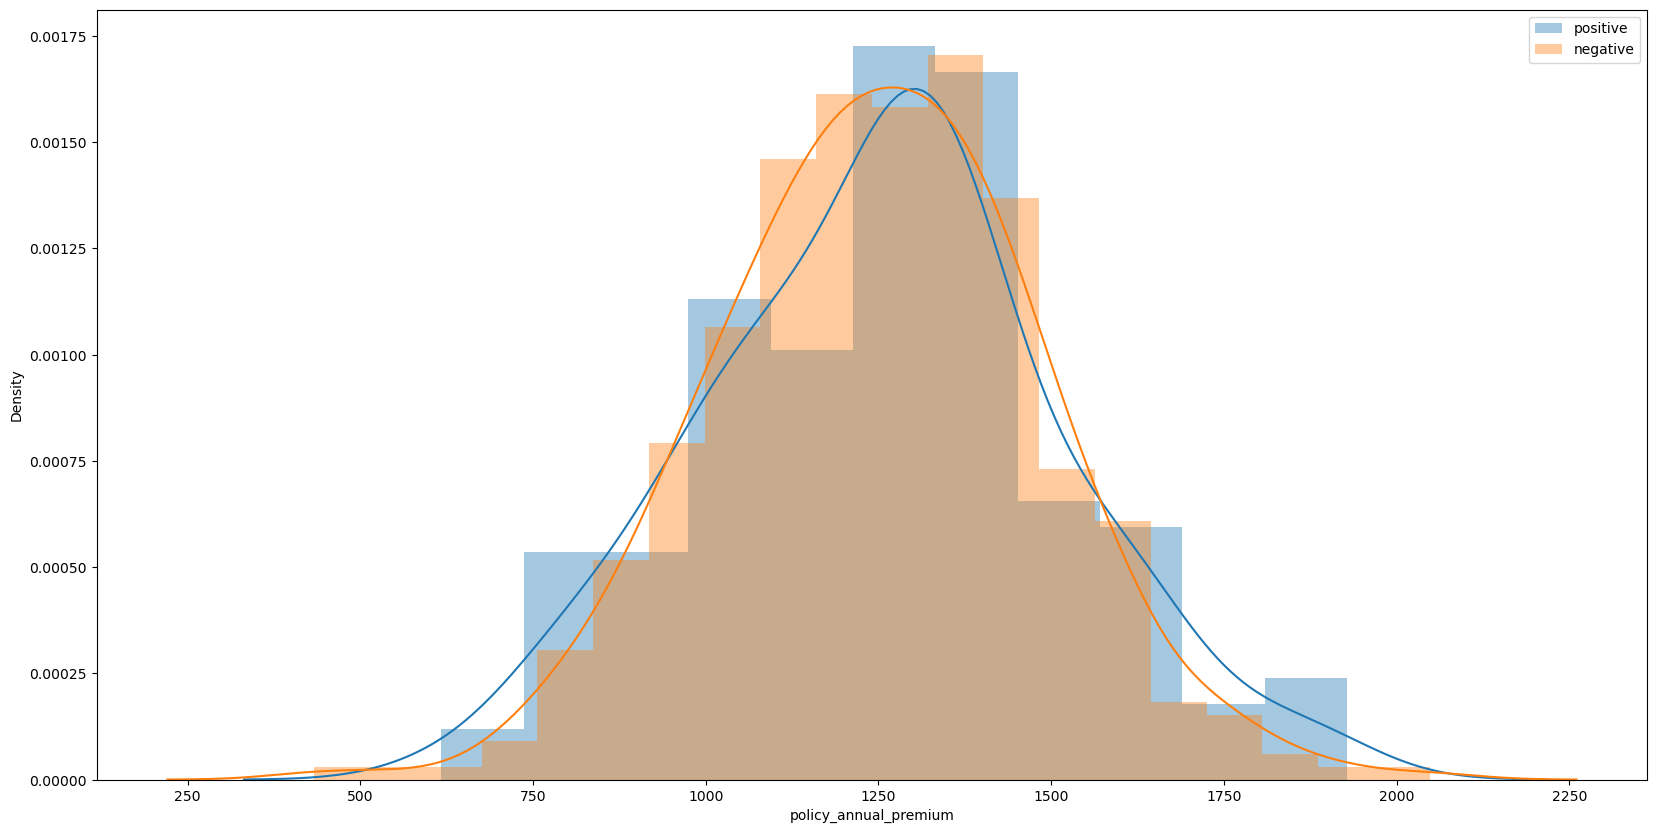

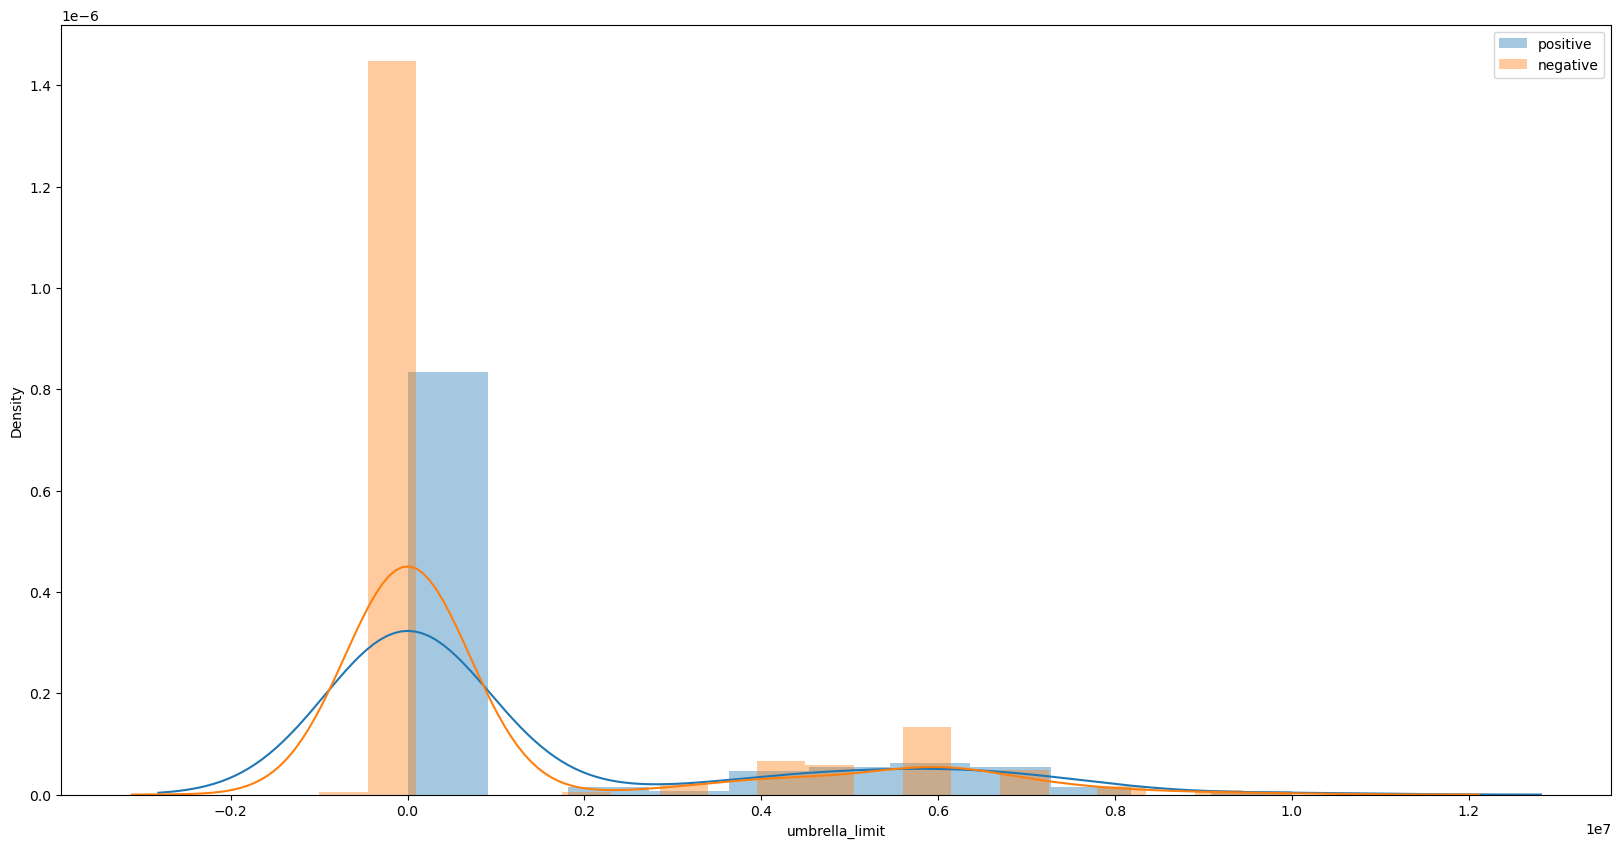

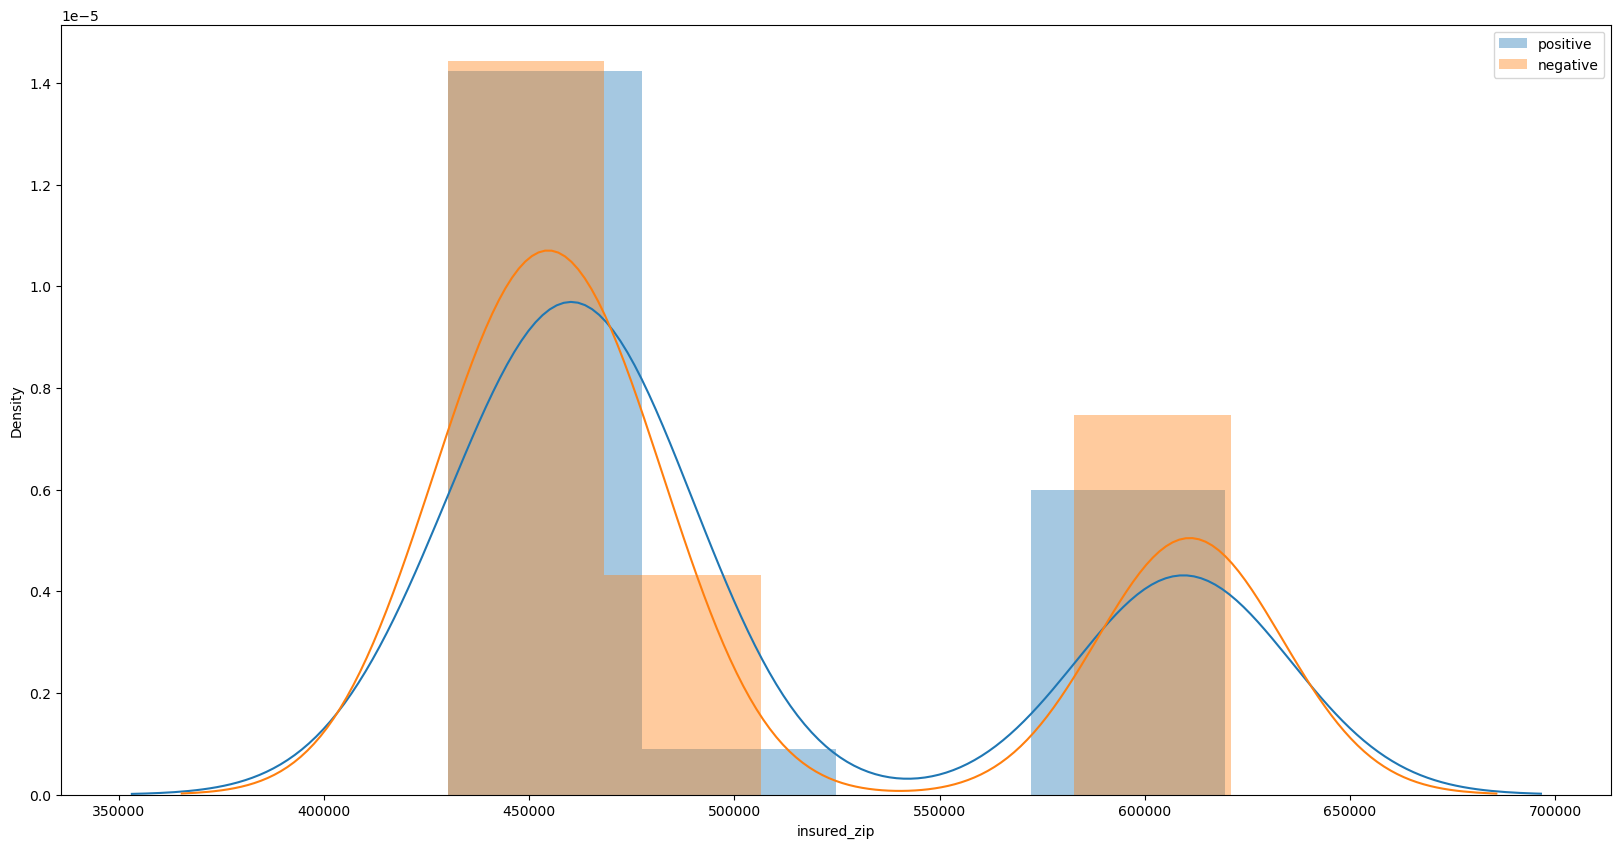

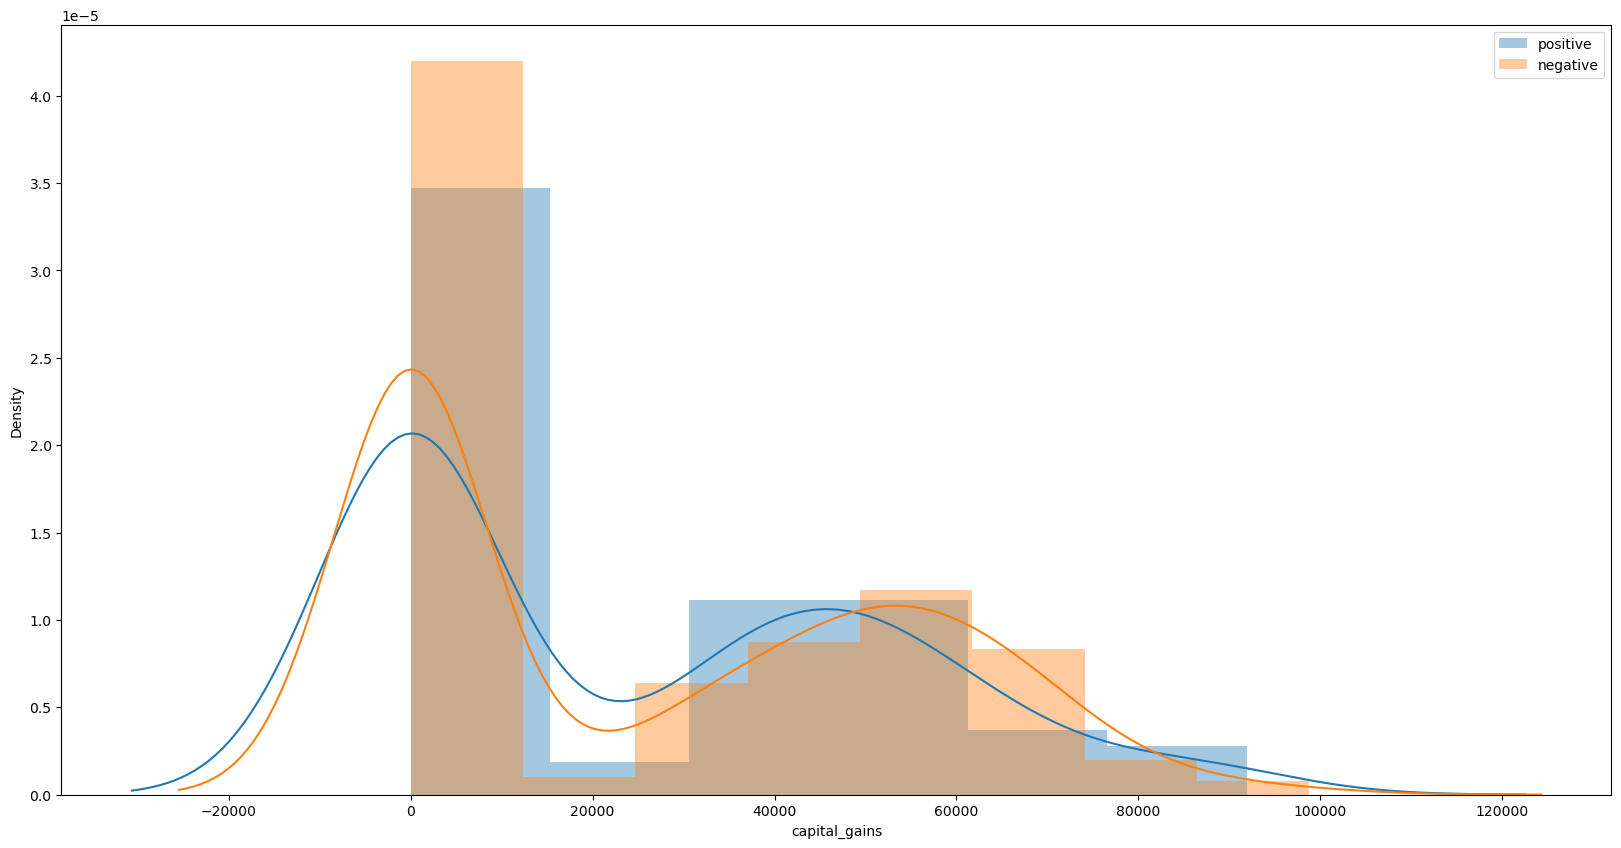

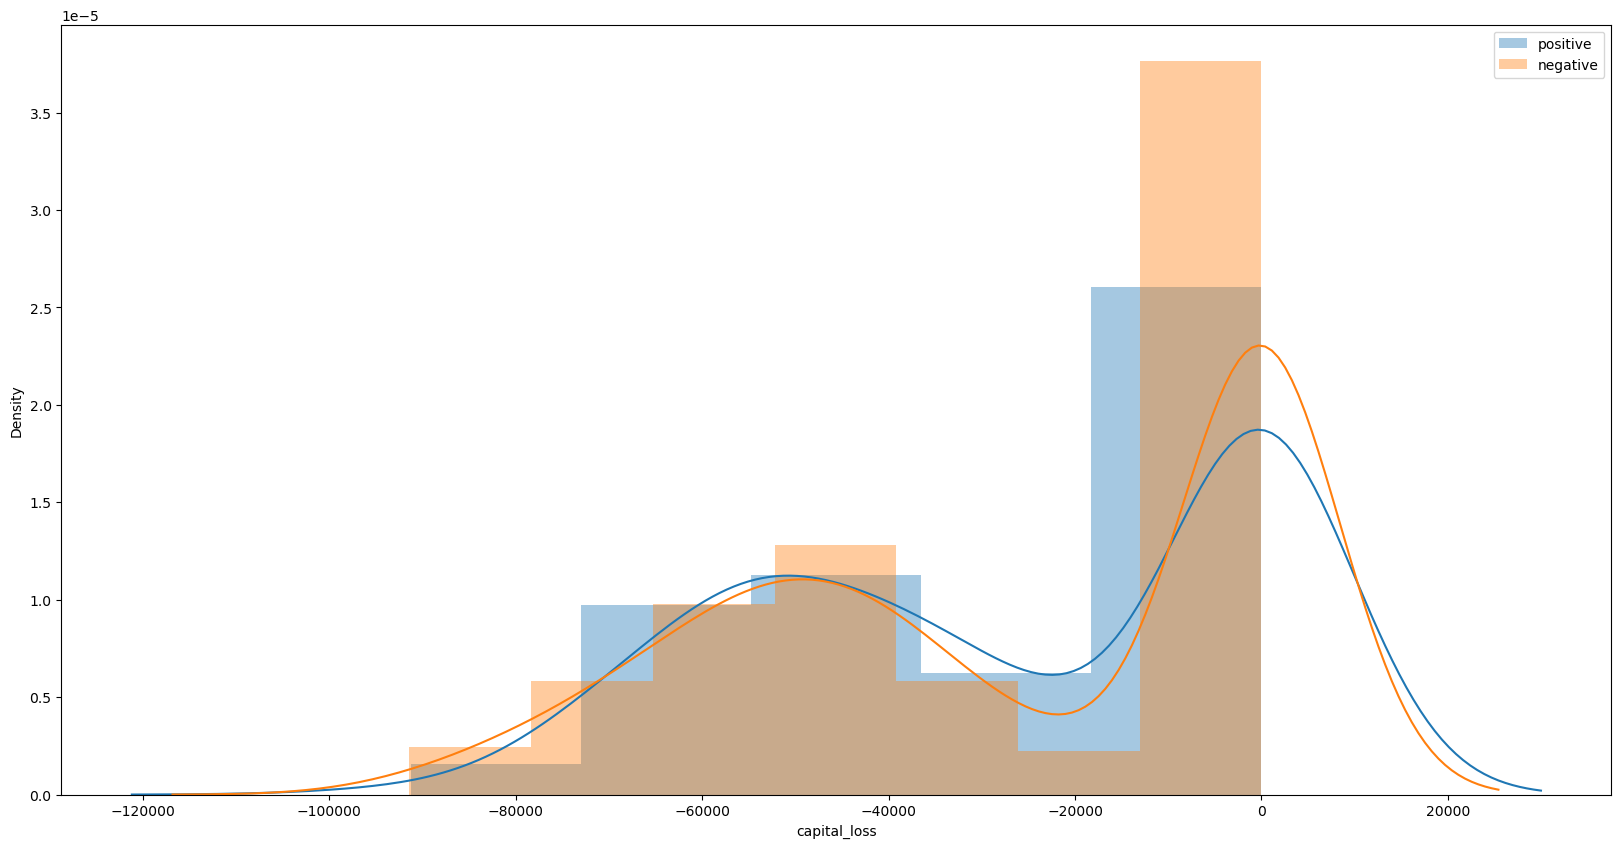

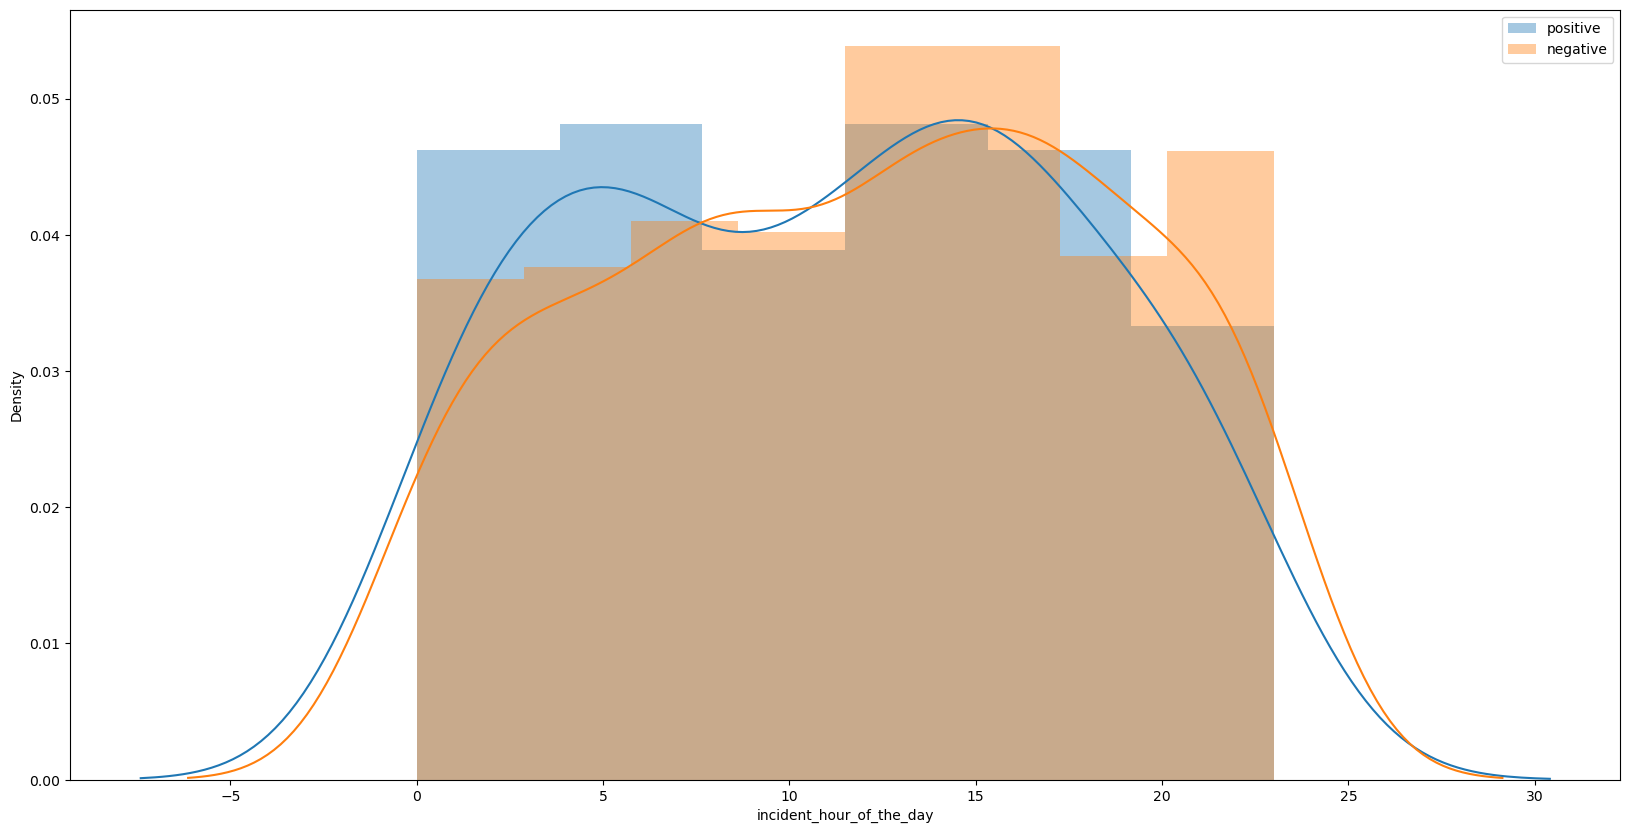

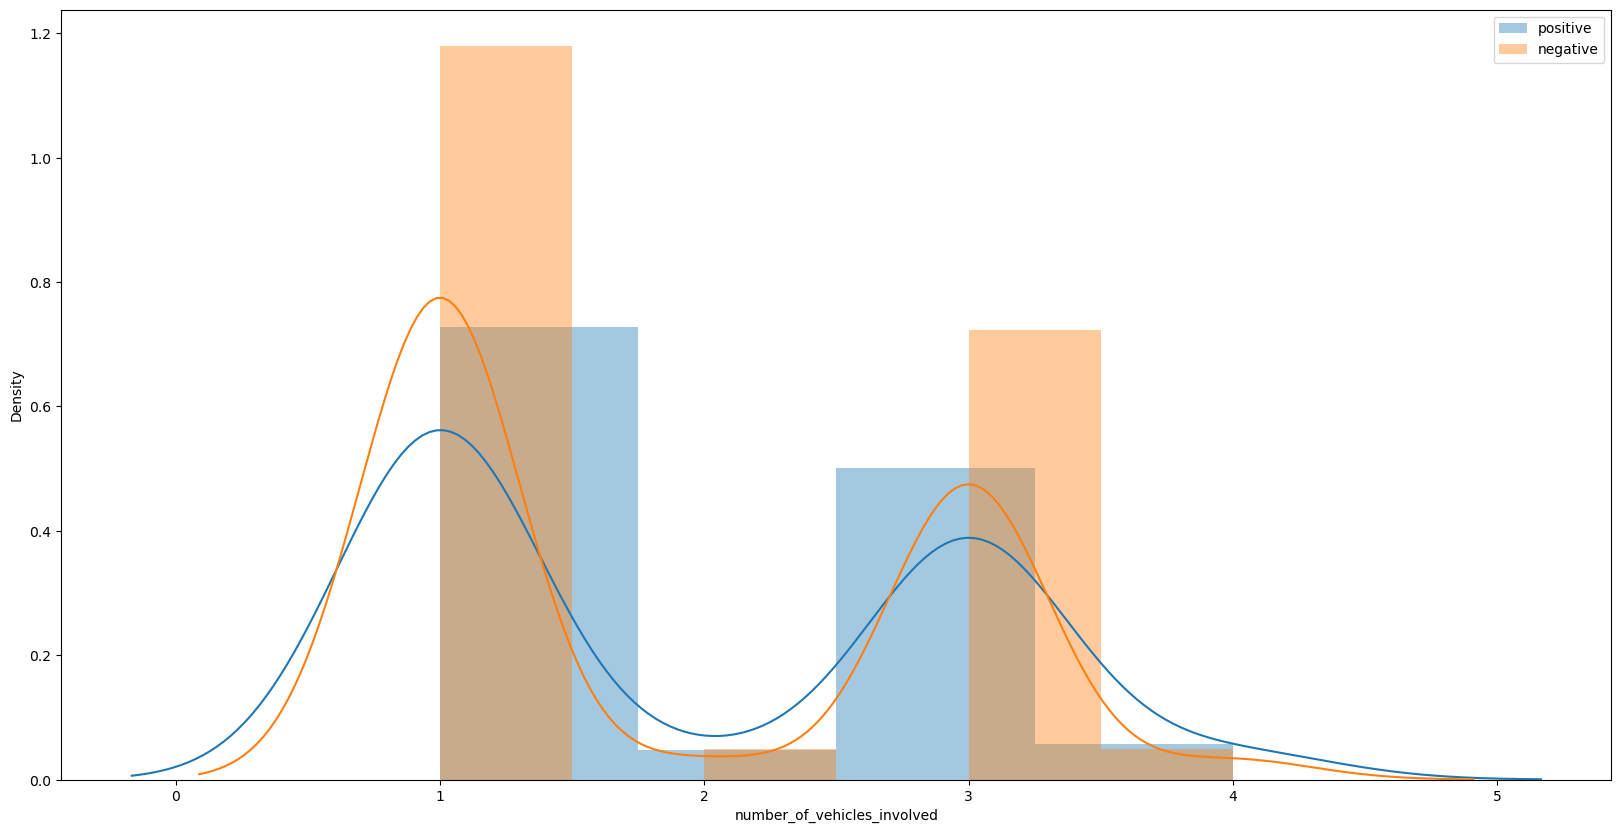

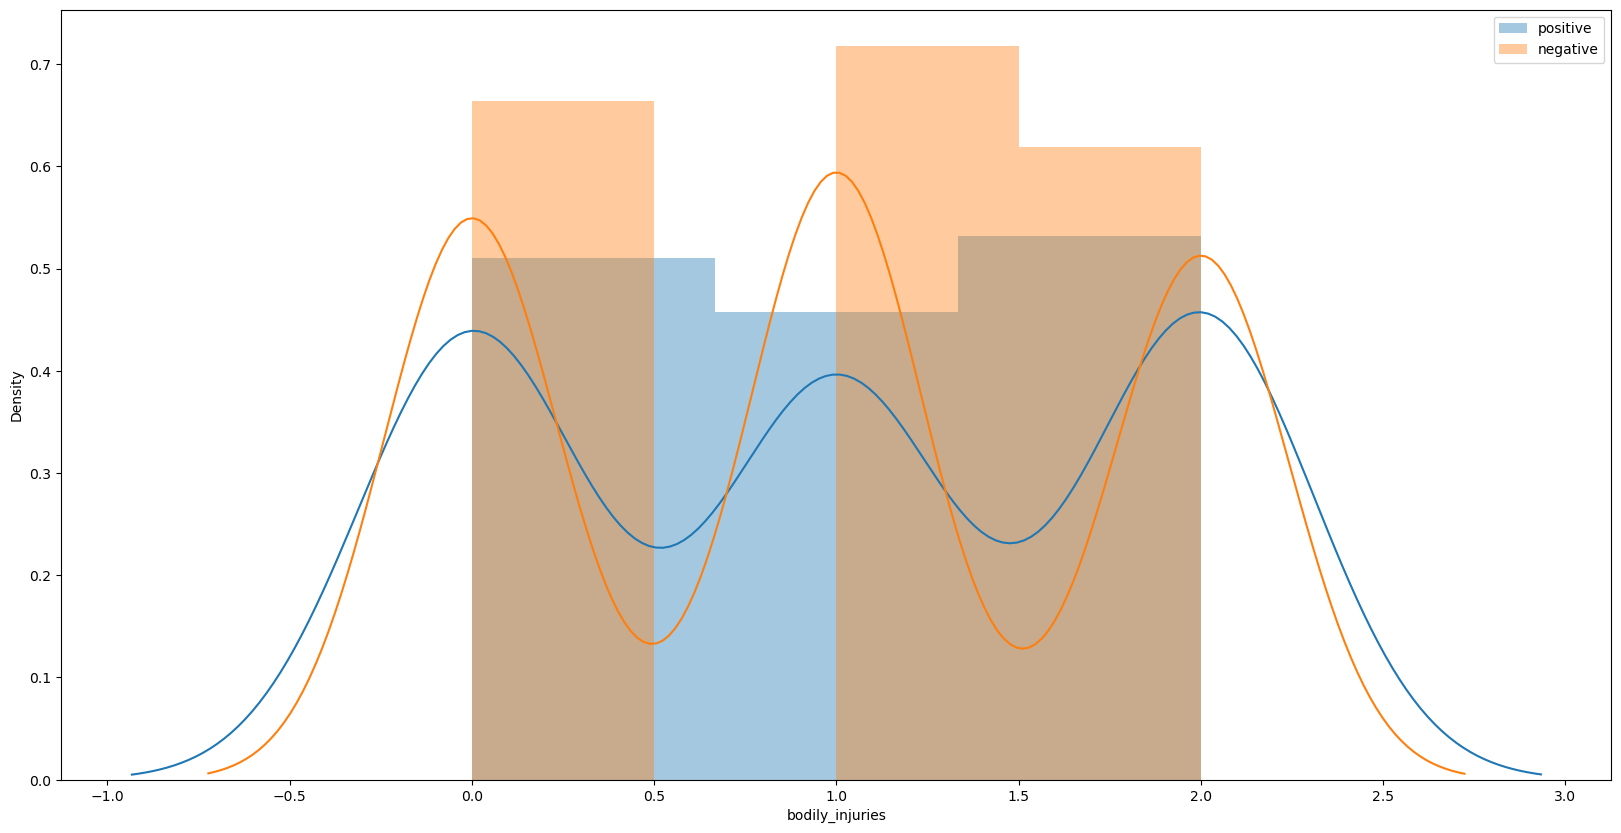

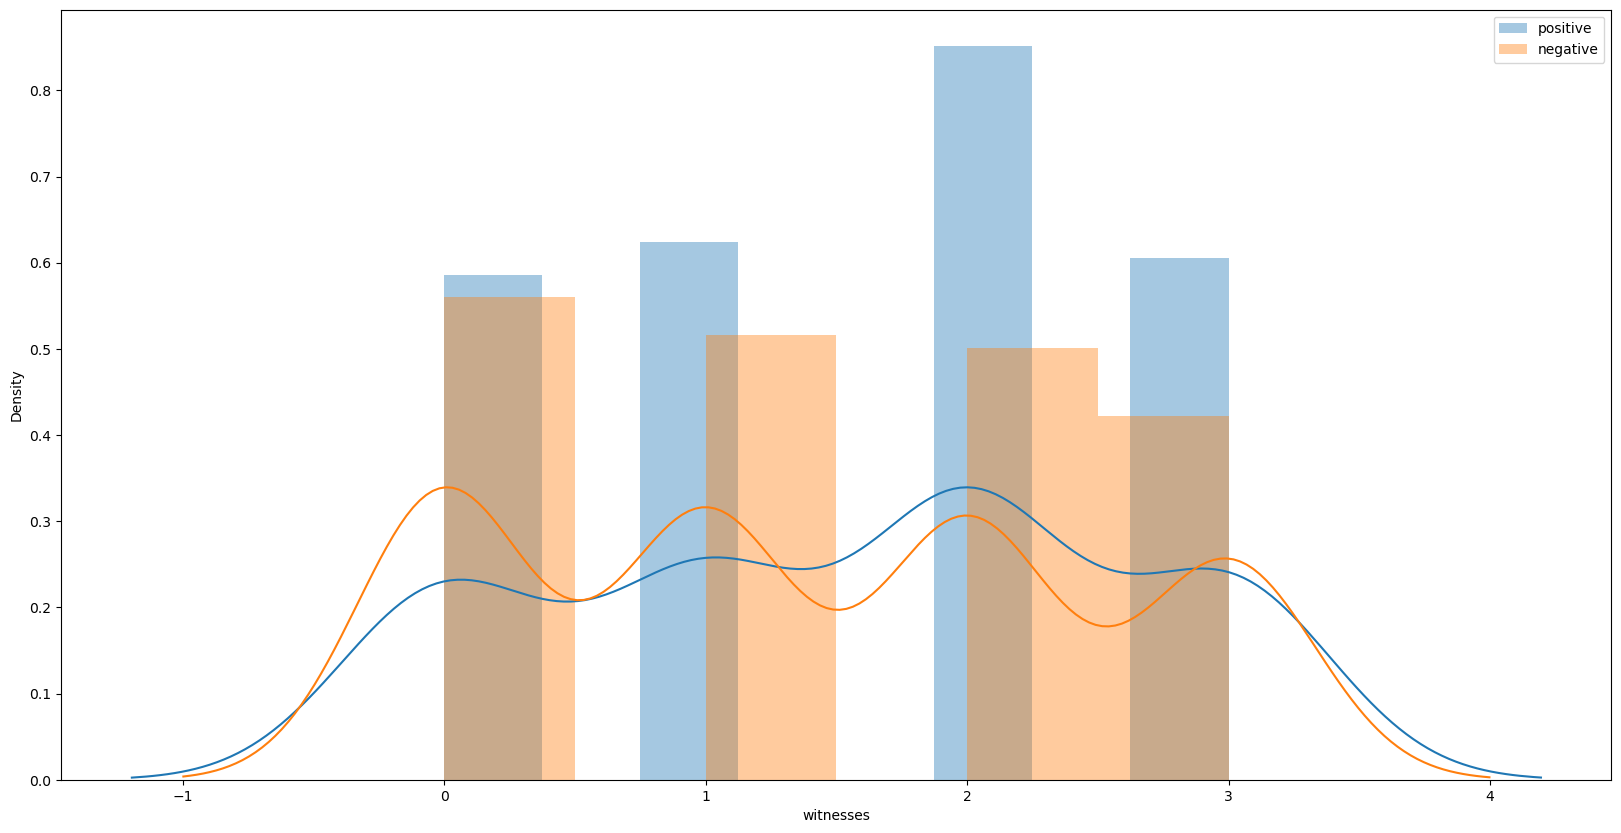

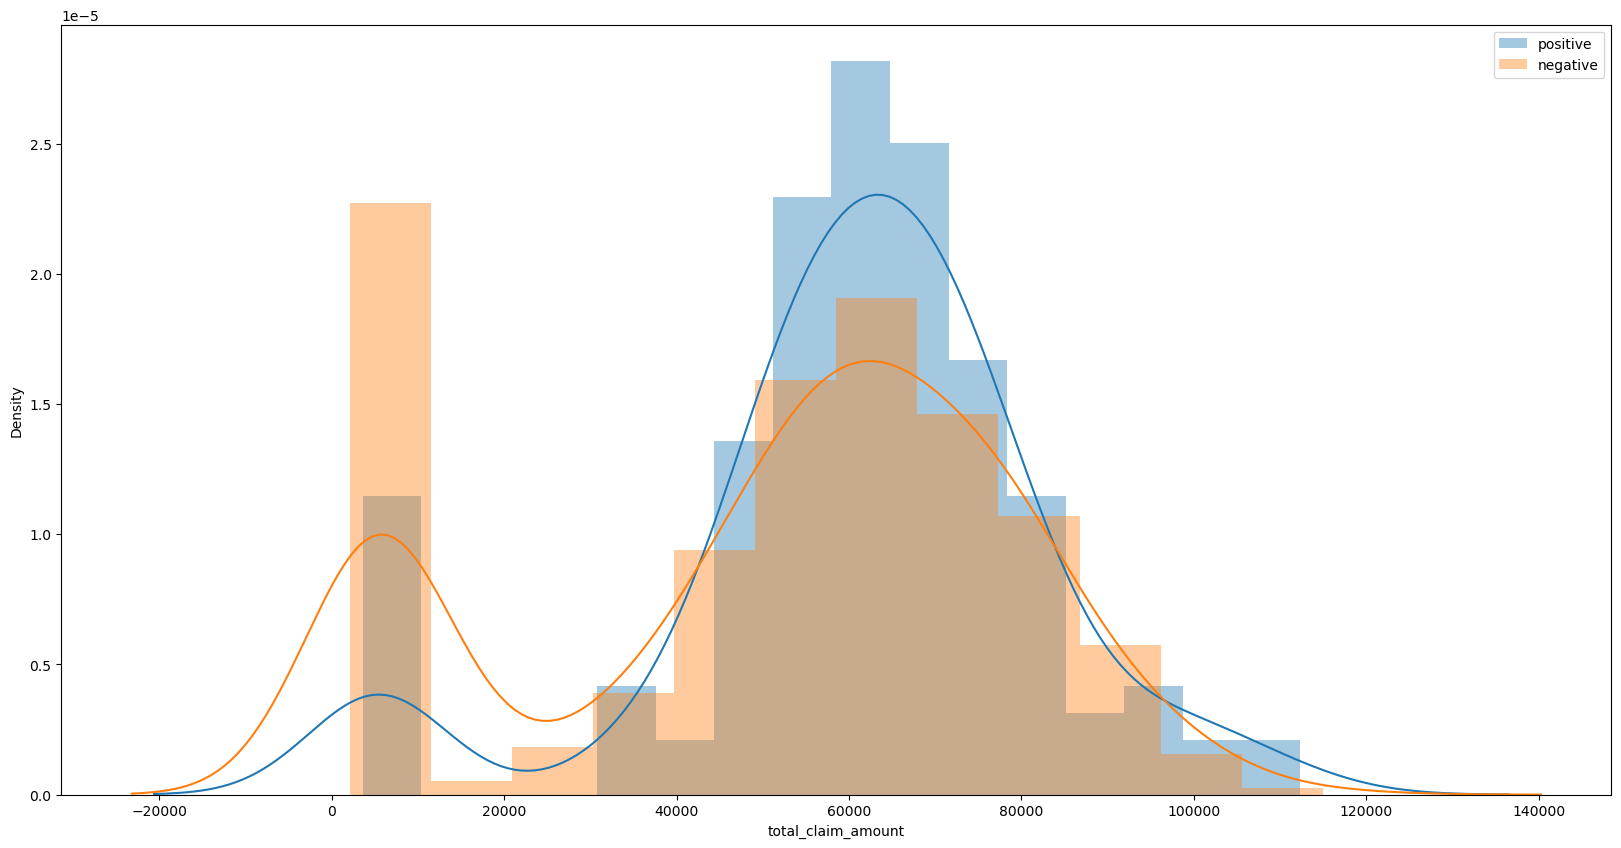

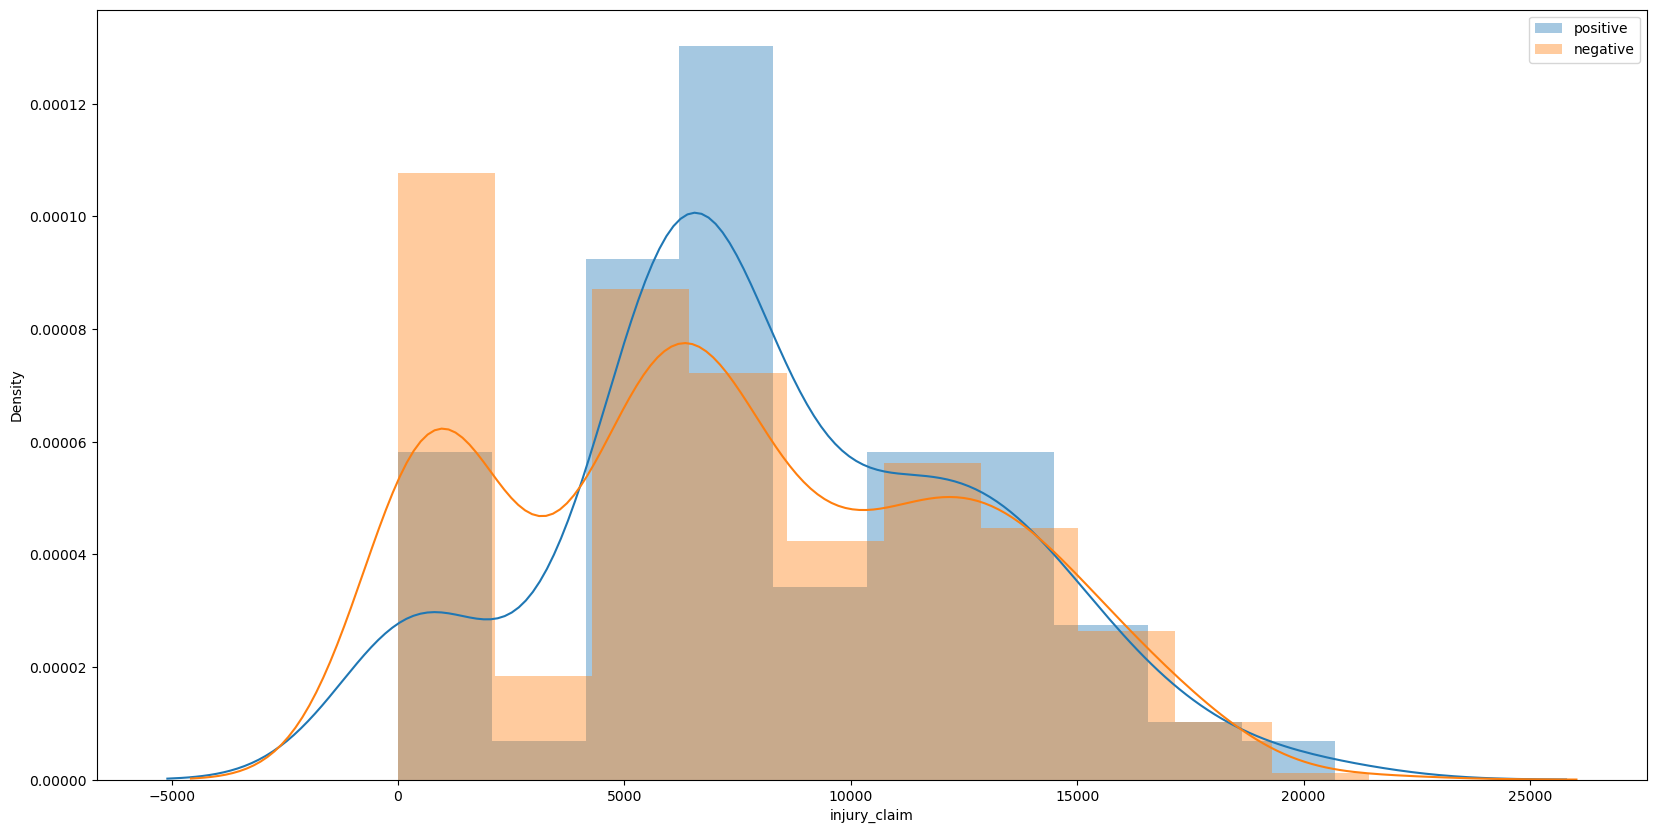

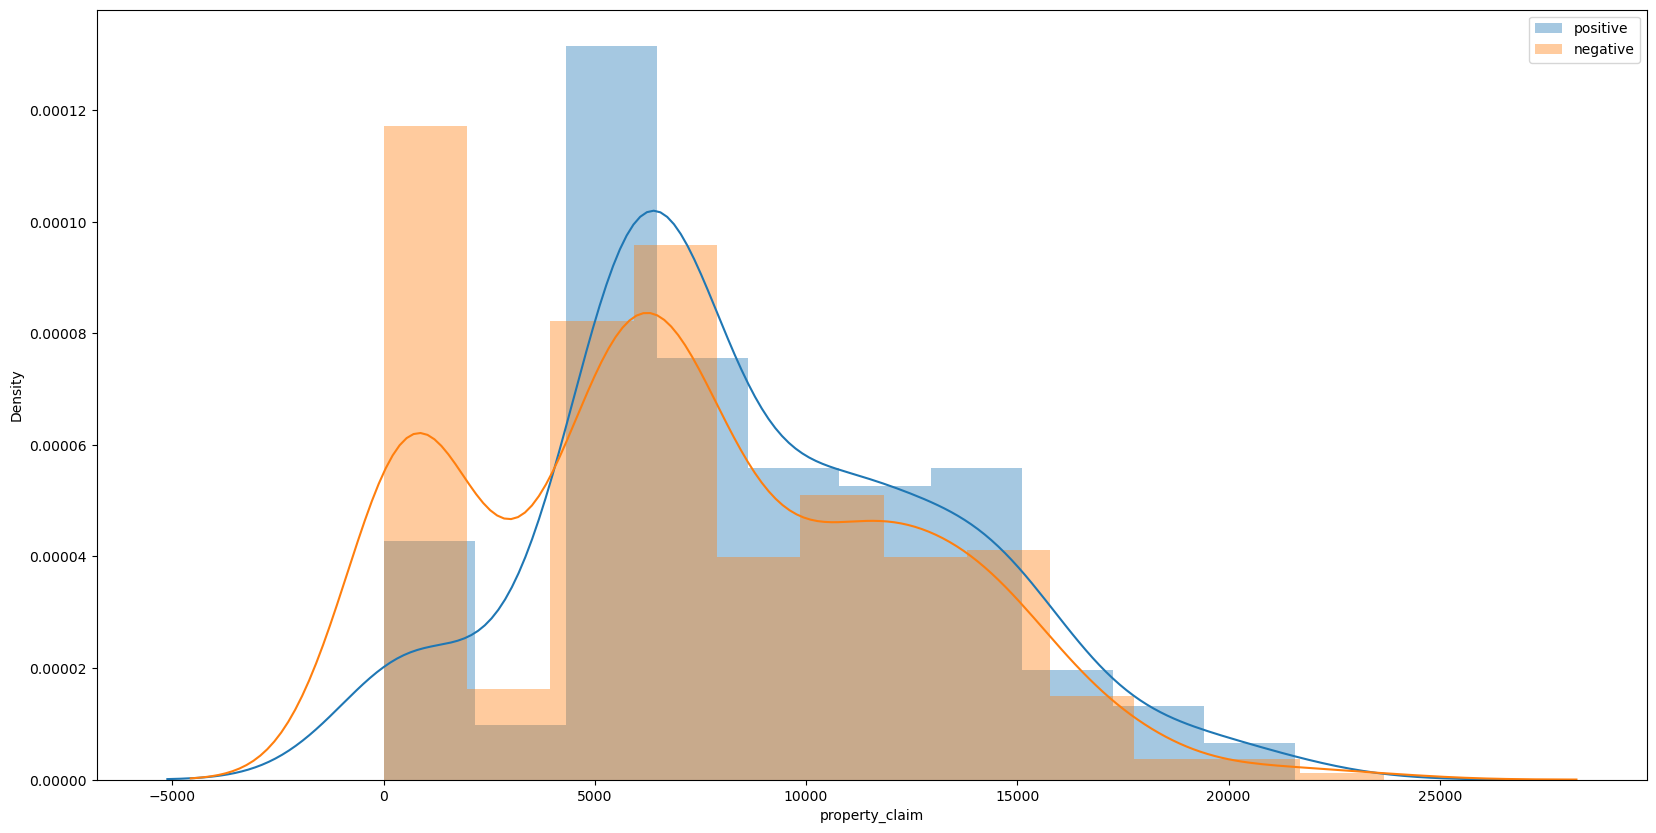

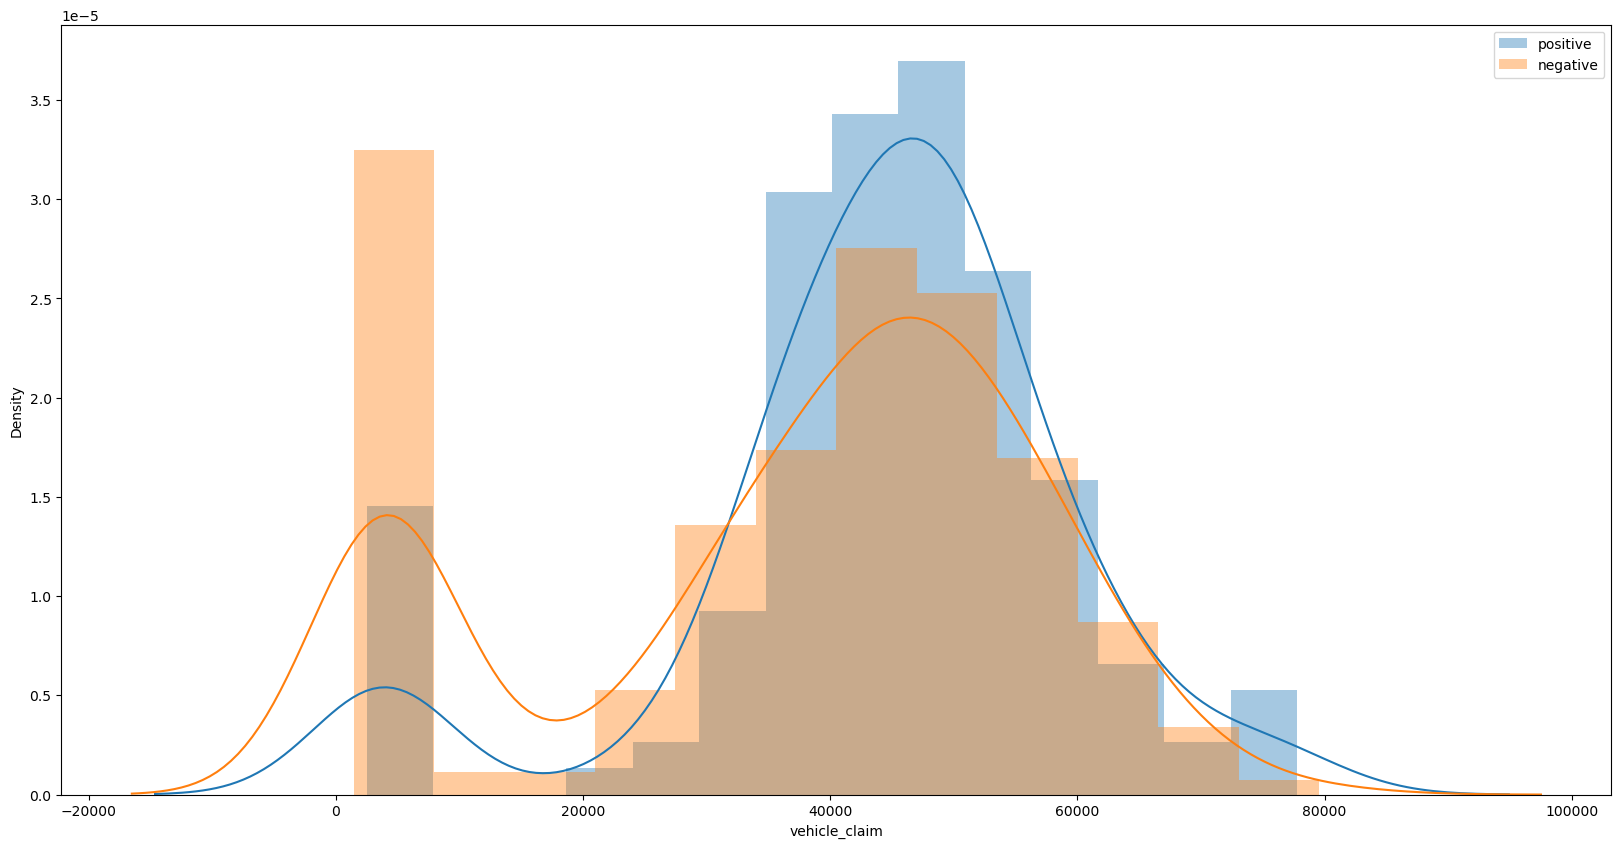

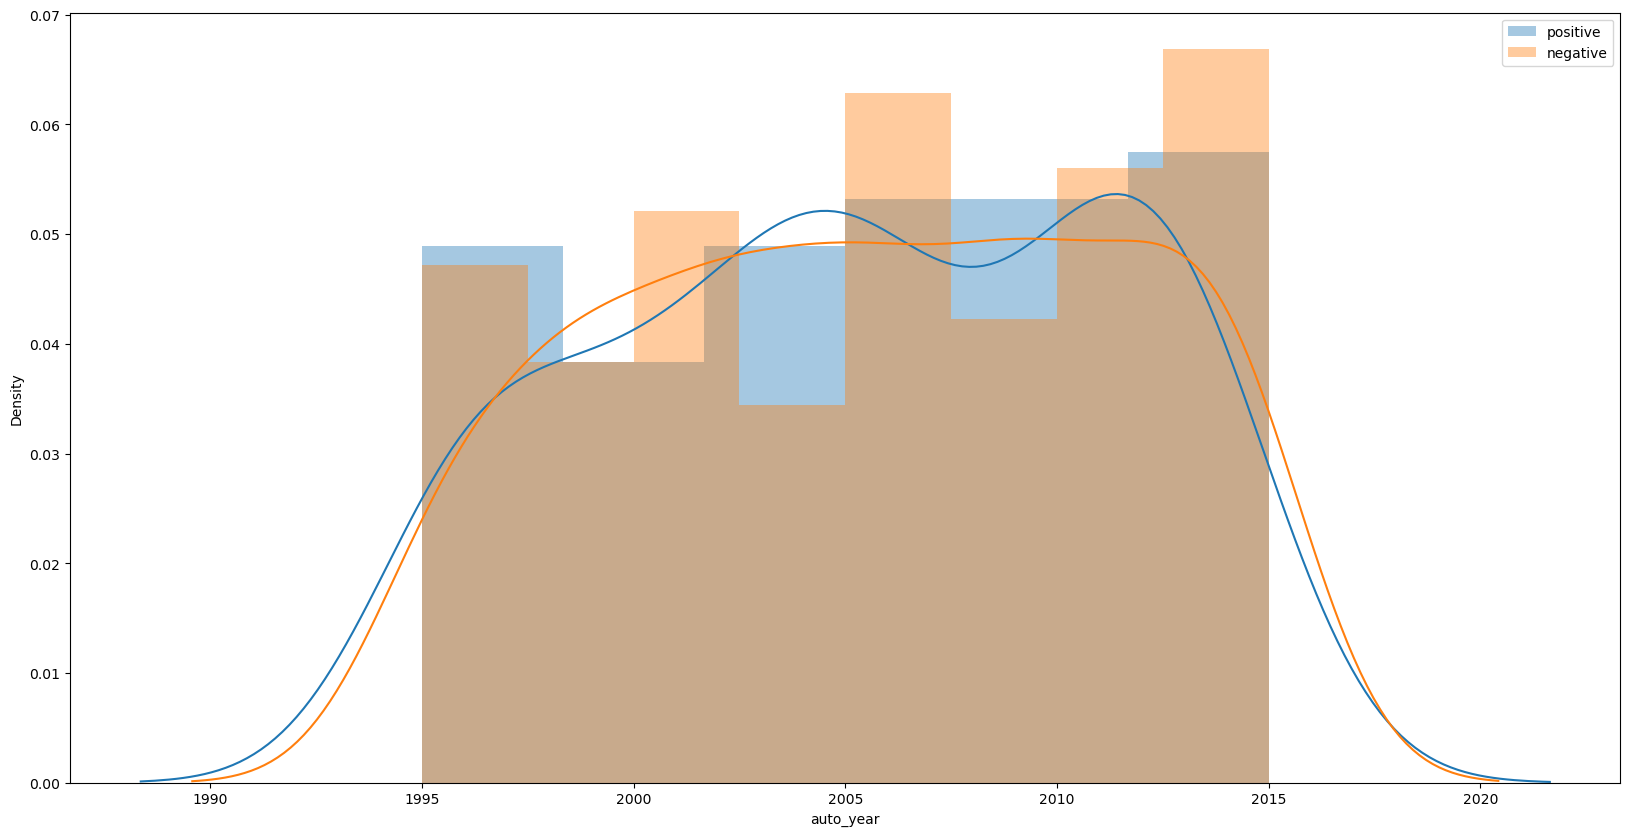

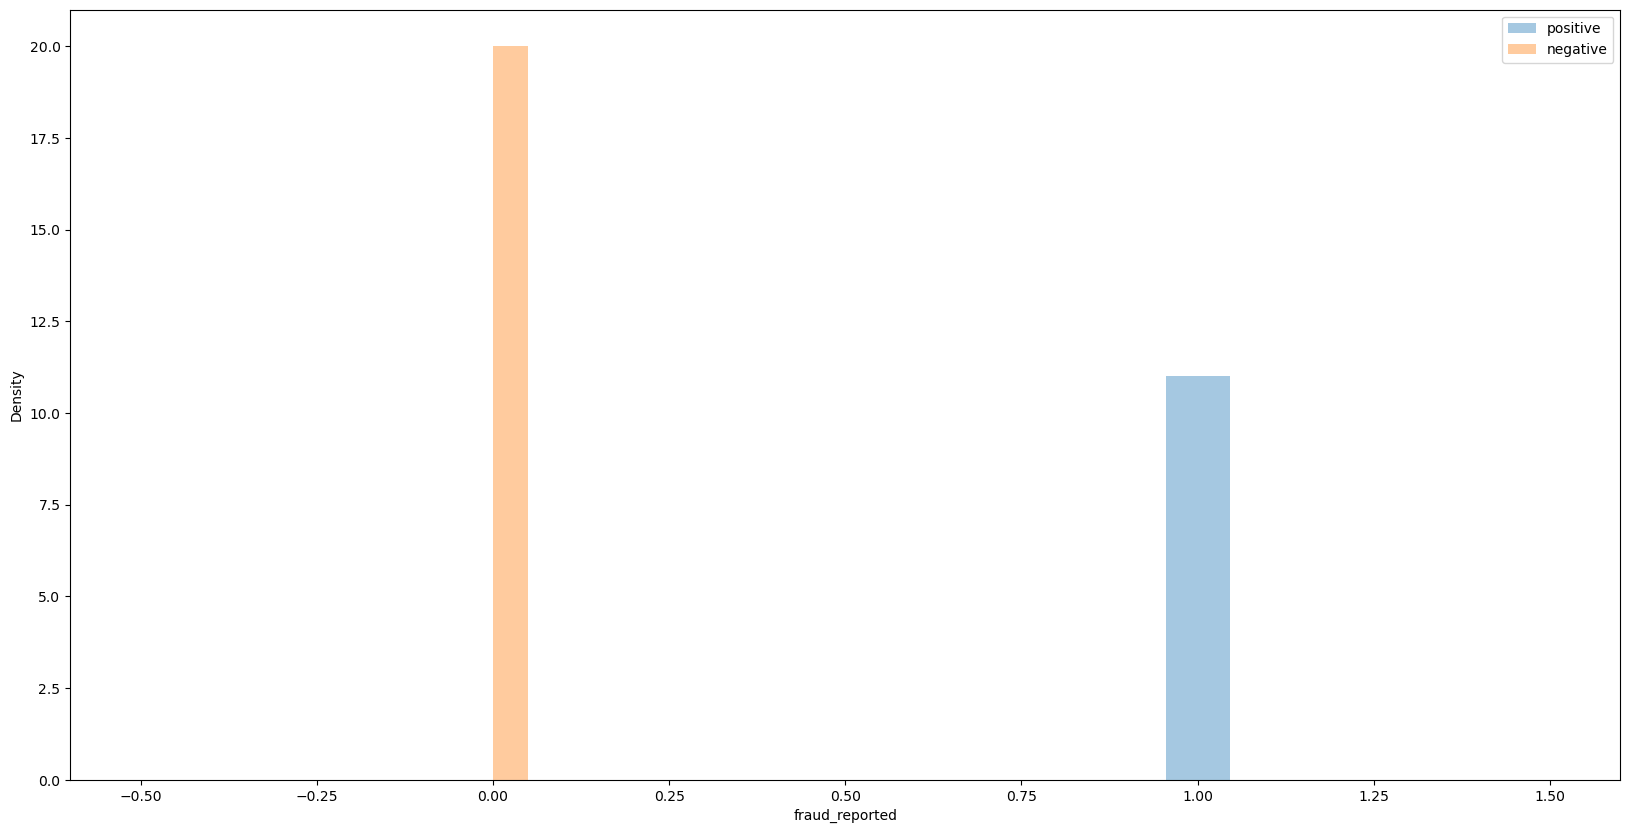

In [63]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

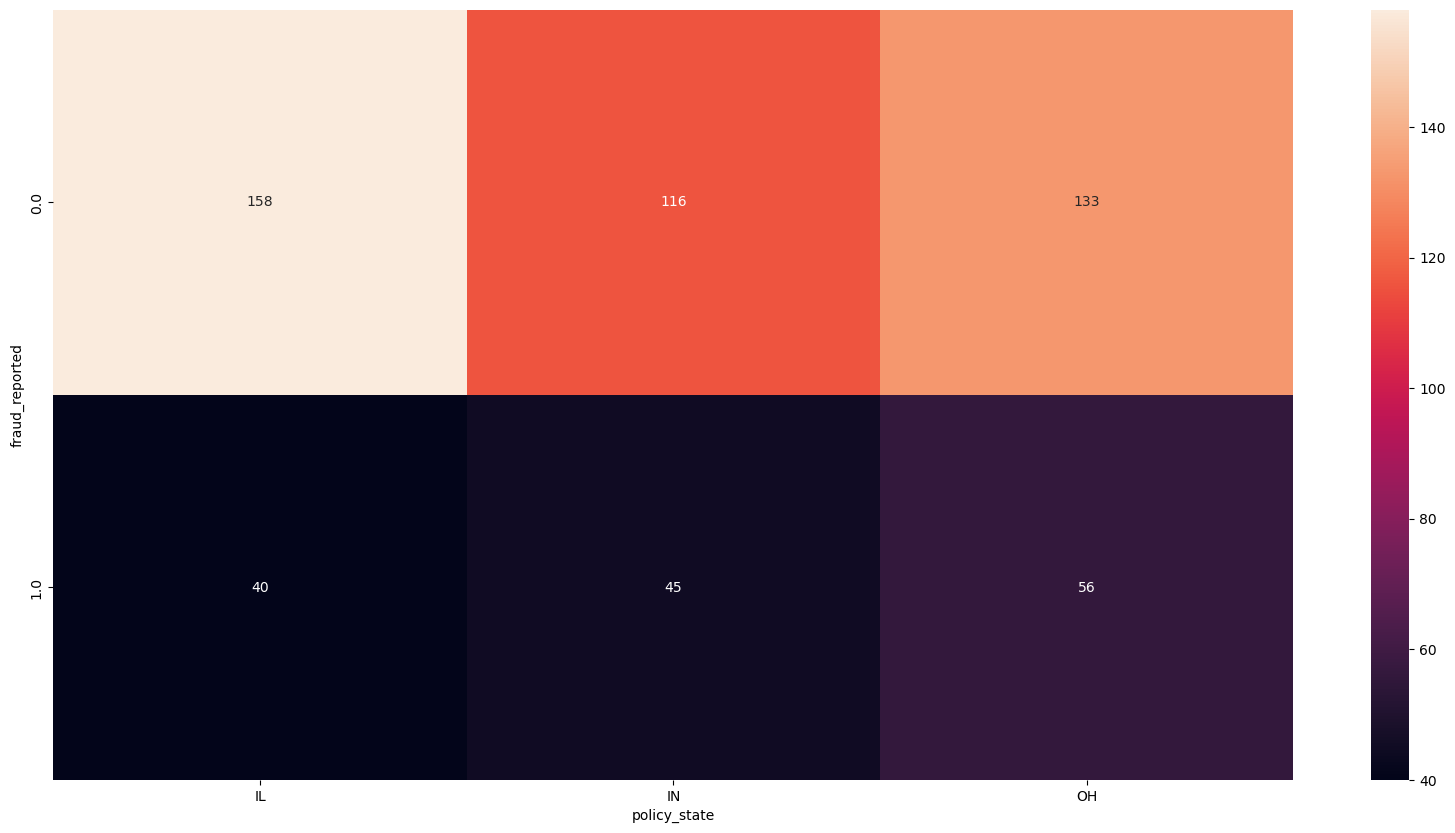

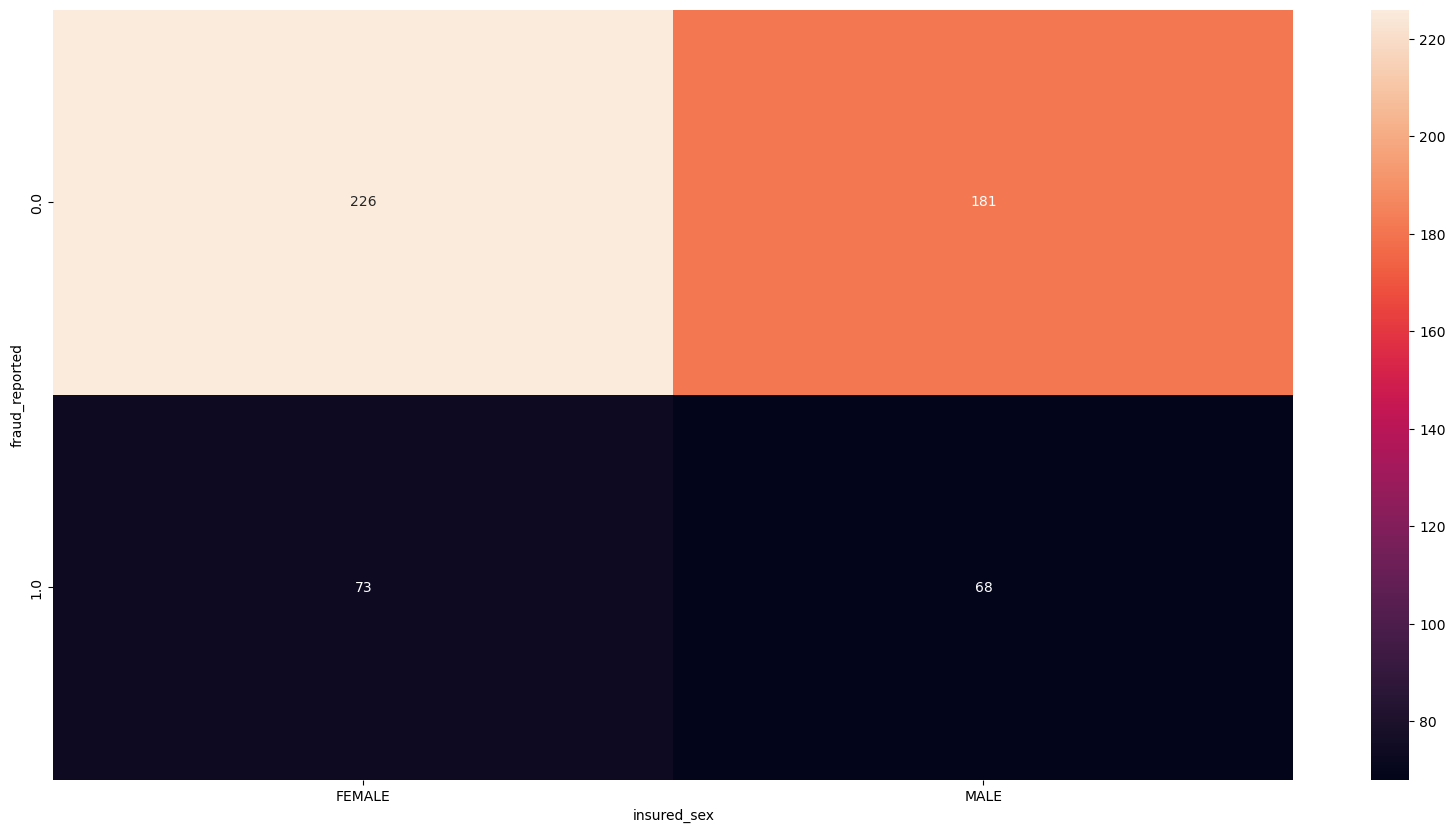

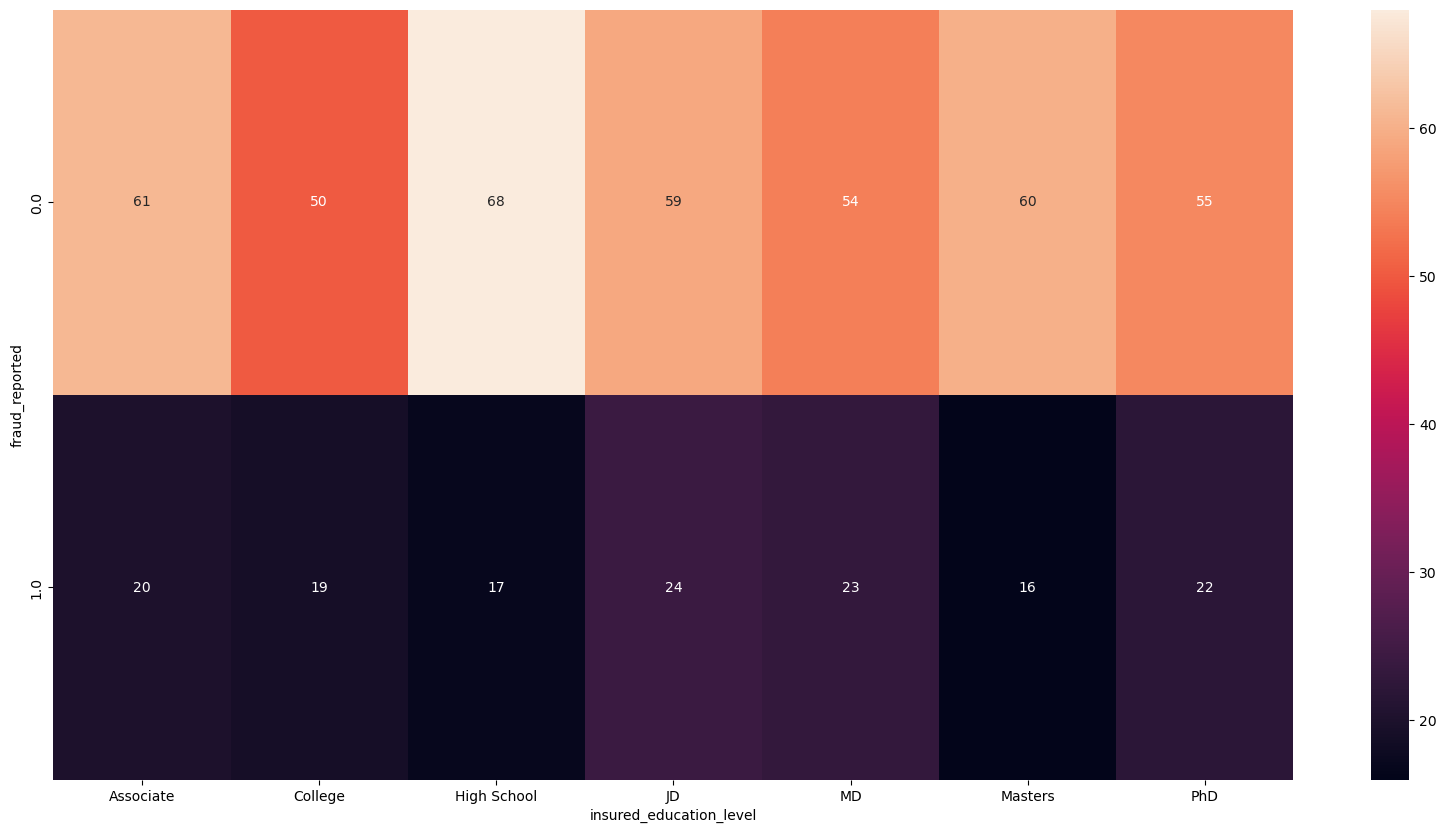

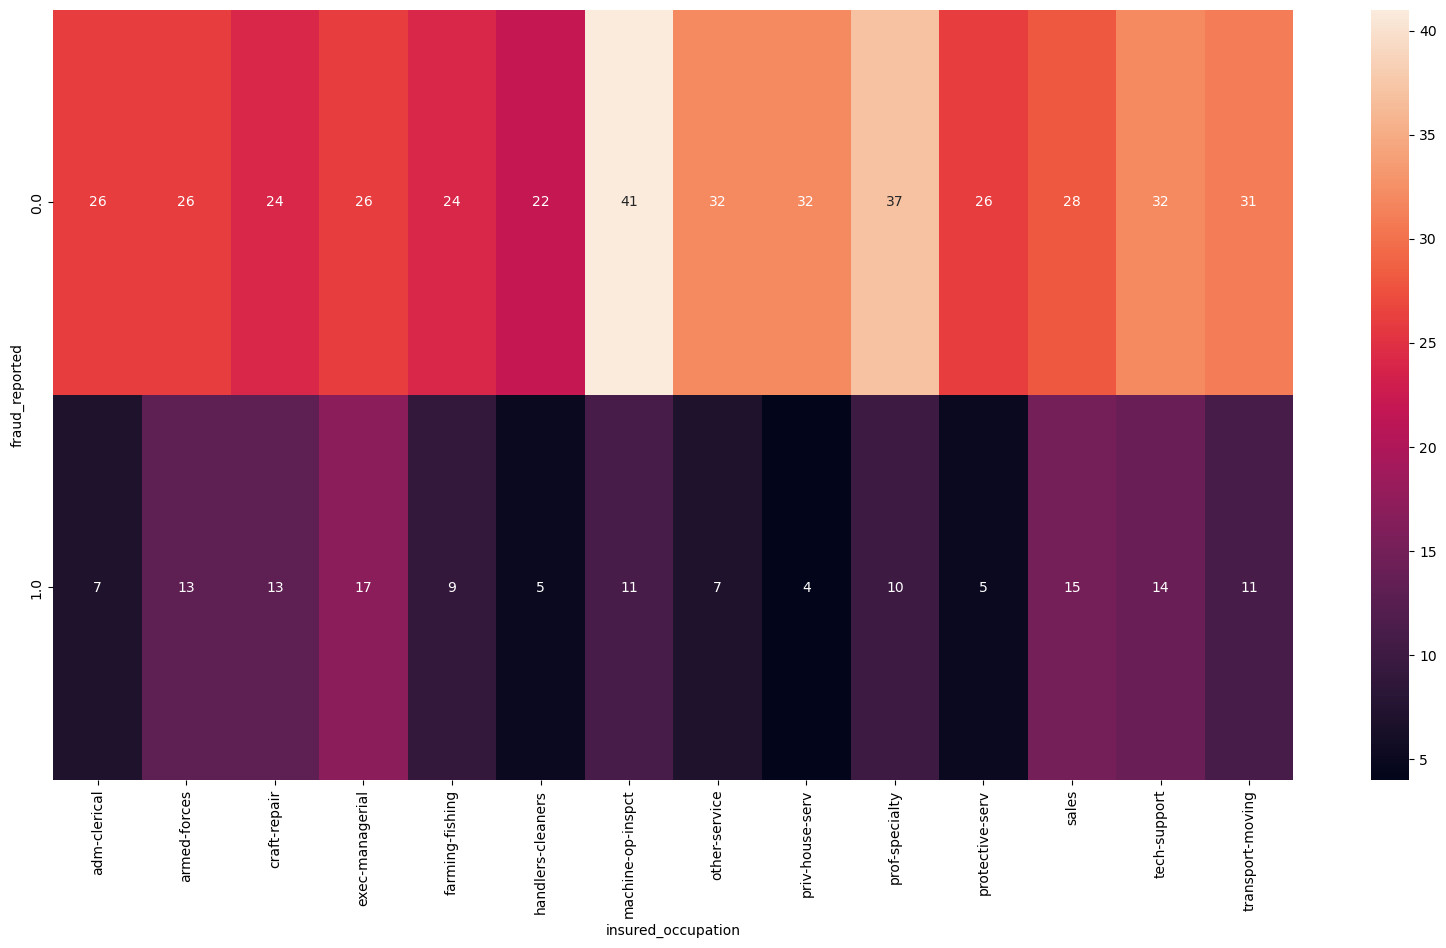

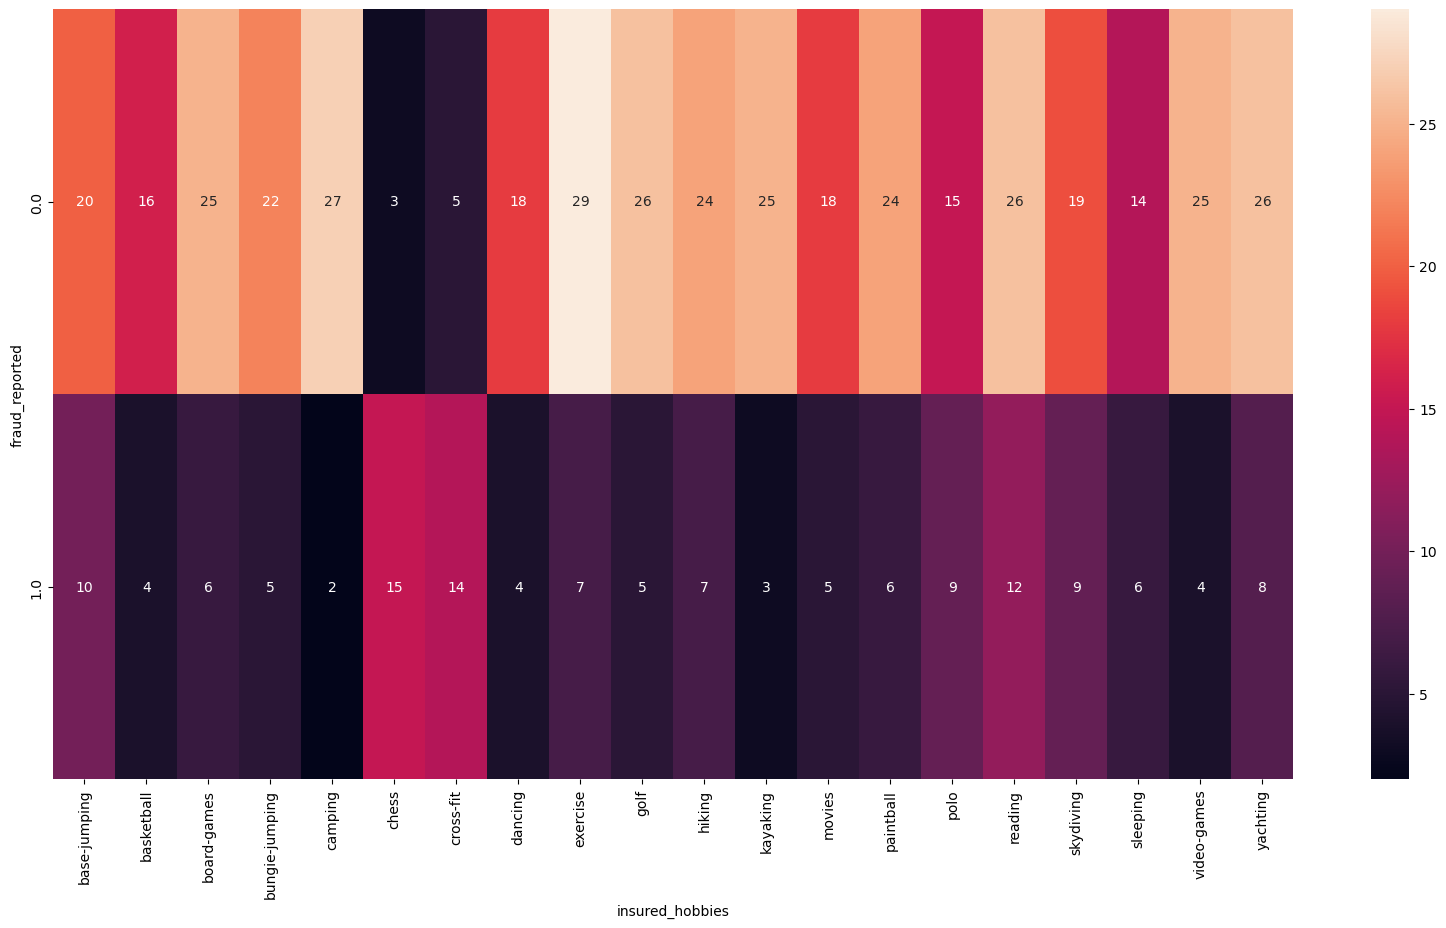

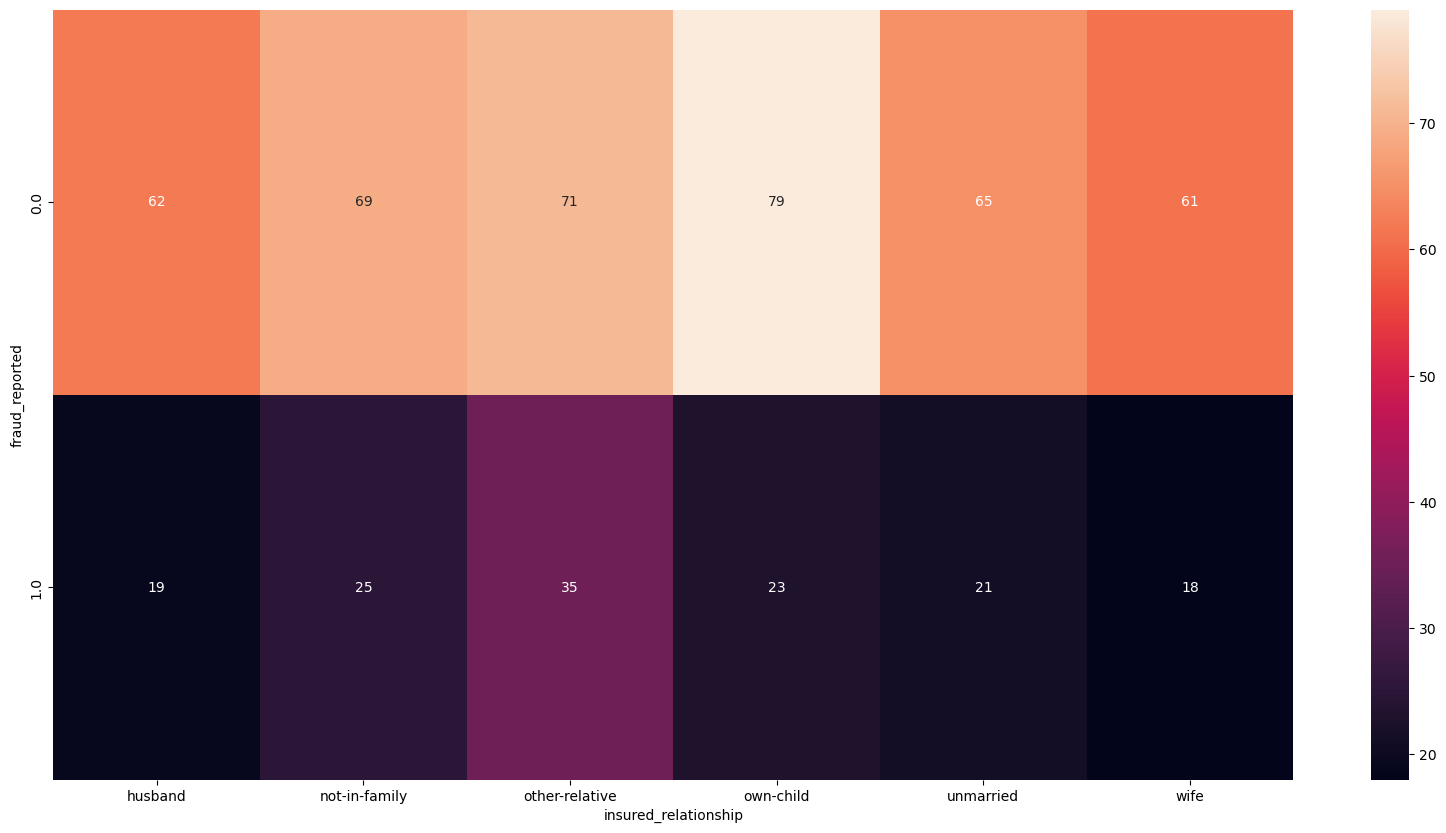

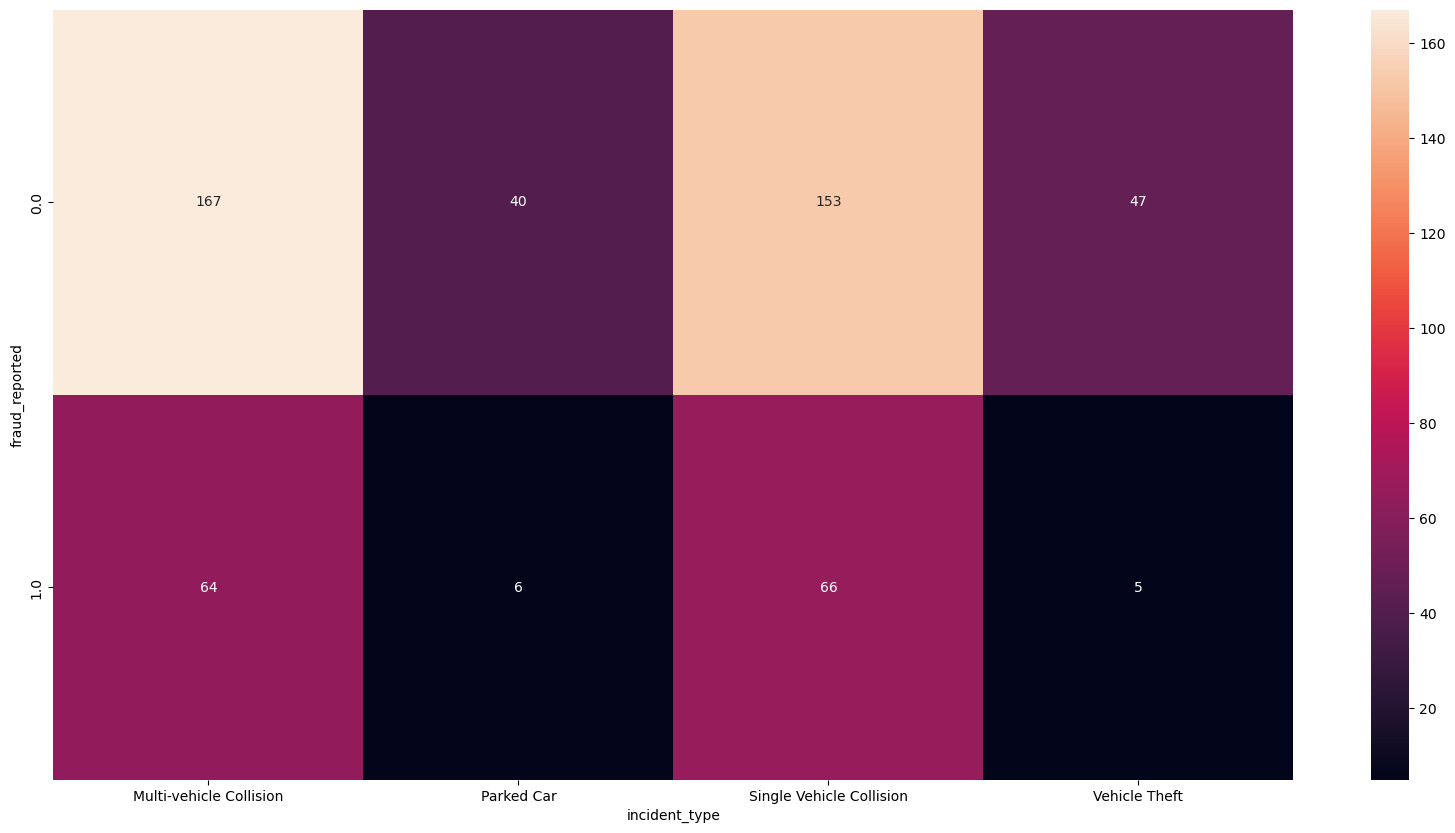

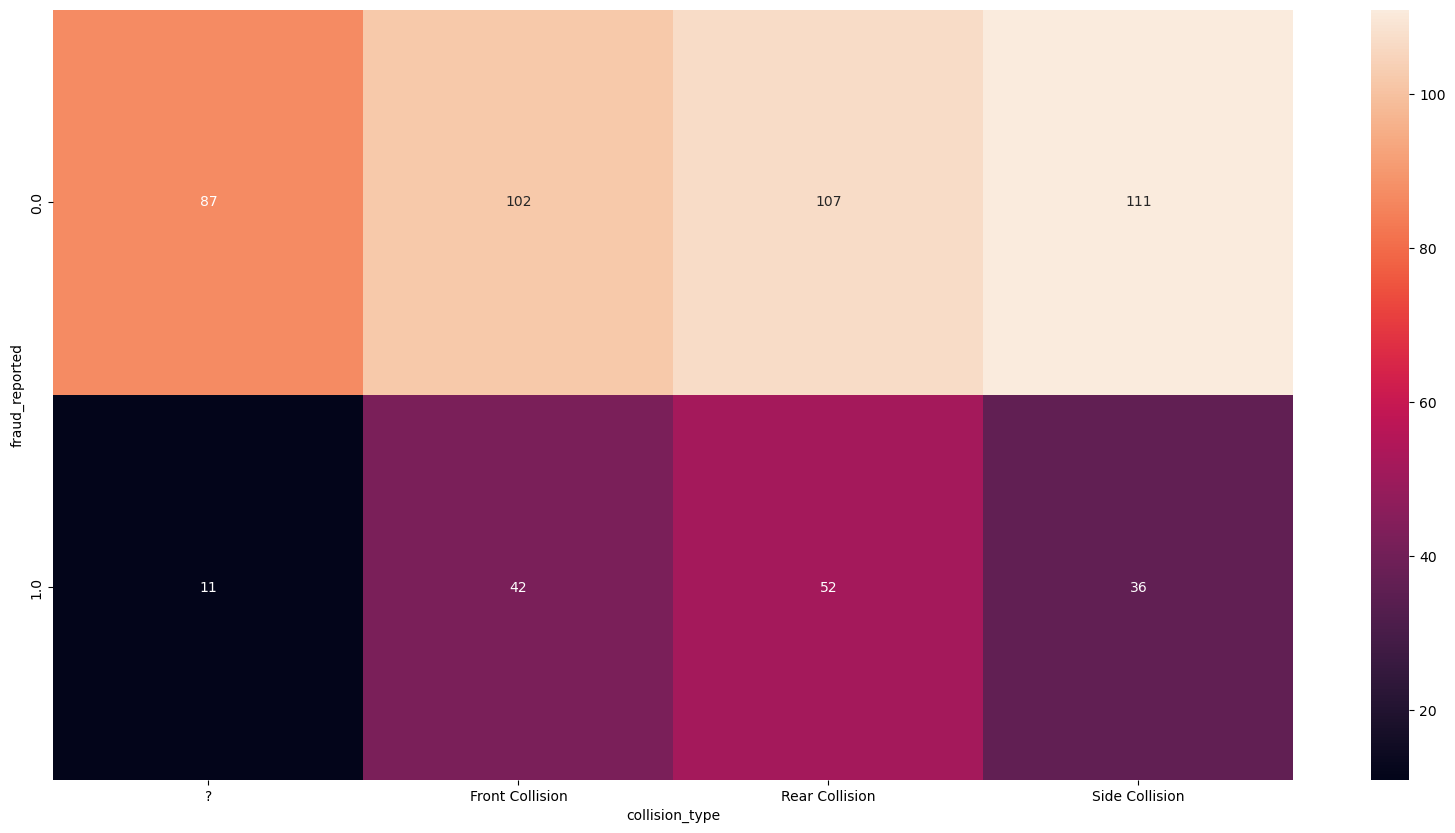

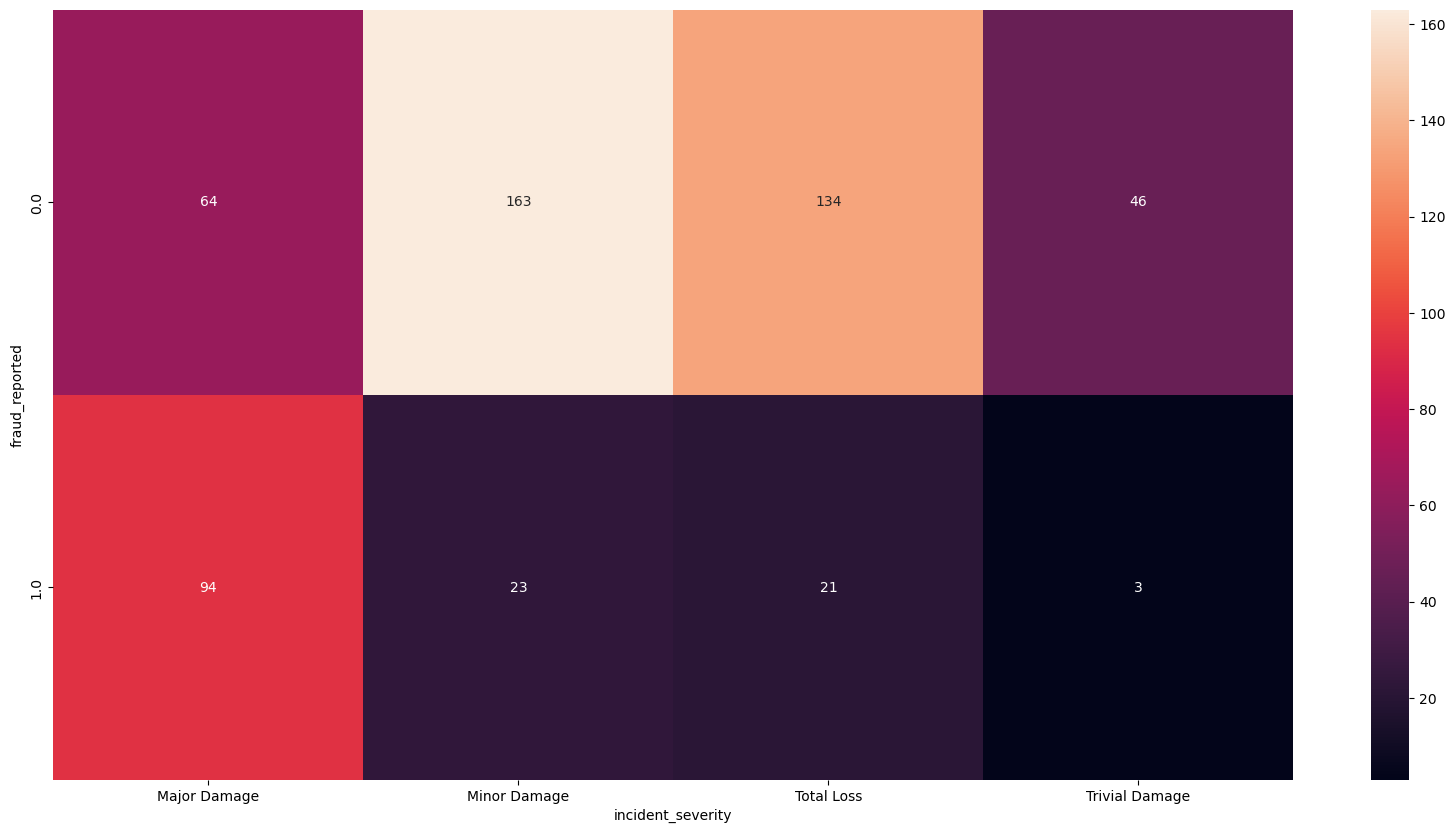

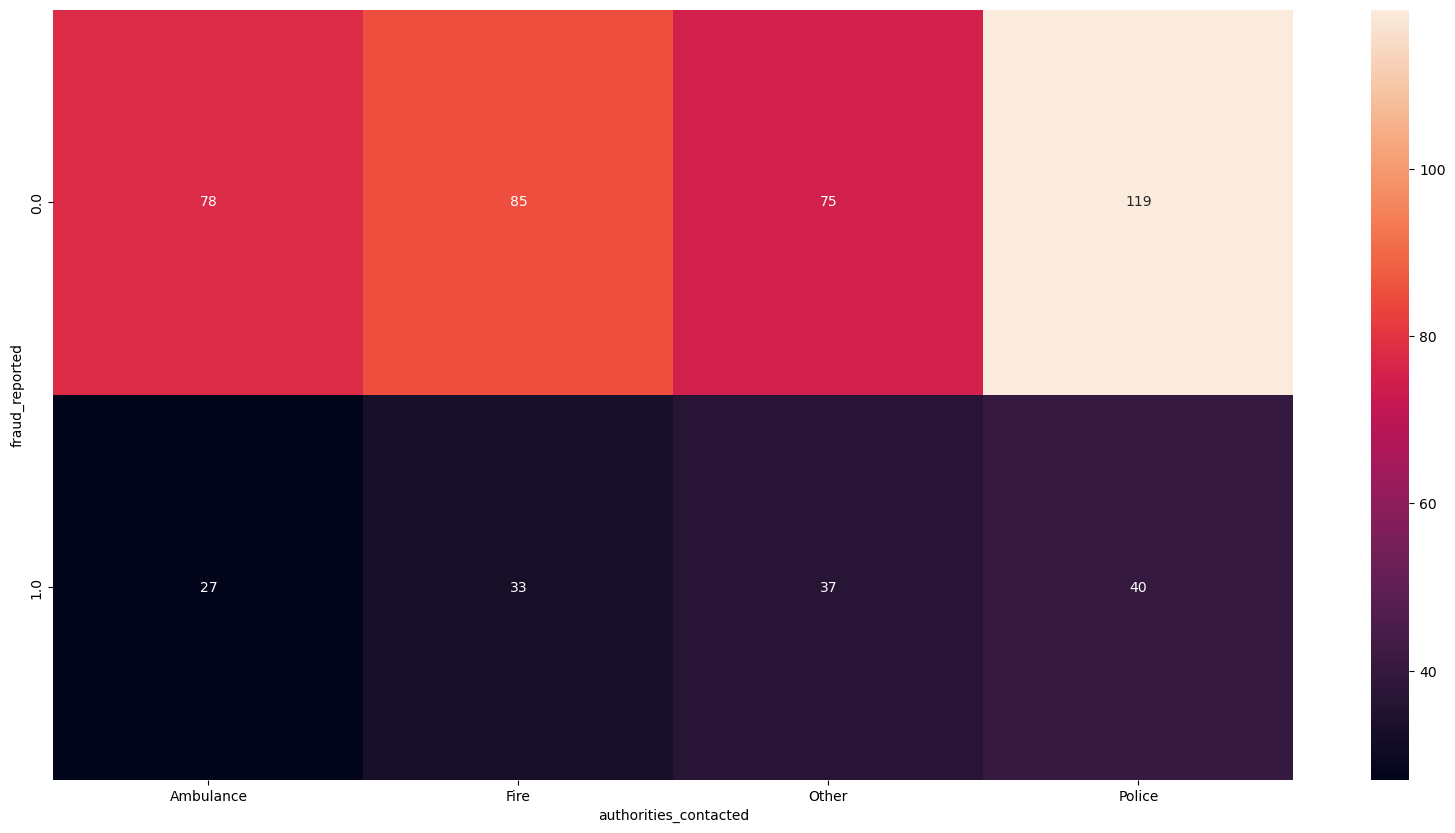

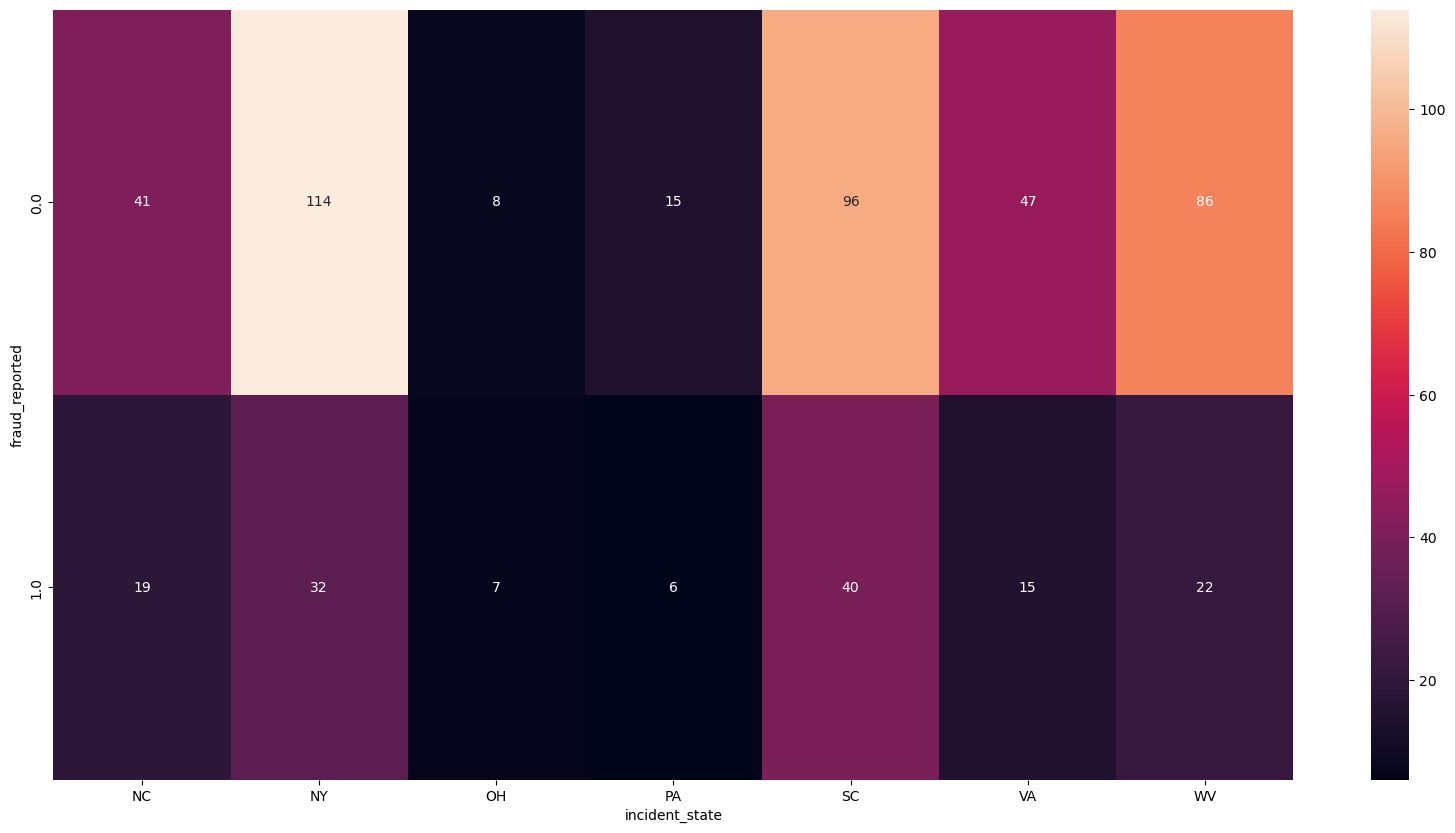

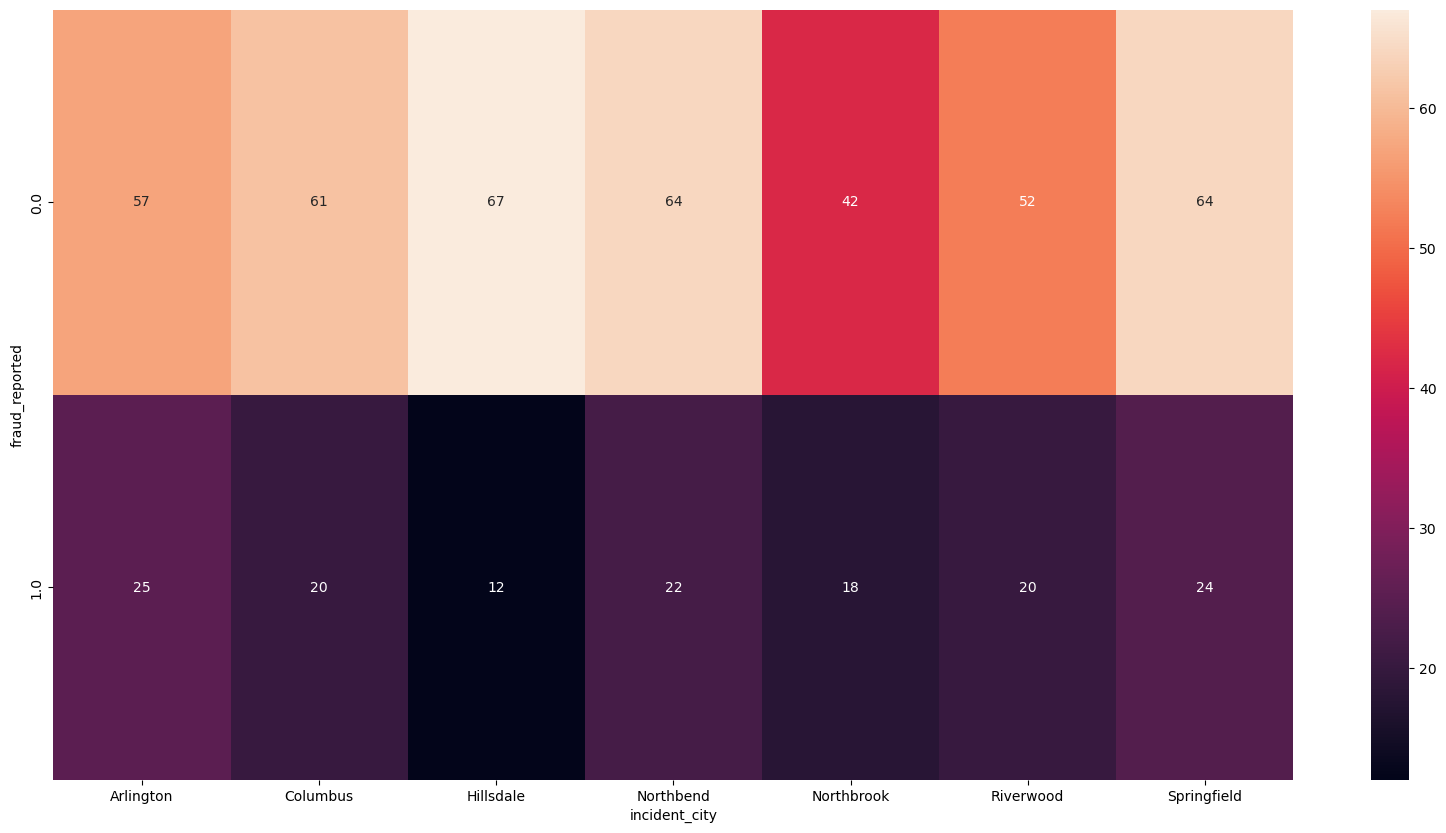

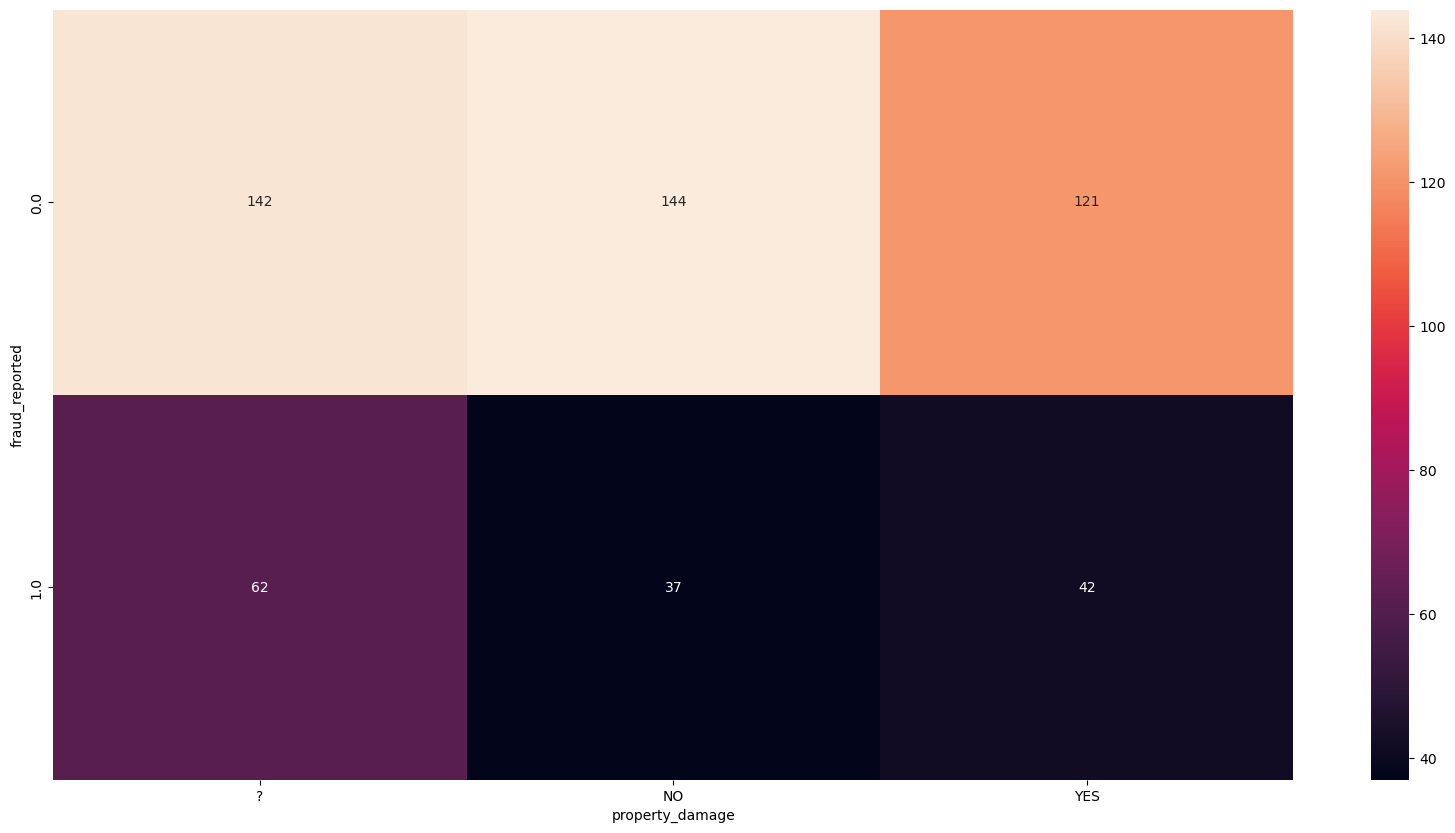

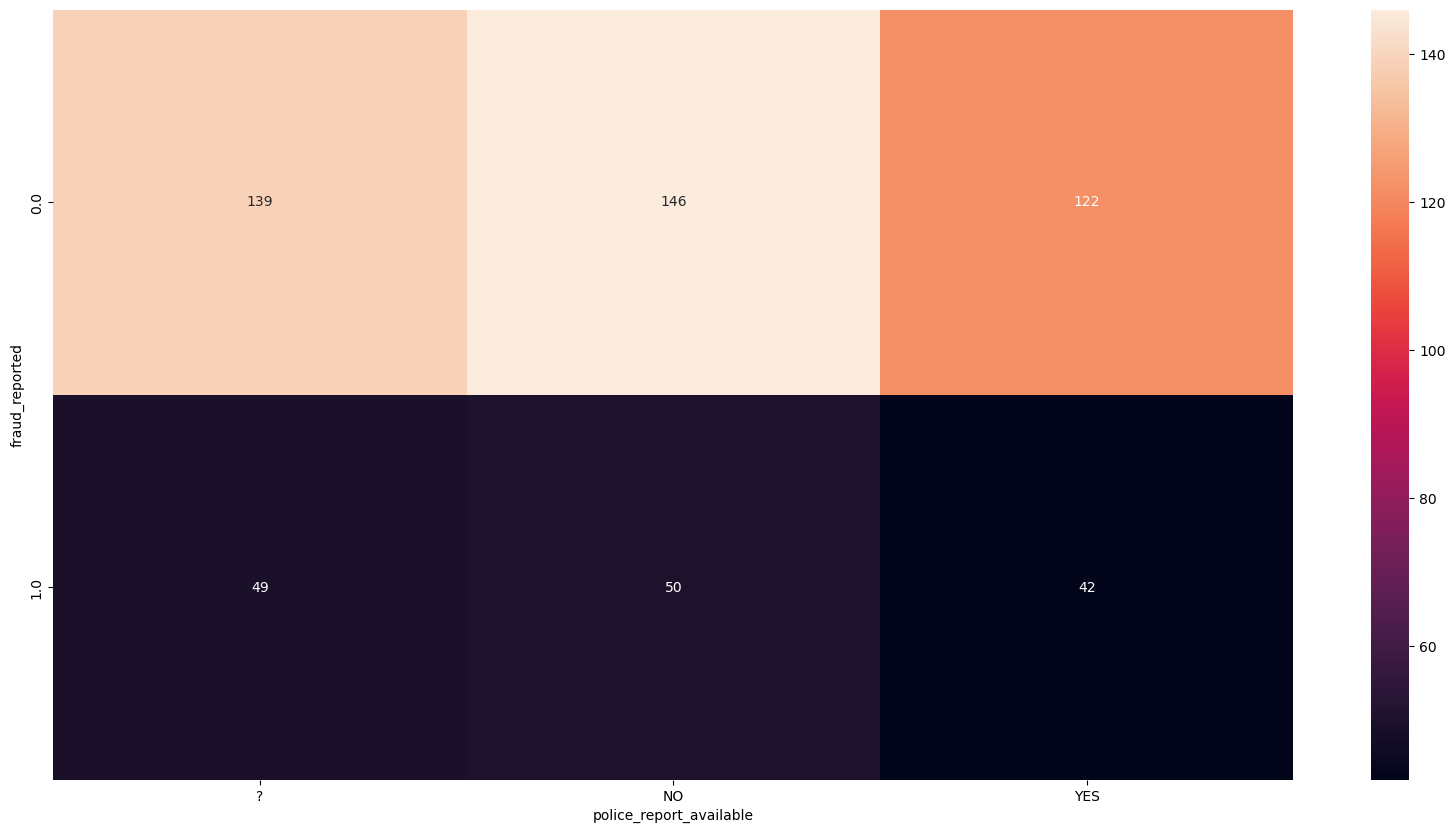

In [64]:
for col in column:
    plt.figure()
    sns.heatmap(pd.crosstab(df['fraud_reported'], df[col]), annot=True, fmt='d')

#### Variables / Variables

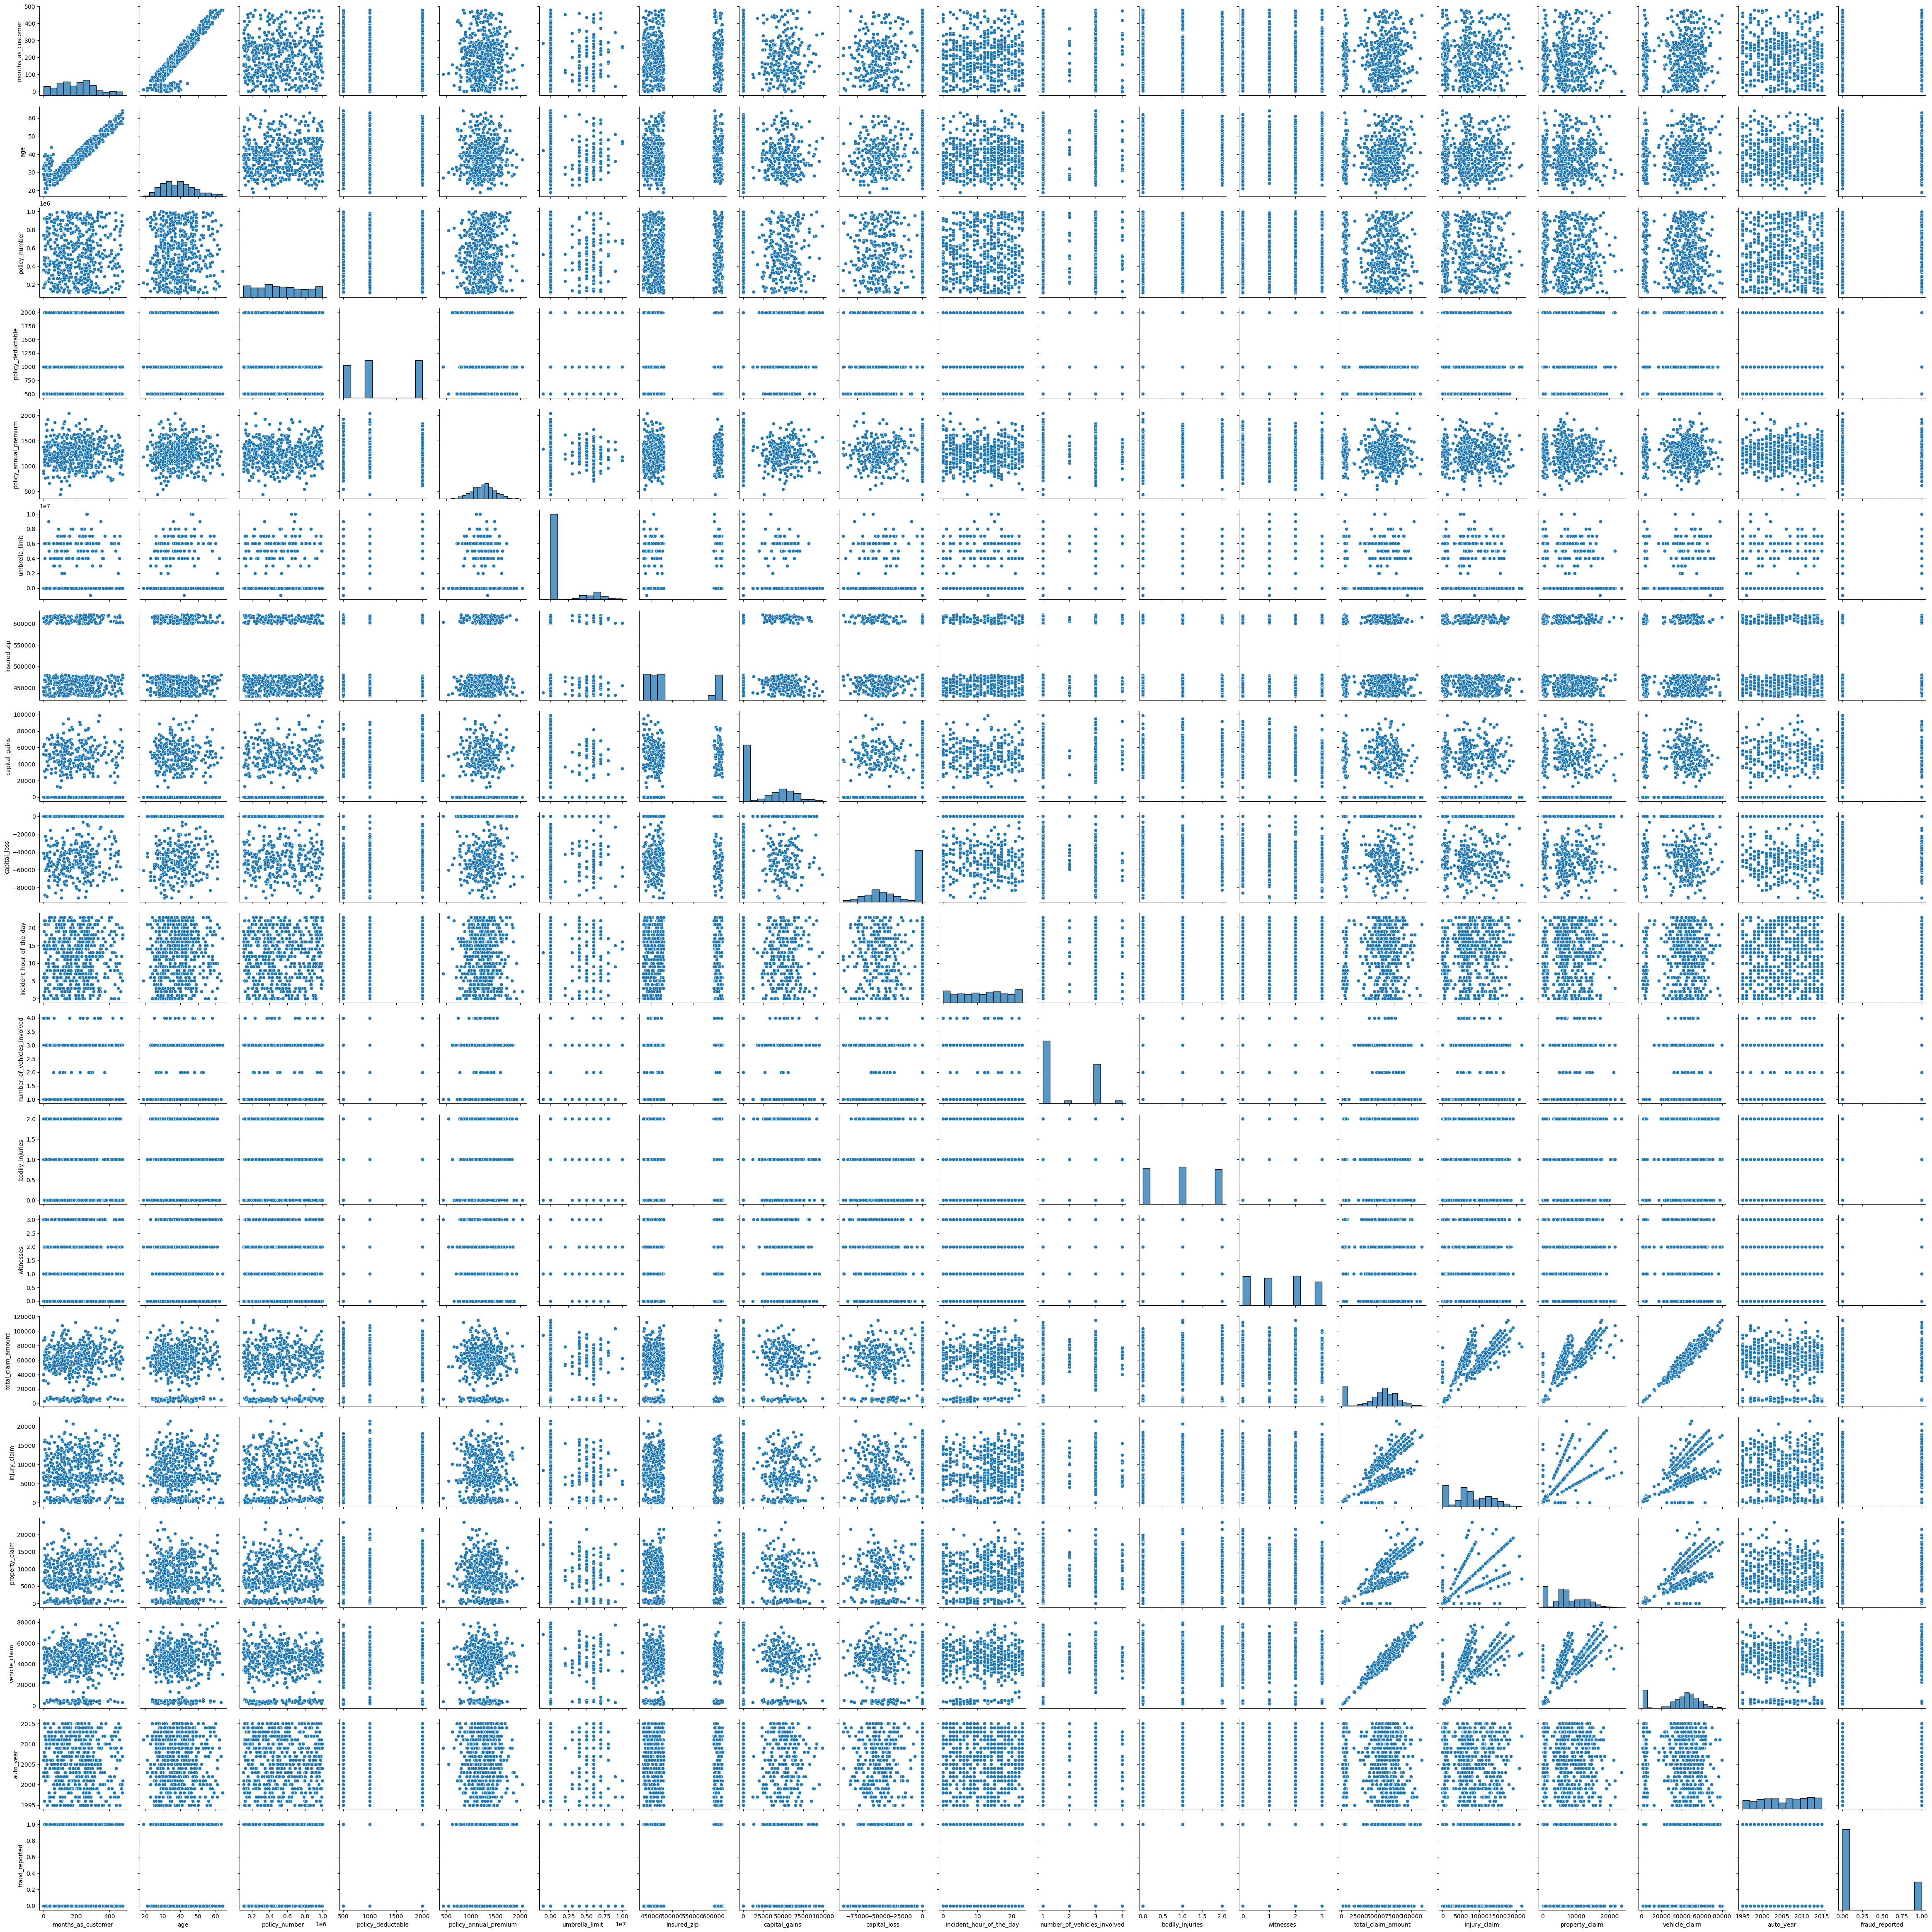

In [65]:
sns.pairplot(df[df.select_dtypes('float').columns])

In [66]:
df[df.select_dtypes('float').columns].corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.923201       0.019023   
age                                    0.923201  1.000000       0.036340   
policy_number                          0.019023  0.036340       1.000000   
policy_deductable                      0.013834  0.014251       0.005951   
policy_annual_premium                  0.035078  0.053206       0.049011   
umbrella_limit                         0.012520  0.016449      -0.018558   
insured_zip                            0.025102  0.050345       0.024316   
capital_gains                         -0.024322 -0.029955       0.051990   
capital_loss                           0.071695  0.052700      -0.006420   
incident_hour_of_the_day               0.043980  0.071113       0.063404   
number_of_vehicles_involved            0.023242  0.054048       0.059154   
bodily_injuries                       -0.016795 -0.025752      -0.032602   
witnesses                              0.052997  0.034519       0.007565   
total_claim_amount                     0.035513  0.048453      -0.047703   
injury_claim                           0.024348  0.045127      -0.011720   
property_claim                         0.005049  0.017853      -0.013458   
vehicle_claim                          0.042355  0.051839      -0.060597   
auto_year                             -0.069200 -0.044482      -0.026561   
fraud_reported                         0.010215 -0.014105      -0.045892   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.013834               0.035078   
age                                   0.014251               0.053206   
policy_number                         0.005951               0.049011   
policy_deductable                     1.000000              -0.000265   
policy_annual_premium                -0.000265               1.000000   
umbrella_limit                        0.003059              -0.040386   
insured_zip                           0.038858               0.061658   
capital_gains                         0.086222               0.000621   
capital_loss                          0.000989               0.040850   
incident_hour_of_the_day              0.041621               0.010272   
number_of_vehicles_involved           0.052704              -0.018811   
bodily_injuries                       0.006827               0.008773   
witnesses                             0.069857               0.000241   
total_claim_amount                    0.006836               0.024097   
injury_claim                          0.022604               0.013017   
property_claim                        0.063306              -0.012620   
vehicle_claim                        -0.012755               0.033834   
auto_year                            -0.010285               0.025680   
fraud_reported                        0.038405               0.010318   

                             umbrella_limit  insured_zip  capital_gains  \
months_as_customer                 0.012520     0.025102      -0.024322   
age                                0.016449     0.050345      -0.029955   
policy_number                     -0.018558     0.024316       0.051990   
policy_deductable                  0.003059     0.038858       0.086222   
policy_annual_premium             -0.040386     0.061658       0.000621   
umbrella_limit                     1.000000     0.034884      -0.021451   
insured_zip                        0.034884     1.000000       0.005462   
capital_gains                     -0.021451     0.005462       1.000000   
capital_loss                      -0.041031     0.018446      -0.046322   
incident_hour_of_the_day          -0.009641     0.031701      -0.027663   
number_of_vehicles_involved        0.010010     0.030358       0.078091   
bodily_injuries                    0.066239     0.042852       0.038472   
witnesses                         -0.027792     0.038066      -0.042442 

<Axes: >

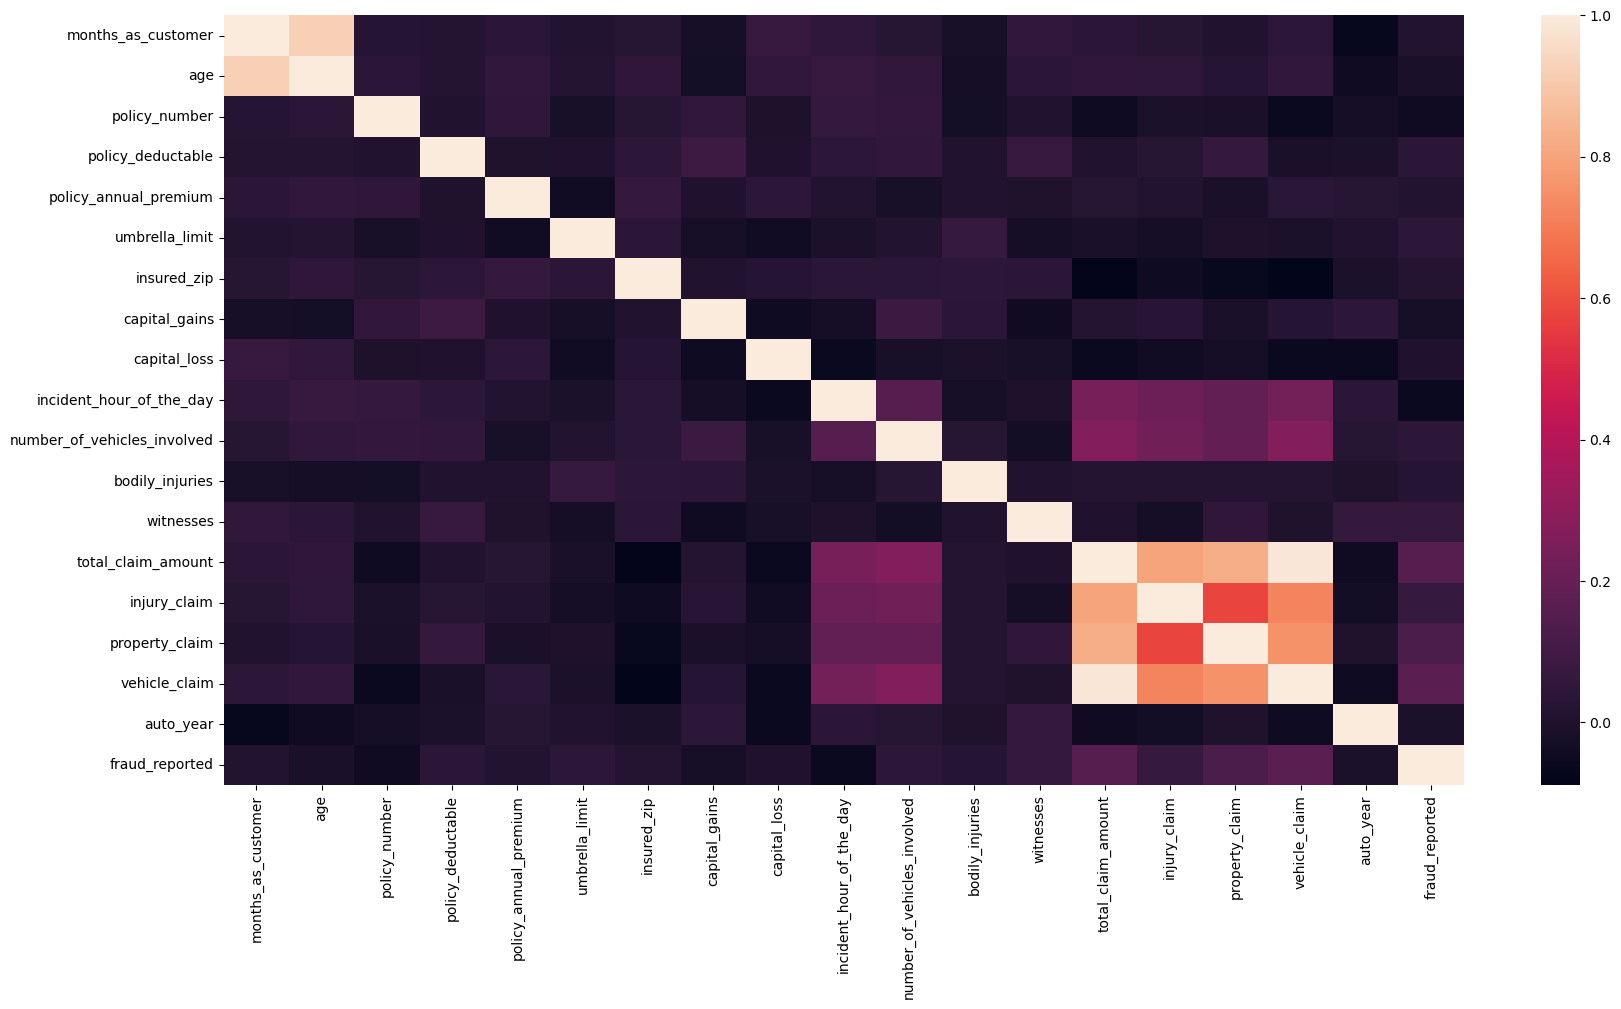

In [67]:
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(df[df.select_dtypes('float').columns].corr())


### Visual Data Analysis in with Profile Report

In [ ]:
#import pandas_profiling

#df.profile_report()

### Save new Dataset

In [71]:
to_delete= ['age', 'policy_number', 'policy_bind_date', 'insured_zip', 'incident_date', 'incident_city',
            'incident_location', 'incident_hour_of_the_day', 'total_claim_amount','injury_claim', 
            'property_claim', 'auto_year' ]

In [72]:
df=df.drop(to_delete, axis = 1)

In [75]:
df.columns

Index(['months_as_customer', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported'],
      dtype='object')

In [76]:
df.shape

(1000, 27)

In [74]:
df.to_csv("dataset/insurance_claims_V2.csv", index = False)